# *+Processing with CHM & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

Site #    WGS84 N   WGS 84 E Origin  Origin_ID Dominant_specias  Species_ID  \
0      1  51.435741  30.107979      n          0            Birch           2   
1      2  51.434093  30.108523      a          1             Pine           0   
2      3  51.434163  30.109196      a          1             Pine           0   
3      4  51.434217  30.110484      a          1             Pine           0   
4      5  51.434056  30.111980      a          1             Pine           0   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ...  idm_g_Q25 idm_g_Q50  \
0            920       6.824          10300  ...   0.042167  0.050549   
1           3600       8.189          15100  ...   0.040919  0.048889   
2           4360       8.380          14600  ...   0.042397  0.050463   
3           3420       8.137          12700  ...   0.043719  0.052974   
4           2200       7.696          12100  ...   0.040659  0.049303   

   idm_g_Q75  idm_b_MIN  idm_b_MAX  idm_b_MEAN  idm_b_STD  idm_b_Q25  \
0   0.062270   0.017730   0.408966    0.059749   0.030217   0.043539   
1   0.060698   0.020078   0.258602    0.057223   0.025515   0.043035   
2   0.060603   0.020761   0.156265    0.056571   0.016629   0.045142   
3   0.066027   0.017239   0.327465    0.060880   0.023964   0.046111   
4   0.061803   0.014276   0.274420    0.057902   0.024283   0.043045   

   idm_b_Q50  idm_b_Q75  
0   0.052312   0.064544  
1   0.050941   0.062608  
2   0.053495   0.064635  
3   0.055601   0.069182  
4   0.051566   0.065078  

[5 rows x 159 columns]

# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            


# Show the first five columns
select.head()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0       4.8122           1.7630               -0.3147           -0.1590   
1       5.7589           2.4570               -0.2485            0.3429   
2       5.8464           2.5153               -0.1054            0.5493   
3       5.7526           2.6304               -0.0834            0.3900   
4       5.9480           2.6748                0.0000            0.5715   

   ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  
0             -2.4418         1.9125     0.85    12.233545   19.097736  
1             -0.1997         2.6319     1.00    14.964220   17.704655  
2             -0.2144         2.7020     1.00    15.329449   17.559893  
3             -0.3510         2.7763     0.97    15.392742   20.676994  
4             -0.3711         2.8314     1.00    17.944009   21.851387

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()

/tmp/ipykernel_58588/594647310.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()


Gs_cub_m                                               \
                    count        mean         std    min    25%    50%   
Dominant_specias                                                         
Alder                 4.0  380.250000  155.784841  199.0  283.0  386.5   
Aspen                 1.0  148.000000         NaN  148.0  148.0  148.0   
Birch                23.0  135.304348   73.156392   11.0   94.0  138.0   
Oak                   3.0  236.000000   77.504839  158.0  197.5  237.0   
Pine                 71.0  263.281690  185.083625    2.0   97.0  281.0   
Spruce                1.0  619.000000         NaN  619.0  619.0  619.0   

                                M_stem_kg_m2                              \
                     75%    max        count       mean       std    min   
Dominant_specias                                                           
Alder             483.75  549.0          4.0  16.170000  5.186990   9.90   
Aspen             148.00  148.0          1.0   6.650000       NaN   6.65   
Birch             197.00  280.0         23.0   6.809130  3.677786   0.84   
Oak               275.00  313.0          3.0  13.513333  4.888725   9.59   
Pine              394.00  671.0         71.0  10.550000  7.252887   0.05   
Spruce            619.00  619.0          1.0  23.830000       NaN  23.83   

                                                  
                      25%    50%      75%    max  
Dominant_specias                                  
Alder             12.9225  17.03  20.2775  20.72  
Aspen              6.6500   6.65   6.6500   6.65  
Birch              4.7650   6.19   9.7400  15.47  
Oak               10.7750  11.96  15.4750  18.99  
Pine               3.4400  11.34  16.2250  25.04  
Spruce            23.8300  23.83  23.8300  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
count   103.000000       103.000000            103.000000         103.00000   
mean      4.969534         1.827923             -0.239481           0.05436   
std       1.323782         1.325853              0.893398           0.66008   
min       0.693100        -2.995700             -3.912000          -1.55590   
25%       4.672800         1.588100             -0.335500          -0.20955   
50%       5.337500         2.286500             -0.040800           0.24450   
75%       5.908100         2.730800              0.190600           0.49195   
max       6.508800         3.220500              1.654400           1.41220   

       ln_M_foliage_kg_m2  ln_M_AG_kg_m2     %_cover  mf_chm_MEAN  mf_chm_MAX  
count          103.000000     103.000000  103.000000   103.000000  103.000000  
mean            -1.021247       2.095454    0.808738    13.045021   17.907784  
std              0.803748       1.079203    0.276653     6.609366    7.523377  
min             -2.918800      -0.798500    0.090000     1.293138    2.733019  
25%             -1.629700       1.801400    0.745000     8.206727   11.615798  
50%             -0.719500       2.458700    0.960000    13.072916   18.269344  
75%             -0.358800       2.862800    1.000000    17.432255   22.751595  
max              0.114200       3.366600    1.000000    28.916548   36.355442

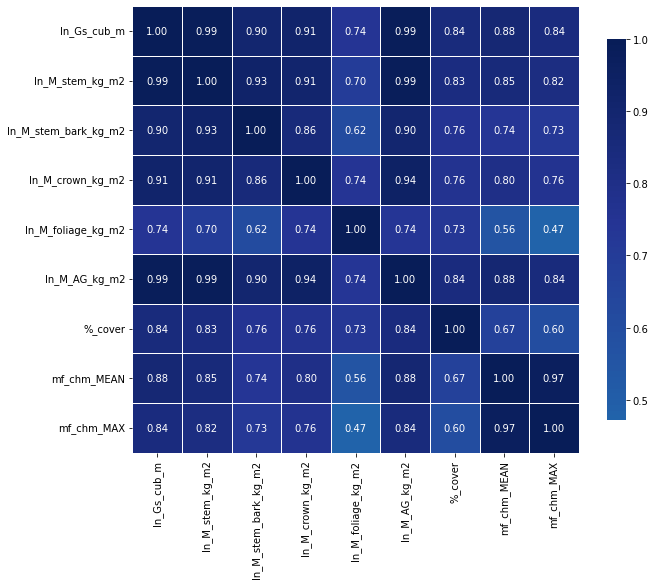

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
y = pd.DataFrame(select, columns= ['ln_Gs_cub_m'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

%_cover  mf_chm_MEAN  mf_chm_MAX
0     0.85    12.233545   19.097736
1     1.00    14.964220   17.704655
2     1.00    15.329449   17.559893
3     0.97    15.392742   20.676994
4     1.00    17.944009   21.851387

In [11]:
# Columns in "y" data collections
y.head()

ln_Gs_cub_m
0       4.8122
1       5.7589
2       5.8464
3       5.7526
4       5.9480

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9014921433430301, 0.9288163678919694, 0.8390361434225562]
    Mean: 0.890
    Std: 0.038

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.46636262 0.40208094 0.41148334]
    Mean: 0.427
    Std: 0.028

 --------------------
Mean absolute error (MAE): 

    Scores: [0.33802548915863034, 0.2543755283692304, 0.35670620172164025]
    Mean: 0.316
    Std: 0.044

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.895 (std: 0.038)
Parameters: {'colsample_bytree': 0.8441358793414397, 'gamma': 0.21354596382063146, 'learning_rate': 0.09419852841923904, 'max_depth': 3, 'n_estimators': 65, 'subsample': 0.31114930117673584}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.37088375, 0.36904945, 0.35657272, ..., 0.51076164, 0.31954703,
       0.51066537]), 'std_fit_time': array([0.03977393, 0.01700542, 0.01948195, ..., 0.02610495, 0.03676653,
       0.02110748]), 'mean_score_time': array([0.00626979, 0.00585775, 0.00611615, ..., 0.00909901, 0.0091228 ,
       0.00913706]), 'std_score_time': array([4.33824513e-04, 5.27407333e-05, 1.69082113e-04, ...,
       4.86025498e-05, 5.11220584e-05, 1.31876780e-04]), 'param_colsample_bytree': masked_array(data=[0.7095799474804438, 0.4704592808513056,
                   0.4215908025691558, ..., 0.7870782686877795,
                   0.5928127835635464, 0.2571993426814599],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.16453328080185597, 0.03071711850390174,
                   0.07541309402769697, ..., 0.3478665270656583,
                   0.027331918815287237, 0.3285109217735473],
    

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8441358793414397
Gamma: 0.21354596382063146
Learning_rate: 0.09419852841923904
Max_depth: 3
N_estimators: 65
Subsample: 0.31114930117673584


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:4.25167	validation_1-rmse:4.33975
[1]	validation_0-rmse:3.89413	validation_1-rmse:3.98585


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:3.53507	validation_1-rmse:3.61553
[3]	validation_0-rmse:3.22191	validation_1-rmse:3.31714
[4]	validation_0-rmse:2.94753	validation_1-rmse:3.03583
[5]	validation_0-rmse:2.69456	validation_1-rmse:2.79653
[6]	validation_0-rmse:2.46311	validation_1-rmse:2.56655
[7]	validation_0-rmse:2.25552	validation_1-rmse:2.35321
[8]	validation_0-rmse:2.05715	validation_1-rmse:2.15598
[9]	validation_0-rmse:1.88383	validation_1-rmse:1.98281
[10]	validation_0-rmse:1.73278	validation_1-rmse:1.82556
[11]	validation_0-rmse:1.60483	validation_1-rmse:1.69258
[12]	validation_0-rmse:1.46819	validation_1-rmse:1.55575
[13]	validation_0-rmse:1.35840	validation_1-rmse:1.45564
[14]	validation_0-rmse:1.25211	validation_1-rmse:1.36072
[15]	validation_0-rmse:1.15550	validation_1-rmse:1.27481
[16]	validation_0-rmse:1.06764	validation_1-rmse:1.19401
[17]	validation_0-rmse:0.98752	validation_1-rmse:1.11359
[18]	validation_0-rmse:0.91467	validation_1-rmse:1.04032
[19]	validation_0-rmse:0.84698	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:3.32175	validation_1-rmse:2.93315
[4]	validation_0-rmse:3.04761	validation_1-rmse:2.69184
[5]	validation_0-rmse:2.77426	validation_1-rmse:2.44461
[6]	validation_0-rmse:2.51864	validation_1-rmse:2.23513
[7]	validation_0-rmse:2.30712	validation_1-rmse:2.06765
[8]	validation_0-rmse:2.10464	validation_1-rmse:1.89275
[9]	validation_0-rmse:1.93687	validation_1-rmse:1.75133
[10]	validation_0-rmse:1.77871	validation_1-rmse:1.61639
[11]	validation_0-rmse:1.62516	validation_1-rmse:1.49042
[12]	validation_0-rmse:1.48775	validation_1-rmse:1.37437
[13]	validation_0-rmse:1.37114	validation_1-rmse:1.29315
[14]	validation_0-rmse:1.25476	validation_1-rmse:1.19836
[15]	validation_0-rmse:1.16697	validation_1-rmse:1.13511
[16]	validation_0-rmse:1.08293	validation_1-rmse:1.07376
[17]	validation_0-rmse:1.00454	validation_1-rmse:1.01639
[18]	validation_0-rmse:0.92850	validation_1-rmse:0.96188
[19]	validation_0-rmse:0.85243	validation_1-rmse:0.90709
[20]	validation_0-rmse:0.78799	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.92666	validation_1-rmse:3.04389
[5]	validation_0-rmse:2.67664	validation_1-rmse:2.78740
[6]	validation_0-rmse:2.44628	validation_1-rmse:2.54796
[7]	validation_0-rmse:2.22780	validation_1-rmse:2.31761
[8]	validation_0-rmse:2.04561	validation_1-rmse:2.12845
[9]	validation_0-rmse:1.88397	validation_1-rmse:1.96152
[10]	validation_0-rmse:1.73802	validation_1-rmse:1.81205
[11]	validation_0-rmse:1.60281	validation_1-rmse:1.65945
[12]	validation_0-rmse:1.46596	validation_1-rmse:1.51399
[13]	validation_0-rmse:1.34896	validation_1-rmse:1.39069
[14]	validation_0-rmse:1.25959	validation_1-rmse:1.29792
[15]	validation_0-rmse:1.15891	validation_1-rmse:1.18716
[16]	validation_0-rmse:1.07097	validation_1-rmse:1.09222
[17]	validation_0-rmse:0.99744	validation_1-rmse:1.02410
[18]	validation_0-rmse:0.92377	validation_1-rmse:0.95184
[19]	validation_0-rmse:0.85703	validation_1-rmse:0.88134
[20]	validation_0-rmse:0.79178	validation_1-rmse:0.81814
[21]	validation_0-rmse:0.73709	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96306	validation_1-rmse:1.13236
[18]	validation_0-rmse:0.89316	validation_1-rmse:1.06643
[19]	validation_0-rmse:0.82552	validation_1-rmse:1.00041
[20]	validation_0-rmse:0.76406	validation_1-rmse:0.94518
[21]	validation_0-rmse:0.71646	validation_1-rmse:0.90103
[22]	validation_0-rmse:0.66567	validation_1-rmse:0.85782
[23]	validation_0-rmse:0.62544	validation_1-rmse:0.81925
[24]	validation_0-rmse:0.58384	validation_1-rmse:0.78268
[25]	validation_0-rmse:0.54463	validation_1-rmse:0.74847
[26]	validation_0-rmse:0.50766	validation_1-rmse:0.71183
[27]	validation_0-rmse:0.47923	validation_1-rmse:0.68739
[28]	validation_0-rmse:0.45443	validation_1-rmse:0.66732
[29]	validation_0-rmse:0.43085	validation_1-rmse:0.64436
[30]	validation_0-rmse:0.41516	validation_1-rmse:0.62985
[31]	validation_0-rmse:0.39545	validation_1-rmse:0.61945
[32]	validation_0-rmse:0.37948	validation_1-rmse:0.60700
[33]	validation_0-rmse:0.36559	validation_1-rmse:0.59411
[34]	validation_0-rmse:0.35287	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83741	validation_1-rmse:1.02377
[20]	validation_0-rmse:0.76696	validation_1-rmse:0.95945
[21]	validation_0-rmse:0.70715	validation_1-rmse:0.90795
[22]	validation_0-rmse:0.65403	validation_1-rmse:0.86540
[23]	validation_0-rmse:0.61064	validation_1-rmse:0.83302
[24]	validation_0-rmse:0.56629	validation_1-rmse:0.79917
[25]	validation_0-rmse:0.52972	validation_1-rmse:0.77525
[26]	validation_0-rmse:0.50576	validation_1-rmse:0.76036
[27]	validation_0-rmse:0.47280	validation_1-rmse:0.74047
[28]	validation_0-rmse:0.44502	validation_1-rmse:0.71706
[29]	validation_0-rmse:0.42028	validation_1-rmse:0.70485
[30]	validation_0-rmse:0.39981	validation_1-rmse:0.69369
[31]	validation_0-rmse:0.37630	validation_1-rmse:0.67932
[32]	validation_0-rmse:0.36466	validation_1-rmse:0.67419
[33]	validation_0-rmse:0.35563	validation_1-rmse:0.67018
[34]	validation_0-rmse:0.34498	validation_1-rmse:0.66565
[35]	validation_0-rmse:0.33649	validation_1-rmse:0.66223
[36]	validation_0-rmse:0.32589	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:3.55733	validation_1-rmse:3.44973
[3]	validation_0-rmse:3.26222	validation_1-rmse:3.17620
[4]	validation_0-rmse:2.99047	validation_1-rmse:2.92577
[5]	validation_0-rmse:2.73070	validation_1-rmse:2.66109
[6]	validation_0-rmse:2.49629	validation_1-rmse:2.42145
[7]	validation_0-rmse:2.28311	validation_1-rmse:2.22408
[8]	validation_0-rmse:2.08234	validation_1-rmse:2.02218
[9]	validation_0-rmse:1.91653	validation_1-rmse:1.85008
[10]	validation_0-rmse:1.75105	validation_1-rmse:1.68967
[11]	validation_0-rmse:1.60085	validation_1-rmse:1.54892
[12]	validation_0-rmse:1.46910	validation_1-rmse:1.42578
[13]	validation_0-rmse:1.33964	validation_1-rmse:1.30805
[14]	validation_0-rmse:1.24504	validation_1-rmse:1.21468
[15]	validation_0-rmse:1.14329	validation_1-rmse:1.12384
[16]	validation_0-rmse:1.05458	validation_1-rmse:1.06038
[17]	validation_0-rmse:0.97340	validation_1-rmse:0.99421
[18]	validation_0-rmse:0.90489	validation_1-rmse:0.93766
[19]	validation_0-rmse:0.83485	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77264	validation_1-rmse:0.68601
[21]	validation_0-rmse:0.71506	validation_1-rmse:0.62959
[22]	validation_0-rmse:0.67036	validation_1-rmse:0.59119
[23]	validation_0-rmse:0.62542	validation_1-rmse:0.55158
[24]	validation_0-rmse:0.59050	validation_1-rmse:0.52528
[25]	validation_0-rmse:0.56014	validation_1-rmse:0.50346
[26]	validation_0-rmse:0.52958	validation_1-rmse:0.48686
[27]	validation_0-rmse:0.50133	validation_1-rmse:0.47561
[28]	validation_0-rmse:0.47434	validation_1-rmse:0.46568
[29]	validation_0-rmse:0.45143	validation_1-rmse:0.45196
[30]	validation_0-rmse:0.43671	validation_1-rmse:0.44089
[31]	validation_0-rmse:0.41848	validation_1-rmse:0.43463
[32]	validation_0-rmse:0.40429	validation_1-rmse:0.43688
[33]	validation_0-rmse:0.38390	validation_1-rmse:0.43727
[34]	validation_0-rmse:0.37499	validation_1-rmse:0.43501
[35]	validation_0-rmse:0.36597	validation_1-rmse:0.43736
[36]	validation_0-rmse:0.35900	validation_1-rmse:0.43529
[37]	validation_0-rmse:0.34779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28492	validation_1-rmse:1.28702
[15]	validation_0-rmse:1.17604	validation_1-rmse:1.18290
[16]	validation_0-rmse:1.07441	validation_1-rmse:1.08779
[17]	validation_0-rmse:0.98589	validation_1-rmse:1.00755
[18]	validation_0-rmse:0.91074	validation_1-rmse:0.93822
[19]	validation_0-rmse:0.84655	validation_1-rmse:0.88507
[20]	validation_0-rmse:0.78690	validation_1-rmse:0.83025
[21]	validation_0-rmse:0.73387	validation_1-rmse:0.78295
[22]	validation_0-rmse:0.68361	validation_1-rmse:0.73961
[23]	validation_0-rmse:0.63877	validation_1-rmse:0.70002
[24]	validation_0-rmse:0.59919	validation_1-rmse:0.66599
[25]	validation_0-rmse:0.56511	validation_1-rmse:0.63883
[26]	validation_0-rmse:0.52849	validation_1-rmse:0.61110
[27]	validation_0-rmse:0.49965	validation_1-rmse:0.59111
[28]	validation_0-rmse:0.47374	validation_1-rmse:0.57705
[29]	validation_0-rmse:0.44653	validation_1-rmse:0.56307
[30]	validation_0-rmse:0.42689	validation_1-rmse:0.54922
[31]	validation_0-rmse:0.40608	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.65357	validation_1-rmse:0.67102
[23]	validation_0-rmse:0.60305	validation_1-rmse:0.63527
[24]	validation_0-rmse:0.56631	validation_1-rmse:0.60249
[25]	validation_0-rmse:0.52921	validation_1-rmse:0.56717
[26]	validation_0-rmse:0.50322	validation_1-rmse:0.55324
[27]	validation_0-rmse:0.47259	validation_1-rmse:0.52737
[28]	validation_0-rmse:0.45164	validation_1-rmse:0.50837
[29]	validation_0-rmse:0.43057	validation_1-rmse:0.49418
[30]	validation_0-rmse:0.41795	validation_1-rmse:0.48278
[31]	validation_0-rmse:0.40120	validation_1-rmse:0.47145
[32]	validation_0-rmse:0.39086	validation_1-rmse:0.46350
[33]	validation_0-rmse:0.37871	validation_1-rmse:0.45626
[34]	validation_0-rmse:0.36879	validation_1-rmse:0.45216
[35]	validation_0-rmse:0.35827	validation_1-rmse:0.44683
[36]	validation_0-rmse:0.34890	validation_1-rmse:0.43939
[37]	validation_0-rmse:0.33911	validation_1-rmse:0.43603
[38]	validation_0-rmse:0.33351	validation_1-rmse:0.42793
[39]	validation_0-rmse:0.32516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07656	validation_1-rmse:1.01176
[17]	validation_0-rmse:0.98750	validation_1-rmse:0.92682
[18]	validation_0-rmse:0.91571	validation_1-rmse:0.85253
[19]	validation_0-rmse:0.85320	validation_1-rmse:0.79579
[20]	validation_0-rmse:0.79129	validation_1-rmse:0.73799
[21]	validation_0-rmse:0.73564	validation_1-rmse:0.68603
[22]	validation_0-rmse:0.69178	validation_1-rmse:0.64116
[23]	validation_0-rmse:0.64881	validation_1-rmse:0.60823
[24]	validation_0-rmse:0.60812	validation_1-rmse:0.56896
[25]	validation_0-rmse:0.57233	validation_1-rmse:0.53590
[26]	validation_0-rmse:0.53378	validation_1-rmse:0.49867
[27]	validation_0-rmse:0.50123	validation_1-rmse:0.47085
[28]	validation_0-rmse:0.48036	validation_1-rmse:0.45382
[29]	validation_0-rmse:0.45773	validation_1-rmse:0.43705
[30]	validation_0-rmse:0.44396	validation_1-rmse:0.42334
[31]	validation_0-rmse:0.42222	validation_1-rmse:0.40599
[32]	validation_0-rmse:0.40228	validation_1-rmse:0.39289
[33]	validation_0-rmse:0.38392	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.46046	validation_1-rmse:1.46282
[13]	validation_0-rmse:1.33928	validation_1-rmse:1.33707
[14]	validation_0-rmse:1.23777	validation_1-rmse:1.23236
[15]	validation_0-rmse:1.14582	validation_1-rmse:1.14039
[16]	validation_0-rmse:1.06109	validation_1-rmse:1.05298
[17]	validation_0-rmse:0.97323	validation_1-rmse:0.95728
[18]	validation_0-rmse:0.91064	validation_1-rmse:0.89384
[19]	validation_0-rmse:0.84449	validation_1-rmse:0.82166
[20]	validation_0-rmse:0.78673	validation_1-rmse:0.76147
[21]	validation_0-rmse:0.73322	validation_1-rmse:0.70595
[22]	validation_0-rmse:0.68604	validation_1-rmse:0.65197
[23]	validation_0-rmse:0.63715	validation_1-rmse:0.60038
[24]	validation_0-rmse:0.59711	validation_1-rmse:0.55558
[25]	validation_0-rmse:0.56317	validation_1-rmse:0.51824
[26]	validation_0-rmse:0.53468	validation_1-rmse:0.49235
[27]	validation_0-rmse:0.50720	validation_1-rmse:0.46504
[28]	validation_0-rmse:0.48144	validation_1-rmse:0.43628
[29]	validation_0-rmse:0.45641	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.86429	validation_1-rmse:0.80774
[20]	validation_0-rmse:0.79525	validation_1-rmse:0.73279
[21]	validation_0-rmse:0.74554	validation_1-rmse:0.67666
[22]	validation_0-rmse:0.69251	validation_1-rmse:0.61686
[23]	validation_0-rmse:0.65139	validation_1-rmse:0.57283
[24]	validation_0-rmse:0.60884	validation_1-rmse:0.52592
[25]	validation_0-rmse:0.57419	validation_1-rmse:0.49316
[26]	validation_0-rmse:0.54799	validation_1-rmse:0.46413
[27]	validation_0-rmse:0.52445	validation_1-rmse:0.44534
[28]	validation_0-rmse:0.50242	validation_1-rmse:0.42261
[29]	validation_0-rmse:0.47158	validation_1-rmse:0.38841
[30]	validation_0-rmse:0.45640	validation_1-rmse:0.38087
[31]	validation_0-rmse:0.44042	validation_1-rmse:0.36658
[32]	validation_0-rmse:0.43134	validation_1-rmse:0.35528
[33]	validation_0-rmse:0.41540	validation_1-rmse:0.33797
[34]	validation_0-rmse:0.40115	validation_1-rmse:0.32436
[35]	validation_0-rmse:0.39239	validation_1-rmse:0.31580
[36]	validation_0-rmse:0.38210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72962	validation_1-rmse:0.79494
[22]	validation_0-rmse:0.67423	validation_1-rmse:0.74038
[23]	validation_0-rmse:0.62508	validation_1-rmse:0.70119
[24]	validation_0-rmse:0.58753	validation_1-rmse:0.67171
[25]	validation_0-rmse:0.55246	validation_1-rmse:0.65151
[26]	validation_0-rmse:0.51283	validation_1-rmse:0.62088
[27]	validation_0-rmse:0.48700	validation_1-rmse:0.59546
[28]	validation_0-rmse:0.46525	validation_1-rmse:0.57791
[29]	validation_0-rmse:0.43893	validation_1-rmse:0.55669
[30]	validation_0-rmse:0.42286	validation_1-rmse:0.54385
[31]	validation_0-rmse:0.40177	validation_1-rmse:0.53484
[32]	validation_0-rmse:0.38444	validation_1-rmse:0.52743
[33]	validation_0-rmse:0.36976	validation_1-rmse:0.51521
[34]	validation_0-rmse:0.35407	validation_1-rmse:0.50118
[35]	validation_0-rmse:0.34296	validation_1-rmse:0.48741
[36]	validation_0-rmse:0.32816	validation_1-rmse:0.47211
[37]	validation_0-rmse:0.32025	validation_1-rmse:0.47063
[38]	validation_0-rmse:0.31101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.35417	validation_1-rmse:1.30052
[14]	validation_0-rmse:1.25284	validation_1-rmse:1.21461
[15]	validation_0-rmse:1.15661	validation_1-rmse:1.12311
[16]	validation_0-rmse:1.06234	validation_1-rmse:1.03013
[17]	validation_0-rmse:0.97771	validation_1-rmse:0.95763
[18]	validation_0-rmse:0.91008	validation_1-rmse:0.89214
[19]	validation_0-rmse:0.84050	validation_1-rmse:0.82429
[20]	validation_0-rmse:0.77613	validation_1-rmse:0.76588
[21]	validation_0-rmse:0.72476	validation_1-rmse:0.71898
[22]	validation_0-rmse:0.68297	validation_1-rmse:0.68100
[23]	validation_0-rmse:0.63731	validation_1-rmse:0.63602
[24]	validation_0-rmse:0.59596	validation_1-rmse:0.60450
[25]	validation_0-rmse:0.55782	validation_1-rmse:0.57142
[26]	validation_0-rmse:0.53241	validation_1-rmse:0.55725
[27]	validation_0-rmse:0.50456	validation_1-rmse:0.54767
[28]	validation_0-rmse:0.47901	validation_1-rmse:0.52153
[29]	validation_0-rmse:0.45665	validation_1-rmse:0.50655
[30]	validation_0-rmse:0.43636	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.99653	validation_1-rmse:0.93549
[18]	validation_0-rmse:0.91298	validation_1-rmse:0.85085
[19]	validation_0-rmse:0.84206	validation_1-rmse:0.78371
[20]	validation_0-rmse:0.78115	validation_1-rmse:0.72360
[21]	validation_0-rmse:0.72571	validation_1-rmse:0.66571
[22]	validation_0-rmse:0.68094	validation_1-rmse:0.61908
[23]	validation_0-rmse:0.64326	validation_1-rmse:0.57741
[24]	validation_0-rmse:0.60333	validation_1-rmse:0.54179
[25]	validation_0-rmse:0.57365	validation_1-rmse:0.50928
[26]	validation_0-rmse:0.54377	validation_1-rmse:0.47895
[27]	validation_0-rmse:0.52431	validation_1-rmse:0.45926
[28]	validation_0-rmse:0.50236	validation_1-rmse:0.42819
[29]	validation_0-rmse:0.48202	validation_1-rmse:0.40505
[30]	validation_0-rmse:0.46507	validation_1-rmse:0.38455
[31]	validation_0-rmse:0.44456	validation_1-rmse:0.37171
[32]	validation_0-rmse:0.43316	validation_1-rmse:0.36037
[33]	validation_0-rmse:0.42154	validation_1-rmse:0.34545
[34]	validation_0-rmse:0.40831	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.67131	validation_1-rmse:0.77603
[23]	validation_0-rmse:0.62742	validation_1-rmse:0.74457
[24]	validation_0-rmse:0.58640	validation_1-rmse:0.71729
[25]	validation_0-rmse:0.54707	validation_1-rmse:0.69197
[26]	validation_0-rmse:0.51668	validation_1-rmse:0.66687
[27]	validation_0-rmse:0.49286	validation_1-rmse:0.65659
[28]	validation_0-rmse:0.46300	validation_1-rmse:0.64265
[29]	validation_0-rmse:0.44065	validation_1-rmse:0.62855
[30]	validation_0-rmse:0.42380	validation_1-rmse:0.61824
[31]	validation_0-rmse:0.40228	validation_1-rmse:0.60587
[32]	validation_0-rmse:0.37942	validation_1-rmse:0.59383
[33]	validation_0-rmse:0.36142	validation_1-rmse:0.58083
[34]	validation_0-rmse:0.35170	validation_1-rmse:0.57905
[35]	validation_0-rmse:0.34160	validation_1-rmse:0.57287
[36]	validation_0-rmse:0.33030	validation_1-rmse:0.56752
[37]	validation_0-rmse:0.32103	validation_1-rmse:0.56339
[38]	validation_0-rmse:0.31201	validation_1-rmse:0.56125
[39]	validation_0-rmse:0.30245	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98190	validation_1-rmse:0.93044
[18]	validation_0-rmse:0.90941	validation_1-rmse:0.87095
[19]	validation_0-rmse:0.83937	validation_1-rmse:0.80371
[20]	validation_0-rmse:0.78037	validation_1-rmse:0.75998
[21]	validation_0-rmse:0.72444	validation_1-rmse:0.71305
[22]	validation_0-rmse:0.67622	validation_1-rmse:0.67626
[23]	validation_0-rmse:0.62474	validation_1-rmse:0.63965
[24]	validation_0-rmse:0.58778	validation_1-rmse:0.60990
[25]	validation_0-rmse:0.55182	validation_1-rmse:0.57933
[26]	validation_0-rmse:0.52012	validation_1-rmse:0.56080
[27]	validation_0-rmse:0.49551	validation_1-rmse:0.54995
[28]	validation_0-rmse:0.47183	validation_1-rmse:0.53346
[29]	validation_0-rmse:0.44529	validation_1-rmse:0.52195
[30]	validation_0-rmse:0.42418	validation_1-rmse:0.51176
[31]	validation_0-rmse:0.40216	validation_1-rmse:0.50296
[32]	validation_0-rmse:0.38785	validation_1-rmse:0.49767
[33]	validation_0-rmse:0.37356	validation_1-rmse:0.49182
[34]	validation_0-rmse:0.36964	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26901	validation_1-rmse:1.14970
[15]	validation_0-rmse:1.16819	validation_1-rmse:1.06869
[16]	validation_0-rmse:1.07646	validation_1-rmse:0.98800
[17]	validation_0-rmse:0.99308	validation_1-rmse:0.91624
[18]	validation_0-rmse:0.92229	validation_1-rmse:0.86508
[19]	validation_0-rmse:0.85691	validation_1-rmse:0.80392
[20]	validation_0-rmse:0.79558	validation_1-rmse:0.75727
[21]	validation_0-rmse:0.74579	validation_1-rmse:0.72051
[22]	validation_0-rmse:0.69624	validation_1-rmse:0.69249
[23]	validation_0-rmse:0.65376	validation_1-rmse:0.66485
[24]	validation_0-rmse:0.61935	validation_1-rmse:0.63208
[25]	validation_0-rmse:0.58376	validation_1-rmse:0.61388
[26]	validation_0-rmse:0.54647	validation_1-rmse:0.58299
[27]	validation_0-rmse:0.51634	validation_1-rmse:0.55284
[28]	validation_0-rmse:0.48746	validation_1-rmse:0.54601
[29]	validation_0-rmse:0.45686	validation_1-rmse:0.53081
[30]	validation_0-rmse:0.44331	validation_1-rmse:0.51705
[31]	validation_0-rmse:0.42032	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98708	validation_1-rmse:0.96013
[18]	validation_0-rmse:0.91469	validation_1-rmse:0.91101
[19]	validation_0-rmse:0.84895	validation_1-rmse:0.86999
[20]	validation_0-rmse:0.78187	validation_1-rmse:0.83665
[21]	validation_0-rmse:0.72101	validation_1-rmse:0.80152
[22]	validation_0-rmse:0.67592	validation_1-rmse:0.78184
[23]	validation_0-rmse:0.62787	validation_1-rmse:0.75767
[24]	validation_0-rmse:0.59445	validation_1-rmse:0.73859
[25]	validation_0-rmse:0.55881	validation_1-rmse:0.72758
[26]	validation_0-rmse:0.52448	validation_1-rmse:0.71634
[27]	validation_0-rmse:0.49288	validation_1-rmse:0.70468
[28]	validation_0-rmse:0.46861	validation_1-rmse:0.68511
[29]	validation_0-rmse:0.44816	validation_1-rmse:0.68119
[30]	validation_0-rmse:0.42240	validation_1-rmse:0.66872
[31]	validation_0-rmse:0.40260	validation_1-rmse:0.67066
[32]	validation_0-rmse:0.38430	validation_1-rmse:0.66678
[33]	validation_0-rmse:0.36586	validation_1-rmse:0.66263
[34]	validation_0-rmse:0.35506	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.45218	validation_1-rmse:1.64949
[13]	validation_0-rmse:1.34034	validation_1-rmse:1.53148
[14]	validation_0-rmse:1.25155	validation_1-rmse:1.43908
[15]	validation_0-rmse:1.15576	validation_1-rmse:1.33700
[16]	validation_0-rmse:1.07580	validation_1-rmse:1.24814
[17]	validation_0-rmse:1.00472	validation_1-rmse:1.17134
[18]	validation_0-rmse:0.92665	validation_1-rmse:1.08711
[19]	validation_0-rmse:0.85854	validation_1-rmse:1.01749
[20]	validation_0-rmse:0.79439	validation_1-rmse:0.95091
[21]	validation_0-rmse:0.74142	validation_1-rmse:0.89315
[22]	validation_0-rmse:0.68878	validation_1-rmse:0.83965
[23]	validation_0-rmse:0.64389	validation_1-rmse:0.79566
[24]	validation_0-rmse:0.60102	validation_1-rmse:0.75382
[25]	validation_0-rmse:0.56376	validation_1-rmse:0.72400
[26]	validation_0-rmse:0.53379	validation_1-rmse:0.70517
[27]	validation_0-rmse:0.50309	validation_1-rmse:0.67614
[28]	validation_0-rmse:0.47779	validation_1-rmse:0.65566
[29]	validation_0-rmse:0.45427	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96089	validation_1-rmse:1.03982
[18]	validation_0-rmse:0.89471	validation_1-rmse:0.97563
[19]	validation_0-rmse:0.83101	validation_1-rmse:0.90864
[20]	validation_0-rmse:0.77226	validation_1-rmse:0.85452
[21]	validation_0-rmse:0.71363	validation_1-rmse:0.79627
[22]	validation_0-rmse:0.67019	validation_1-rmse:0.75242
[23]	validation_0-rmse:0.63602	validation_1-rmse:0.71955
[24]	validation_0-rmse:0.59669	validation_1-rmse:0.68356
[25]	validation_0-rmse:0.56207	validation_1-rmse:0.65036
[26]	validation_0-rmse:0.52494	validation_1-rmse:0.61884
[27]	validation_0-rmse:0.49164	validation_1-rmse:0.59409
[28]	validation_0-rmse:0.46412	validation_1-rmse:0.58281
[29]	validation_0-rmse:0.44469	validation_1-rmse:0.57260
[30]	validation_0-rmse:0.42384	validation_1-rmse:0.56448
[31]	validation_0-rmse:0.40591	validation_1-rmse:0.55406
[32]	validation_0-rmse:0.38934	validation_1-rmse:0.54612
[33]	validation_0-rmse:0.37284	validation_1-rmse:0.53975
[34]	validation_0-rmse:0.35965	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92254	validation_1-rmse:0.82666
[19]	validation_0-rmse:0.85245	validation_1-rmse:0.75919
[20]	validation_0-rmse:0.79225	validation_1-rmse:0.70579
[21]	validation_0-rmse:0.74066	validation_1-rmse:0.65875
[22]	validation_0-rmse:0.69293	validation_1-rmse:0.62675
[23]	validation_0-rmse:0.64604	validation_1-rmse:0.58064
[24]	validation_0-rmse:0.60569	validation_1-rmse:0.54644
[25]	validation_0-rmse:0.56727	validation_1-rmse:0.51465
[26]	validation_0-rmse:0.53707	validation_1-rmse:0.48956
[27]	validation_0-rmse:0.50786	validation_1-rmse:0.46376
[28]	validation_0-rmse:0.48344	validation_1-rmse:0.45149
[29]	validation_0-rmse:0.45713	validation_1-rmse:0.43966
[30]	validation_0-rmse:0.43824	validation_1-rmse:0.42460
[31]	validation_0-rmse:0.41977	validation_1-rmse:0.41807
[32]	validation_0-rmse:0.40308	validation_1-rmse:0.40386
[33]	validation_0-rmse:0.38589	validation_1-rmse:0.40180
[34]	validation_0-rmse:0.37426	validation_1-rmse:0.39254
[35]	validation_0-rmse:0.36289	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77740	validation_1-rmse:0.78498
[21]	validation_0-rmse:0.72509	validation_1-rmse:0.73367
[22]	validation_0-rmse:0.68129	validation_1-rmse:0.68809
[23]	validation_0-rmse:0.64018	validation_1-rmse:0.64888
[24]	validation_0-rmse:0.59991	validation_1-rmse:0.60957
[25]	validation_0-rmse:0.56357	validation_1-rmse:0.57874
[26]	validation_0-rmse:0.52483	validation_1-rmse:0.55462
[27]	validation_0-rmse:0.49463	validation_1-rmse:0.53309
[28]	validation_0-rmse:0.47440	validation_1-rmse:0.52282
[29]	validation_0-rmse:0.45361	validation_1-rmse:0.50397
[30]	validation_0-rmse:0.43417	validation_1-rmse:0.48543
[31]	validation_0-rmse:0.41767	validation_1-rmse:0.47359
[32]	validation_0-rmse:0.40657	validation_1-rmse:0.46602
[33]	validation_0-rmse:0.39610	validation_1-rmse:0.46043
[34]	validation_0-rmse:0.38056	validation_1-rmse:0.43862
[35]	validation_0-rmse:0.37176	validation_1-rmse:0.42379
[36]	validation_0-rmse:0.36111	validation_1-rmse:0.41760
[37]	validation_0-rmse:0.35474	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73079	validation_1-rmse:0.78109
[22]	validation_0-rmse:0.68500	validation_1-rmse:0.73943
[23]	validation_0-rmse:0.63263	validation_1-rmse:0.69629
[24]	validation_0-rmse:0.59674	validation_1-rmse:0.66907
[25]	validation_0-rmse:0.55618	validation_1-rmse:0.64015
[26]	validation_0-rmse:0.52485	validation_1-rmse:0.62292
[27]	validation_0-rmse:0.49625	validation_1-rmse:0.60266
[28]	validation_0-rmse:0.46910	validation_1-rmse:0.57834
[29]	validation_0-rmse:0.44540	validation_1-rmse:0.55892
[30]	validation_0-rmse:0.42459	validation_1-rmse:0.54278
[31]	validation_0-rmse:0.40993	validation_1-rmse:0.53574
[32]	validation_0-rmse:0.39107	validation_1-rmse:0.52047
[33]	validation_0-rmse:0.37586	validation_1-rmse:0.51028
[34]	validation_0-rmse:0.36522	validation_1-rmse:0.49908
[35]	validation_0-rmse:0.35822	validation_1-rmse:0.49863
[36]	validation_0-rmse:0.34891	validation_1-rmse:0.49225
[37]	validation_0-rmse:0.34159	validation_1-rmse:0.49255
[38]	validation_0-rmse:0.33354	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.69384	validation_1-rmse:0.71629
[23]	validation_0-rmse:0.64829	validation_1-rmse:0.67471
[24]	validation_0-rmse:0.60994	validation_1-rmse:0.64693
[25]	validation_0-rmse:0.57478	validation_1-rmse:0.62507
[26]	validation_0-rmse:0.54507	validation_1-rmse:0.61025
[27]	validation_0-rmse:0.51077	validation_1-rmse:0.58691
[28]	validation_0-rmse:0.48394	validation_1-rmse:0.56212
[29]	validation_0-rmse:0.46209	validation_1-rmse:0.54775
[30]	validation_0-rmse:0.44143	validation_1-rmse:0.53350
[31]	validation_0-rmse:0.42353	validation_1-rmse:0.52141
[32]	validation_0-rmse:0.40683	validation_1-rmse:0.50483
[33]	validation_0-rmse:0.38893	validation_1-rmse:0.48706
[34]	validation_0-rmse:0.37500	validation_1-rmse:0.48597
[35]	validation_0-rmse:0.36278	validation_1-rmse:0.49209
[36]	validation_0-rmse:0.35541	validation_1-rmse:0.48237
[37]	validation_0-rmse:0.34809	validation_1-rmse:0.47502
[38]	validation_0-rmse:0.33874	validation_1-rmse:0.46465
[39]	validation_0-rmse:0.33058	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07339	validation_1-rmse:1.13479
[17]	validation_0-rmse:0.98771	validation_1-rmse:1.04327
[18]	validation_0-rmse:0.91840	validation_1-rmse:0.98199
[19]	validation_0-rmse:0.84612	validation_1-rmse:0.91115
[20]	validation_0-rmse:0.78362	validation_1-rmse:0.85300
[21]	validation_0-rmse:0.73709	validation_1-rmse:0.80389
[22]	validation_0-rmse:0.68865	validation_1-rmse:0.76380
[23]	validation_0-rmse:0.64338	validation_1-rmse:0.73092
[24]	validation_0-rmse:0.60454	validation_1-rmse:0.68407
[25]	validation_0-rmse:0.57192	validation_1-rmse:0.65000
[26]	validation_0-rmse:0.53725	validation_1-rmse:0.62094
[27]	validation_0-rmse:0.51303	validation_1-rmse:0.60381
[28]	validation_0-rmse:0.48759	validation_1-rmse:0.58056
[29]	validation_0-rmse:0.46503	validation_1-rmse:0.56770
[30]	validation_0-rmse:0.44469	validation_1-rmse:0.55342
[31]	validation_0-rmse:0.43034	validation_1-rmse:0.54532
[32]	validation_0-rmse:0.40720	validation_1-rmse:0.53296
[33]	validation_0-rmse:0.39372	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72600	validation_1-rmse:0.94733
[22]	validation_0-rmse:0.67549	validation_1-rmse:0.90836
[23]	validation_0-rmse:0.63923	validation_1-rmse:0.87589
[24]	validation_0-rmse:0.60399	validation_1-rmse:0.84394
[25]	validation_0-rmse:0.56461	validation_1-rmse:0.79957
[26]	validation_0-rmse:0.53428	validation_1-rmse:0.76770
[27]	validation_0-rmse:0.50729	validation_1-rmse:0.73492
[28]	validation_0-rmse:0.48471	validation_1-rmse:0.70968
[29]	validation_0-rmse:0.46311	validation_1-rmse:0.68443
[30]	validation_0-rmse:0.44469	validation_1-rmse:0.66433
[31]	validation_0-rmse:0.42604	validation_1-rmse:0.64243
[32]	validation_0-rmse:0.40843	validation_1-rmse:0.62456
[33]	validation_0-rmse:0.39842	validation_1-rmse:0.61647
[34]	validation_0-rmse:0.37963	validation_1-rmse:0.59539
[35]	validation_0-rmse:0.36941	validation_1-rmse:0.58477
[36]	validation_0-rmse:0.35676	validation_1-rmse:0.57257
[37]	validation_0-rmse:0.34654	validation_1-rmse:0.55809
[38]	validation_0-rmse:0.33947	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.64034	validation_1-rmse:0.69394
[24]	validation_0-rmse:0.59926	validation_1-rmse:0.64774
[25]	validation_0-rmse:0.56542	validation_1-rmse:0.60736
[26]	validation_0-rmse:0.53528	validation_1-rmse:0.56908
[27]	validation_0-rmse:0.50646	validation_1-rmse:0.53639
[28]	validation_0-rmse:0.47974	validation_1-rmse:0.50386
[29]	validation_0-rmse:0.45190	validation_1-rmse:0.46950
[30]	validation_0-rmse:0.42921	validation_1-rmse:0.44374
[31]	validation_0-rmse:0.41409	validation_1-rmse:0.42733
[32]	validation_0-rmse:0.40387	validation_1-rmse:0.41227
[33]	validation_0-rmse:0.38739	validation_1-rmse:0.39682
[34]	validation_0-rmse:0.37698	validation_1-rmse:0.39279
[35]	validation_0-rmse:0.36522	validation_1-rmse:0.38286
[36]	validation_0-rmse:0.35705	validation_1-rmse:0.37628
[37]	validation_0-rmse:0.34716	validation_1-rmse:0.36509
[38]	validation_0-rmse:0.34026	validation_1-rmse:0.35643
[39]	validation_0-rmse:0.33098	validation_1-rmse:0.34805
[40]	validation_0-rmse:0.32713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.67563	validation_1-rmse:0.77330
[23]	validation_0-rmse:0.63212	validation_1-rmse:0.74526
[24]	validation_0-rmse:0.59431	validation_1-rmse:0.70678
[25]	validation_0-rmse:0.56224	validation_1-rmse:0.67381
[26]	validation_0-rmse:0.52992	validation_1-rmse:0.64523
[27]	validation_0-rmse:0.49955	validation_1-rmse:0.60952
[28]	validation_0-rmse:0.47524	validation_1-rmse:0.58291
[29]	validation_0-rmse:0.45391	validation_1-rmse:0.55796
[30]	validation_0-rmse:0.44069	validation_1-rmse:0.55196
[31]	validation_0-rmse:0.42427	validation_1-rmse:0.53269
[32]	validation_0-rmse:0.41058	validation_1-rmse:0.51140
[33]	validation_0-rmse:0.39669	validation_1-rmse:0.49466
[34]	validation_0-rmse:0.38193	validation_1-rmse:0.48178
[35]	validation_0-rmse:0.37163	validation_1-rmse:0.46978
[36]	validation_0-rmse:0.36437	validation_1-rmse:0.47275
[37]	validation_0-rmse:0.35647	validation_1-rmse:0.46331
[38]	validation_0-rmse:0.34871	validation_1-rmse:0.45142
[39]	validation_0-rmse:0.33892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77296	validation_1-rmse:0.92774
[21]	validation_0-rmse:0.71586	validation_1-rmse:0.87044
[22]	validation_0-rmse:0.66717	validation_1-rmse:0.82304
[23]	validation_0-rmse:0.62622	validation_1-rmse:0.78374
[24]	validation_0-rmse:0.57965	validation_1-rmse:0.73450
[25]	validation_0-rmse:0.55012	validation_1-rmse:0.70743
[26]	validation_0-rmse:0.52598	validation_1-rmse:0.68551
[27]	validation_0-rmse:0.50217	validation_1-rmse:0.66261
[28]	validation_0-rmse:0.47603	validation_1-rmse:0.64090
[29]	validation_0-rmse:0.45285	validation_1-rmse:0.61711
[30]	validation_0-rmse:0.43335	validation_1-rmse:0.59845
[31]	validation_0-rmse:0.41579	validation_1-rmse:0.58305
[32]	validation_0-rmse:0.40459	validation_1-rmse:0.56972
[33]	validation_0-rmse:0.39708	validation_1-rmse:0.56880
[34]	validation_0-rmse:0.38401	validation_1-rmse:0.55846
[35]	validation_0-rmse:0.37808	validation_1-rmse:0.54661
[36]	validation_0-rmse:0.36870	validation_1-rmse:0.53476
[37]	validation_0-rmse:0.36349	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.63662	validation_1-rmse:0.76639
[24]	validation_0-rmse:0.59218	validation_1-rmse:0.73033
[25]	validation_0-rmse:0.55755	validation_1-rmse:0.69837
[26]	validation_0-rmse:0.52859	validation_1-rmse:0.67130
[27]	validation_0-rmse:0.50174	validation_1-rmse:0.64691
[28]	validation_0-rmse:0.47344	validation_1-rmse:0.62877
[29]	validation_0-rmse:0.45313	validation_1-rmse:0.61276
[30]	validation_0-rmse:0.43727	validation_1-rmse:0.60036
[31]	validation_0-rmse:0.42235	validation_1-rmse:0.59379
[32]	validation_0-rmse:0.40741	validation_1-rmse:0.58518
[33]	validation_0-rmse:0.39324	validation_1-rmse:0.57786
[34]	validation_0-rmse:0.38910	validation_1-rmse:0.57927
[35]	validation_0-rmse:0.37770	validation_1-rmse:0.56819
[36]	validation_0-rmse:0.37088	validation_1-rmse:0.56531
[37]	validation_0-rmse:0.36004	validation_1-rmse:0.56113
[38]	validation_0-rmse:0.34818	validation_1-rmse:0.54305
[39]	validation_0-rmse:0.34114	validation_1-rmse:0.54127
[40]	validation_0-rmse:0.33459	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73260	validation_1-rmse:0.71903
[22]	validation_0-rmse:0.67837	validation_1-rmse:0.67902
[23]	validation_0-rmse:0.64133	validation_1-rmse:0.64795
[24]	validation_0-rmse:0.60320	validation_1-rmse:0.61967
[25]	validation_0-rmse:0.56964	validation_1-rmse:0.59400
[26]	validation_0-rmse:0.53550	validation_1-rmse:0.56093
[27]	validation_0-rmse:0.50581	validation_1-rmse:0.54585
[28]	validation_0-rmse:0.48483	validation_1-rmse:0.52945
[29]	validation_0-rmse:0.45956	validation_1-rmse:0.51434
[30]	validation_0-rmse:0.44039	validation_1-rmse:0.50481
[31]	validation_0-rmse:0.42196	validation_1-rmse:0.49098
[32]	validation_0-rmse:0.40809	validation_1-rmse:0.47612
[33]	validation_0-rmse:0.39245	validation_1-rmse:0.45909
[34]	validation_0-rmse:0.38026	validation_1-rmse:0.45109
[35]	validation_0-rmse:0.36959	validation_1-rmse:0.44861
[36]	validation_0-rmse:0.36109	validation_1-rmse:0.44240
[37]	validation_0-rmse:0.35431	validation_1-rmse:0.43723
[38]	validation_0-rmse:0.34921	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.67414	validation_1-rmse:0.68943
[23]	validation_0-rmse:0.63491	validation_1-rmse:0.64968
[24]	validation_0-rmse:0.59326	validation_1-rmse:0.61546
[25]	validation_0-rmse:0.55060	validation_1-rmse:0.58532
[26]	validation_0-rmse:0.51909	validation_1-rmse:0.56059
[27]	validation_0-rmse:0.49695	validation_1-rmse:0.53956
[28]	validation_0-rmse:0.46916	validation_1-rmse:0.51731
[29]	validation_0-rmse:0.45544	validation_1-rmse:0.50311
[30]	validation_0-rmse:0.43425	validation_1-rmse:0.49216
[31]	validation_0-rmse:0.41483	validation_1-rmse:0.47694
[32]	validation_0-rmse:0.40073	validation_1-rmse:0.46603
[33]	validation_0-rmse:0.38665	validation_1-rmse:0.46013
[34]	validation_0-rmse:0.37636	validation_1-rmse:0.46097
[35]	validation_0-rmse:0.36955	validation_1-rmse:0.44710
[36]	validation_0-rmse:0.36089	validation_1-rmse:0.44037
[37]	validation_0-rmse:0.35427	validation_1-rmse:0.43487
[38]	validation_0-rmse:0.34573	validation_1-rmse:0.43229
[39]	validation_0-rmse:0.33407	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.74276	validation_1-rmse:0.73985
[22]	validation_0-rmse:0.68787	validation_1-rmse:0.70644
[23]	validation_0-rmse:0.64851	validation_1-rmse:0.68839
[24]	validation_0-rmse:0.60421	validation_1-rmse:0.66270
[25]	validation_0-rmse:0.56486	validation_1-rmse:0.63840
[26]	validation_0-rmse:0.52749	validation_1-rmse:0.62026
[27]	validation_0-rmse:0.49859	validation_1-rmse:0.61011
[28]	validation_0-rmse:0.47376	validation_1-rmse:0.60454
[29]	validation_0-rmse:0.45044	validation_1-rmse:0.59323
[30]	validation_0-rmse:0.42210	validation_1-rmse:0.57505
[31]	validation_0-rmse:0.40527	validation_1-rmse:0.56808
[32]	validation_0-rmse:0.39069	validation_1-rmse:0.56963
[33]	validation_0-rmse:0.37875	validation_1-rmse:0.56250
[34]	validation_0-rmse:0.36599	validation_1-rmse:0.57173
[35]	validation_0-rmse:0.35300	validation_1-rmse:0.56651
[36]	validation_0-rmse:0.34325	validation_1-rmse:0.57399
[37]	validation_0-rmse:0.33431	validation_1-rmse:0.57235
[38]	validation_0-rmse:0.32806	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.99523	validation_1-rmse:1.02775
[18]	validation_0-rmse:0.92278	validation_1-rmse:0.96161
[19]	validation_0-rmse:0.85534	validation_1-rmse:0.89313
[20]	validation_0-rmse:0.78712	validation_1-rmse:0.82814
[21]	validation_0-rmse:0.74724	validation_1-rmse:0.78905
[22]	validation_0-rmse:0.69714	validation_1-rmse:0.74196
[23]	validation_0-rmse:0.65956	validation_1-rmse:0.70986
[24]	validation_0-rmse:0.61788	validation_1-rmse:0.67037
[25]	validation_0-rmse:0.58606	validation_1-rmse:0.63554
[26]	validation_0-rmse:0.54928	validation_1-rmse:0.60831
[27]	validation_0-rmse:0.52656	validation_1-rmse:0.58442
[28]	validation_0-rmse:0.49732	validation_1-rmse:0.55337
[29]	validation_0-rmse:0.46892	validation_1-rmse:0.53884
[30]	validation_0-rmse:0.44946	validation_1-rmse:0.52160
[31]	validation_0-rmse:0.43508	validation_1-rmse:0.50313
[32]	validation_0-rmse:0.42294	validation_1-rmse:0.48885
[33]	validation_0-rmse:0.40665	validation_1-rmse:0.47601
[34]	validation_0-rmse:0.39522	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77423	validation_1-rmse:0.78743
[21]	validation_0-rmse:0.72870	validation_1-rmse:0.75311
[22]	validation_0-rmse:0.67448	validation_1-rmse:0.71279
[23]	validation_0-rmse:0.63329	validation_1-rmse:0.68308
[24]	validation_0-rmse:0.59260	validation_1-rmse:0.65779
[25]	validation_0-rmse:0.55522	validation_1-rmse:0.62374
[26]	validation_0-rmse:0.51668	validation_1-rmse:0.59924
[27]	validation_0-rmse:0.49152	validation_1-rmse:0.58510
[28]	validation_0-rmse:0.46206	validation_1-rmse:0.57346
[29]	validation_0-rmse:0.44085	validation_1-rmse:0.56099
[30]	validation_0-rmse:0.41985	validation_1-rmse:0.55925
[31]	validation_0-rmse:0.39416	validation_1-rmse:0.54983
[32]	validation_0-rmse:0.38023	validation_1-rmse:0.54946
[33]	validation_0-rmse:0.36250	validation_1-rmse:0.54571
[34]	validation_0-rmse:0.34880	validation_1-rmse:0.54278
[35]	validation_0-rmse:0.33442	validation_1-rmse:0.53867
[36]	validation_0-rmse:0.32407	validation_1-rmse:0.53553
[37]	validation_0-rmse:0.31820	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73953	validation_1-rmse:0.78098
[22]	validation_0-rmse:0.69087	validation_1-rmse:0.74206
[23]	validation_0-rmse:0.64756	validation_1-rmse:0.71758
[24]	validation_0-rmse:0.60959	validation_1-rmse:0.69657
[25]	validation_0-rmse:0.57075	validation_1-rmse:0.66249
[26]	validation_0-rmse:0.54897	validation_1-rmse:0.65291
[27]	validation_0-rmse:0.51893	validation_1-rmse:0.62676
[28]	validation_0-rmse:0.49021	validation_1-rmse:0.60541
[29]	validation_0-rmse:0.46695	validation_1-rmse:0.58949
[30]	validation_0-rmse:0.44902	validation_1-rmse:0.59278
[31]	validation_0-rmse:0.43258	validation_1-rmse:0.58042
[32]	validation_0-rmse:0.41753	validation_1-rmse:0.56549
[33]	validation_0-rmse:0.40189	validation_1-rmse:0.54379
[34]	validation_0-rmse:0.38348	validation_1-rmse:0.53037
[35]	validation_0-rmse:0.37337	validation_1-rmse:0.52499
[36]	validation_0-rmse:0.36099	validation_1-rmse:0.51900
[37]	validation_0-rmse:0.35335	validation_1-rmse:0.51222
[38]	validation_0-rmse:0.34305	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.62235	validation_1-rmse:0.73779
[24]	validation_0-rmse:0.58382	validation_1-rmse:0.71360
[25]	validation_0-rmse:0.55075	validation_1-rmse:0.69414
[26]	validation_0-rmse:0.51853	validation_1-rmse:0.67910
[27]	validation_0-rmse:0.49208	validation_1-rmse:0.66336
[28]	validation_0-rmse:0.47030	validation_1-rmse:0.64459
[29]	validation_0-rmse:0.44460	validation_1-rmse:0.62956
[30]	validation_0-rmse:0.42542	validation_1-rmse:0.61842
[31]	validation_0-rmse:0.40530	validation_1-rmse:0.61194
[32]	validation_0-rmse:0.38804	validation_1-rmse:0.59787
[33]	validation_0-rmse:0.37211	validation_1-rmse:0.59520
[34]	validation_0-rmse:0.35809	validation_1-rmse:0.58772
[35]	validation_0-rmse:0.35155	validation_1-rmse:0.58396
[36]	validation_0-rmse:0.33941	validation_1-rmse:0.58000
[37]	validation_0-rmse:0.33122	validation_1-rmse:0.57069
[38]	validation_0-rmse:0.32172	validation_1-rmse:0.57118
[39]	validation_0-rmse:0.31629	validation_1-rmse:0.57046
[40]	validation_0-rmse:0.30885	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72273	validation_1-rmse:0.77468
[22]	validation_0-rmse:0.68151	validation_1-rmse:0.74751
[23]	validation_0-rmse:0.64218	validation_1-rmse:0.69673
[24]	validation_0-rmse:0.59947	validation_1-rmse:0.65504
[25]	validation_0-rmse:0.56221	validation_1-rmse:0.62491
[26]	validation_0-rmse:0.53323	validation_1-rmse:0.59536
[27]	validation_0-rmse:0.50842	validation_1-rmse:0.57359
[28]	validation_0-rmse:0.47921	validation_1-rmse:0.54236
[29]	validation_0-rmse:0.46113	validation_1-rmse:0.52555
[30]	validation_0-rmse:0.44334	validation_1-rmse:0.52028
[31]	validation_0-rmse:0.42567	validation_1-rmse:0.49917
[32]	validation_0-rmse:0.40698	validation_1-rmse:0.47705
[33]	validation_0-rmse:0.39131	validation_1-rmse:0.46855
[34]	validation_0-rmse:0.38207	validation_1-rmse:0.46965
[35]	validation_0-rmse:0.37718	validation_1-rmse:0.46263
[36]	validation_0-rmse:0.36405	validation_1-rmse:0.44281
[37]	validation_0-rmse:0.35205	validation_1-rmse:0.42444
[38]	validation_0-rmse:0.34656	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.68184	validation_1-rmse:0.78168
[23]	validation_0-rmse:0.63867	validation_1-rmse:0.73937
[24]	validation_0-rmse:0.59874	validation_1-rmse:0.70079
[25]	validation_0-rmse:0.55945	validation_1-rmse:0.66836
[26]	validation_0-rmse:0.52943	validation_1-rmse:0.64434
[27]	validation_0-rmse:0.49552	validation_1-rmse:0.61205
[28]	validation_0-rmse:0.46724	validation_1-rmse:0.58901
[29]	validation_0-rmse:0.44740	validation_1-rmse:0.57374
[30]	validation_0-rmse:0.43056	validation_1-rmse:0.55856
[31]	validation_0-rmse:0.41280	validation_1-rmse:0.54577
[32]	validation_0-rmse:0.39234	validation_1-rmse:0.52624
[33]	validation_0-rmse:0.37827	validation_1-rmse:0.51972
[34]	validation_0-rmse:0.36246	validation_1-rmse:0.51657
[35]	validation_0-rmse:0.35374	validation_1-rmse:0.51564
[36]	validation_0-rmse:0.34238	validation_1-rmse:0.50379
[37]	validation_0-rmse:0.33384	validation_1-rmse:0.49886
[38]	validation_0-rmse:0.32453	validation_1-rmse:0.49397
[39]	validation_0-rmse:0.32073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.70317	validation_1-rmse:0.67818
[23]	validation_0-rmse:0.66525	validation_1-rmse:0.65313
[24]	validation_0-rmse:0.62171	validation_1-rmse:0.62633
[25]	validation_0-rmse:0.57632	validation_1-rmse:0.59492
[26]	validation_0-rmse:0.53427	validation_1-rmse:0.56926
[27]	validation_0-rmse:0.50367	validation_1-rmse:0.54895
[28]	validation_0-rmse:0.47674	validation_1-rmse:0.54293
[29]	validation_0-rmse:0.45126	validation_1-rmse:0.52599
[30]	validation_0-rmse:0.43011	validation_1-rmse:0.51785
[31]	validation_0-rmse:0.41084	validation_1-rmse:0.51739
[32]	validation_0-rmse:0.40006	validation_1-rmse:0.51597
[33]	validation_0-rmse:0.38195	validation_1-rmse:0.51279
[34]	validation_0-rmse:0.36557	validation_1-rmse:0.51145
[35]	validation_0-rmse:0.35391	validation_1-rmse:0.50564
[36]	validation_0-rmse:0.34349	validation_1-rmse:0.50467
[37]	validation_0-rmse:0.33873	validation_1-rmse:0.49864
[38]	validation_0-rmse:0.33381	validation_1-rmse:0.49061
[39]	validation_0-rmse:0.32544	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.66729	validation_1-rmse:0.82729
[23]	validation_0-rmse:0.62367	validation_1-rmse:0.79417
[24]	validation_0-rmse:0.58903	validation_1-rmse:0.76752
[25]	validation_0-rmse:0.55715	validation_1-rmse:0.74033
[26]	validation_0-rmse:0.51998	validation_1-rmse:0.71535
[27]	validation_0-rmse:0.49225	validation_1-rmse:0.69805
[28]	validation_0-rmse:0.46442	validation_1-rmse:0.68424
[29]	validation_0-rmse:0.43843	validation_1-rmse:0.66251
[30]	validation_0-rmse:0.42228	validation_1-rmse:0.64735
[31]	validation_0-rmse:0.40216	validation_1-rmse:0.63864
[32]	validation_0-rmse:0.38863	validation_1-rmse:0.62869
[33]	validation_0-rmse:0.37031	validation_1-rmse:0.62141
[34]	validation_0-rmse:0.36165	validation_1-rmse:0.61632
[35]	validation_0-rmse:0.34858	validation_1-rmse:0.60685
[36]	validation_0-rmse:0.33737	validation_1-rmse:0.60036
[37]	validation_0-rmse:0.33037	validation_1-rmse:0.59676
[38]	validation_0-rmse:0.32471	validation_1-rmse:0.59520
[39]	validation_0-rmse:0.31641	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92941	validation_1-rmse:1.00222
[19]	validation_0-rmse:0.86136	validation_1-rmse:0.93045
[20]	validation_0-rmse:0.80163	validation_1-rmse:0.86245
[21]	validation_0-rmse:0.74572	validation_1-rmse:0.79988
[22]	validation_0-rmse:0.69282	validation_1-rmse:0.74622
[23]	validation_0-rmse:0.64678	validation_1-rmse:0.68146
[24]	validation_0-rmse:0.60974	validation_1-rmse:0.64385
[25]	validation_0-rmse:0.57755	validation_1-rmse:0.60482
[26]	validation_0-rmse:0.54624	validation_1-rmse:0.57242
[27]	validation_0-rmse:0.51272	validation_1-rmse:0.53749
[28]	validation_0-rmse:0.49077	validation_1-rmse:0.50545
[29]	validation_0-rmse:0.46979	validation_1-rmse:0.47926
[30]	validation_0-rmse:0.44875	validation_1-rmse:0.45815
[31]	validation_0-rmse:0.43165	validation_1-rmse:0.44813
[32]	validation_0-rmse:0.41696	validation_1-rmse:0.43161
[33]	validation_0-rmse:0.40559	validation_1-rmse:0.41983
[34]	validation_0-rmse:0.39015	validation_1-rmse:0.40458
[35]	validation_0-rmse:0.38106	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73468	validation_1-rmse:0.79516
[22]	validation_0-rmse:0.68447	validation_1-rmse:0.75783
[23]	validation_0-rmse:0.63239	validation_1-rmse:0.73464
[24]	validation_0-rmse:0.58767	validation_1-rmse:0.70244
[25]	validation_0-rmse:0.55843	validation_1-rmse:0.67681
[26]	validation_0-rmse:0.52512	validation_1-rmse:0.66214
[27]	validation_0-rmse:0.49555	validation_1-rmse:0.64008
[28]	validation_0-rmse:0.47012	validation_1-rmse:0.63149
[29]	validation_0-rmse:0.44447	validation_1-rmse:0.61296
[30]	validation_0-rmse:0.43418	validation_1-rmse:0.60257
[31]	validation_0-rmse:0.41396	validation_1-rmse:0.59466
[32]	validation_0-rmse:0.39446	validation_1-rmse:0.59141
[33]	validation_0-rmse:0.37982	validation_1-rmse:0.58912
[34]	validation_0-rmse:0.36940	validation_1-rmse:0.58148
[35]	validation_0-rmse:0.35805	validation_1-rmse:0.58158
[36]	validation_0-rmse:0.34588	validation_1-rmse:0.58085
[37]	validation_0-rmse:0.33448	validation_1-rmse:0.58037
[38]	validation_0-rmse:0.32780	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.68911	validation_1-rmse:0.70237
[23]	validation_0-rmse:0.64717	validation_1-rmse:0.66943
[24]	validation_0-rmse:0.61140	validation_1-rmse:0.63873
[25]	validation_0-rmse:0.57845	validation_1-rmse:0.60959
[26]	validation_0-rmse:0.53775	validation_1-rmse:0.57439
[27]	validation_0-rmse:0.50597	validation_1-rmse:0.54591
[28]	validation_0-rmse:0.47929	validation_1-rmse:0.52541
[29]	validation_0-rmse:0.46046	validation_1-rmse:0.50635
[30]	validation_0-rmse:0.44178	validation_1-rmse:0.49095
[31]	validation_0-rmse:0.42516	validation_1-rmse:0.47262
[32]	validation_0-rmse:0.40940	validation_1-rmse:0.45634
[33]	validation_0-rmse:0.39512	validation_1-rmse:0.44518
[34]	validation_0-rmse:0.38201	validation_1-rmse:0.44197
[35]	validation_0-rmse:0.37197	validation_1-rmse:0.43320
[36]	validation_0-rmse:0.36177	validation_1-rmse:0.41941
[37]	validation_0-rmse:0.35289	validation_1-rmse:0.41262
[38]	validation_0-rmse:0.34227	validation_1-rmse:0.40300
[39]	validation_0-rmse:0.33649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.84751	validation_1-rmse:0.82335
[20]	validation_0-rmse:0.78638	validation_1-rmse:0.75869
[21]	validation_0-rmse:0.73612	validation_1-rmse:0.70903
[22]	validation_0-rmse:0.68595	validation_1-rmse:0.64934
[23]	validation_0-rmse:0.64608	validation_1-rmse:0.60862
[24]	validation_0-rmse:0.60674	validation_1-rmse:0.57150
[25]	validation_0-rmse:0.57065	validation_1-rmse:0.53499
[26]	validation_0-rmse:0.54748	validation_1-rmse:0.51249
[27]	validation_0-rmse:0.51741	validation_1-rmse:0.48671
[28]	validation_0-rmse:0.49452	validation_1-rmse:0.46463
[29]	validation_0-rmse:0.46818	validation_1-rmse:0.44114
[30]	validation_0-rmse:0.44359	validation_1-rmse:0.41970
[31]	validation_0-rmse:0.42263	validation_1-rmse:0.39725
[32]	validation_0-rmse:0.40420	validation_1-rmse:0.38733
[33]	validation_0-rmse:0.39009	validation_1-rmse:0.37504
[34]	validation_0-rmse:0.37523	validation_1-rmse:0.36183
[35]	validation_0-rmse:0.36596	validation_1-rmse:0.35026
[36]	validation_0-rmse:0.35393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.68167	validation_1-rmse:0.84764
[23]	validation_0-rmse:0.64093	validation_1-rmse:0.80182
[24]	validation_0-rmse:0.60263	validation_1-rmse:0.76127
[25]	validation_0-rmse:0.57303	validation_1-rmse:0.73426
[26]	validation_0-rmse:0.54458	validation_1-rmse:0.70896
[27]	validation_0-rmse:0.51232	validation_1-rmse:0.67872
[28]	validation_0-rmse:0.48290	validation_1-rmse:0.64388
[29]	validation_0-rmse:0.45712	validation_1-rmse:0.61873
[30]	validation_0-rmse:0.43805	validation_1-rmse:0.59621
[31]	validation_0-rmse:0.42100	validation_1-rmse:0.57587
[32]	validation_0-rmse:0.41190	validation_1-rmse:0.56922
[33]	validation_0-rmse:0.39292	validation_1-rmse:0.54803
[34]	validation_0-rmse:0.37822	validation_1-rmse:0.53329
[35]	validation_0-rmse:0.36603	validation_1-rmse:0.52252
[36]	validation_0-rmse:0.35332	validation_1-rmse:0.51237
[37]	validation_0-rmse:0.34553	validation_1-rmse:0.50570
[38]	validation_0-rmse:0.33938	validation_1-rmse:0.49878
[39]	validation_0-rmse:0.33291	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73183	validation_1-rmse:0.88164
[22]	validation_0-rmse:0.68434	validation_1-rmse:0.83600
[23]	validation_0-rmse:0.63923	validation_1-rmse:0.78784
[24]	validation_0-rmse:0.60945	validation_1-rmse:0.75317
[25]	validation_0-rmse:0.57286	validation_1-rmse:0.71641
[26]	validation_0-rmse:0.54330	validation_1-rmse:0.68155
[27]	validation_0-rmse:0.51928	validation_1-rmse:0.65707
[28]	validation_0-rmse:0.49064	validation_1-rmse:0.63152
[29]	validation_0-rmse:0.46627	validation_1-rmse:0.61472
[30]	validation_0-rmse:0.43795	validation_1-rmse:0.59626
[31]	validation_0-rmse:0.42323	validation_1-rmse:0.58689
[32]	validation_0-rmse:0.41036	validation_1-rmse:0.57638
[33]	validation_0-rmse:0.39228	validation_1-rmse:0.56551
[34]	validation_0-rmse:0.38251	validation_1-rmse:0.55777
[35]	validation_0-rmse:0.37058	validation_1-rmse:0.55179
[36]	validation_0-rmse:0.36000	validation_1-rmse:0.54599
[37]	validation_0-rmse:0.34833	validation_1-rmse:0.53543
[38]	validation_0-rmse:0.34151	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77662	validation_1-rmse:0.91596
[21]	validation_0-rmse:0.72257	validation_1-rmse:0.85779
[22]	validation_0-rmse:0.67833	validation_1-rmse:0.80810
[23]	validation_0-rmse:0.63587	validation_1-rmse:0.76820
[24]	validation_0-rmse:0.59464	validation_1-rmse:0.71521
[25]	validation_0-rmse:0.56115	validation_1-rmse:0.68411
[26]	validation_0-rmse:0.54001	validation_1-rmse:0.66330
[27]	validation_0-rmse:0.51060	validation_1-rmse:0.63344
[28]	validation_0-rmse:0.48002	validation_1-rmse:0.60132
[29]	validation_0-rmse:0.45042	validation_1-rmse:0.57566
[30]	validation_0-rmse:0.43451	validation_1-rmse:0.55558
[31]	validation_0-rmse:0.42203	validation_1-rmse:0.54829
[32]	validation_0-rmse:0.40953	validation_1-rmse:0.54200
[33]	validation_0-rmse:0.39524	validation_1-rmse:0.53213
[34]	validation_0-rmse:0.37931	validation_1-rmse:0.51949
[35]	validation_0-rmse:0.36708	validation_1-rmse:0.51831
[36]	validation_0-rmse:0.35473	validation_1-rmse:0.51032
[37]	validation_0-rmse:0.34510	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.09317	validation_1-rmse:1.10041
[17]	validation_0-rmse:1.00756	validation_1-rmse:1.02507
[18]	validation_0-rmse:0.93420	validation_1-rmse:0.96066
[19]	validation_0-rmse:0.86271	validation_1-rmse:0.88630
[20]	validation_0-rmse:0.79842	validation_1-rmse:0.81852
[21]	validation_0-rmse:0.75028	validation_1-rmse:0.77861
[22]	validation_0-rmse:0.69933	validation_1-rmse:0.73279
[23]	validation_0-rmse:0.64853	validation_1-rmse:0.68086
[24]	validation_0-rmse:0.60690	validation_1-rmse:0.64016
[25]	validation_0-rmse:0.56589	validation_1-rmse:0.60677
[26]	validation_0-rmse:0.53033	validation_1-rmse:0.57427
[27]	validation_0-rmse:0.50420	validation_1-rmse:0.54000
[28]	validation_0-rmse:0.48442	validation_1-rmse:0.52212
[29]	validation_0-rmse:0.45875	validation_1-rmse:0.50561
[30]	validation_0-rmse:0.44629	validation_1-rmse:0.50585
[31]	validation_0-rmse:0.42724	validation_1-rmse:0.48540
[32]	validation_0-rmse:0.40753	validation_1-rmse:0.46806
[33]	validation_0-rmse:0.39167	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.78997	validation_1-rmse:0.89994
[21]	validation_0-rmse:0.73781	validation_1-rmse:0.83762
[22]	validation_0-rmse:0.69204	validation_1-rmse:0.79135
[23]	validation_0-rmse:0.65071	validation_1-rmse:0.74292
[24]	validation_0-rmse:0.60792	validation_1-rmse:0.69366
[25]	validation_0-rmse:0.56840	validation_1-rmse:0.64803
[26]	validation_0-rmse:0.54199	validation_1-rmse:0.61449
[27]	validation_0-rmse:0.51875	validation_1-rmse:0.58389
[28]	validation_0-rmse:0.48941	validation_1-rmse:0.54157
[29]	validation_0-rmse:0.47302	validation_1-rmse:0.51865
[30]	validation_0-rmse:0.45569	validation_1-rmse:0.49343
[31]	validation_0-rmse:0.43576	validation_1-rmse:0.46721
[32]	validation_0-rmse:0.42302	validation_1-rmse:0.44657
[33]	validation_0-rmse:0.41221	validation_1-rmse:0.43257
[34]	validation_0-rmse:0.40003	validation_1-rmse:0.41487
[35]	validation_0-rmse:0.38388	validation_1-rmse:0.39349
[36]	validation_0-rmse:0.37299	validation_1-rmse:0.38134
[37]	validation_0-rmse:0.36389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72066	validation_1-rmse:0.74032
[22]	validation_0-rmse:0.67191	validation_1-rmse:0.69266
[23]	validation_0-rmse:0.62960	validation_1-rmse:0.65178
[24]	validation_0-rmse:0.59180	validation_1-rmse:0.61708
[25]	validation_0-rmse:0.55761	validation_1-rmse:0.59001
[26]	validation_0-rmse:0.52867	validation_1-rmse:0.56502
[27]	validation_0-rmse:0.49372	validation_1-rmse:0.53572
[28]	validation_0-rmse:0.46783	validation_1-rmse:0.51251
[29]	validation_0-rmse:0.44168	validation_1-rmse:0.49450
[30]	validation_0-rmse:0.42865	validation_1-rmse:0.48414
[31]	validation_0-rmse:0.41358	validation_1-rmse:0.47089
[32]	validation_0-rmse:0.40034	validation_1-rmse:0.46343
[33]	validation_0-rmse:0.38511	validation_1-rmse:0.45306
[34]	validation_0-rmse:0.37397	validation_1-rmse:0.45111
[35]	validation_0-rmse:0.36500	validation_1-rmse:0.45007
[36]	validation_0-rmse:0.34857	validation_1-rmse:0.43750
[37]	validation_0-rmse:0.34152	validation_1-rmse:0.43334
[38]	validation_0-rmse:0.33474	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73067	validation_1-rmse:0.91656
[22]	validation_0-rmse:0.68621	validation_1-rmse:0.86280
[23]	validation_0-rmse:0.64505	validation_1-rmse:0.80835
[24]	validation_0-rmse:0.61021	validation_1-rmse:0.77013
[25]	validation_0-rmse:0.57490	validation_1-rmse:0.72707
[26]	validation_0-rmse:0.54402	validation_1-rmse:0.69833
[27]	validation_0-rmse:0.51635	validation_1-rmse:0.67113
[28]	validation_0-rmse:0.49094	validation_1-rmse:0.63612
[29]	validation_0-rmse:0.47073	validation_1-rmse:0.61249
[30]	validation_0-rmse:0.44921	validation_1-rmse:0.59111
[31]	validation_0-rmse:0.42995	validation_1-rmse:0.57146
[32]	validation_0-rmse:0.41603	validation_1-rmse:0.55690
[33]	validation_0-rmse:0.40023	validation_1-rmse:0.53850
[34]	validation_0-rmse:0.38464	validation_1-rmse:0.51616
[35]	validation_0-rmse:0.37149	validation_1-rmse:0.50785
[36]	validation_0-rmse:0.36039	validation_1-rmse:0.47897
[37]	validation_0-rmse:0.35104	validation_1-rmse:0.46177
[38]	validation_0-rmse:0.33933	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.93114	validation_1-rmse:0.73510
[19]	validation_0-rmse:0.86140	validation_1-rmse:0.68000
[20]	validation_0-rmse:0.79286	validation_1-rmse:0.62665
[21]	validation_0-rmse:0.72861	validation_1-rmse:0.57816
[22]	validation_0-rmse:0.67980	validation_1-rmse:0.54634
[23]	validation_0-rmse:0.63094	validation_1-rmse:0.51340
[24]	validation_0-rmse:0.59266	validation_1-rmse:0.49860
[25]	validation_0-rmse:0.55601	validation_1-rmse:0.47661
[26]	validation_0-rmse:0.52558	validation_1-rmse:0.46621
[27]	validation_0-rmse:0.49485	validation_1-rmse:0.45271
[28]	validation_0-rmse:0.46711	validation_1-rmse:0.44411
[29]	validation_0-rmse:0.44523	validation_1-rmse:0.44384
[30]	validation_0-rmse:0.42460	validation_1-rmse:0.43831
[31]	validation_0-rmse:0.40548	validation_1-rmse:0.43562
[32]	validation_0-rmse:0.39257	validation_1-rmse:0.43549
[33]	validation_0-rmse:0.37779	validation_1-rmse:0.43551
[34]	validation_0-rmse:0.36262	validation_1-rmse:0.43505
[35]	validation_0-rmse:0.34779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73603	validation_1-rmse:0.74824
[22]	validation_0-rmse:0.69615	validation_1-rmse:0.70032
[23]	validation_0-rmse:0.64410	validation_1-rmse:0.64433
[24]	validation_0-rmse:0.60811	validation_1-rmse:0.59816
[25]	validation_0-rmse:0.58080	validation_1-rmse:0.56879
[26]	validation_0-rmse:0.54534	validation_1-rmse:0.53290
[27]	validation_0-rmse:0.51872	validation_1-rmse:0.50359
[28]	validation_0-rmse:0.49488	validation_1-rmse:0.48044
[29]	validation_0-rmse:0.47274	validation_1-rmse:0.45703
[30]	validation_0-rmse:0.45810	validation_1-rmse:0.43924
[31]	validation_0-rmse:0.44345	validation_1-rmse:0.42146
[32]	validation_0-rmse:0.42797	validation_1-rmse:0.40549
[33]	validation_0-rmse:0.41039	validation_1-rmse:0.38900
[34]	validation_0-rmse:0.39869	validation_1-rmse:0.37343
[35]	validation_0-rmse:0.39007	validation_1-rmse:0.36594
[36]	validation_0-rmse:0.37781	validation_1-rmse:0.35621
[37]	validation_0-rmse:0.37011	validation_1-rmse:0.34911
[38]	validation_0-rmse:0.35620	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72992	validation_1-rmse:0.81616
[22]	validation_0-rmse:0.68669	validation_1-rmse:0.76277
[23]	validation_0-rmse:0.64647	validation_1-rmse:0.71931
[24]	validation_0-rmse:0.61184	validation_1-rmse:0.67594
[25]	validation_0-rmse:0.57540	validation_1-rmse:0.63349
[26]	validation_0-rmse:0.55984	validation_1-rmse:0.61343
[27]	validation_0-rmse:0.53275	validation_1-rmse:0.57850
[28]	validation_0-rmse:0.50755	validation_1-rmse:0.54730
[29]	validation_0-rmse:0.48903	validation_1-rmse:0.52584
[30]	validation_0-rmse:0.47494	validation_1-rmse:0.50545
[31]	validation_0-rmse:0.45592	validation_1-rmse:0.47649
[32]	validation_0-rmse:0.43842	validation_1-rmse:0.44961
[33]	validation_0-rmse:0.42304	validation_1-rmse:0.42881
[34]	validation_0-rmse:0.41520	validation_1-rmse:0.41368
[35]	validation_0-rmse:0.40777	validation_1-rmse:0.40542
[36]	validation_0-rmse:0.40169	validation_1-rmse:0.39241
[37]	validation_0-rmse:0.39148	validation_1-rmse:0.37444
[38]	validation_0-rmse:0.38160	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.71367	validation_1-rmse:0.79864
[22]	validation_0-rmse:0.66525	validation_1-rmse:0.75252
[23]	validation_0-rmse:0.62562	validation_1-rmse:0.70975
[24]	validation_0-rmse:0.58740	validation_1-rmse:0.66876
[25]	validation_0-rmse:0.55231	validation_1-rmse:0.63341
[26]	validation_0-rmse:0.51931	validation_1-rmse:0.60353
[27]	validation_0-rmse:0.48844	validation_1-rmse:0.57245
[28]	validation_0-rmse:0.47120	validation_1-rmse:0.55738
[29]	validation_0-rmse:0.44710	validation_1-rmse:0.53681
[30]	validation_0-rmse:0.42980	validation_1-rmse:0.52223
[31]	validation_0-rmse:0.41554	validation_1-rmse:0.50523
[32]	validation_0-rmse:0.40078	validation_1-rmse:0.49781
[33]	validation_0-rmse:0.38470	validation_1-rmse:0.49224
[34]	validation_0-rmse:0.37113	validation_1-rmse:0.48239
[35]	validation_0-rmse:0.36363	validation_1-rmse:0.47274
[36]	validation_0-rmse:0.35264	validation_1-rmse:0.46487
[37]	validation_0-rmse:0.34446	validation_1-rmse:0.46544
[38]	validation_0-rmse:0.33320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.90023	validation_1-rmse:0.94620
[19]	validation_0-rmse:0.83705	validation_1-rmse:0.88281
[20]	validation_0-rmse:0.77898	validation_1-rmse:0.83526
[21]	validation_0-rmse:0.72696	validation_1-rmse:0.78773
[22]	validation_0-rmse:0.67837	validation_1-rmse:0.73783
[23]	validation_0-rmse:0.63756	validation_1-rmse:0.70732
[24]	validation_0-rmse:0.59648	validation_1-rmse:0.66493
[25]	validation_0-rmse:0.56108	validation_1-rmse:0.63138
[26]	validation_0-rmse:0.53547	validation_1-rmse:0.60559
[27]	validation_0-rmse:0.50580	validation_1-rmse:0.57522
[28]	validation_0-rmse:0.48112	validation_1-rmse:0.55966
[29]	validation_0-rmse:0.45885	validation_1-rmse:0.53598
[30]	validation_0-rmse:0.43638	validation_1-rmse:0.51714
[31]	validation_0-rmse:0.41476	validation_1-rmse:0.49543
[32]	validation_0-rmse:0.39551	validation_1-rmse:0.47476
[33]	validation_0-rmse:0.38214	validation_1-rmse:0.45925
[34]	validation_0-rmse:0.36805	validation_1-rmse:0.45556
[35]	validation_0-rmse:0.36200	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.66987	validation_1-rmse:0.76662
[23]	validation_0-rmse:0.62951	validation_1-rmse:0.72848
[24]	validation_0-rmse:0.58968	validation_1-rmse:0.69177
[25]	validation_0-rmse:0.55193	validation_1-rmse:0.66110
[26]	validation_0-rmse:0.52236	validation_1-rmse:0.64478
[27]	validation_0-rmse:0.49523	validation_1-rmse:0.62384
[28]	validation_0-rmse:0.46663	validation_1-rmse:0.60937
[29]	validation_0-rmse:0.44775	validation_1-rmse:0.60356
[30]	validation_0-rmse:0.43029	validation_1-rmse:0.60335
[31]	validation_0-rmse:0.41115	validation_1-rmse:0.59012
[32]	validation_0-rmse:0.40664	validation_1-rmse:0.57849
[33]	validation_0-rmse:0.38815	validation_1-rmse:0.57400
[34]	validation_0-rmse:0.36947	validation_1-rmse:0.56426
[35]	validation_0-rmse:0.35967	validation_1-rmse:0.55876
[36]	validation_0-rmse:0.34759	validation_1-rmse:0.54928
[37]	validation_0-rmse:0.33254	validation_1-rmse:0.54293
[38]	validation_0-rmse:0.32389	validation_1-rmse:0.53689
[39]	validation_0-rmse:0.31569	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.74991	validation_1-rmse:0.73480
[22]	validation_0-rmse:0.70788	validation_1-rmse:0.68894
[23]	validation_0-rmse:0.66476	validation_1-rmse:0.65345
[24]	validation_0-rmse:0.62954	validation_1-rmse:0.62464
[25]	validation_0-rmse:0.59107	validation_1-rmse:0.59326
[26]	validation_0-rmse:0.56169	validation_1-rmse:0.55664
[27]	validation_0-rmse:0.53089	validation_1-rmse:0.53057
[28]	validation_0-rmse:0.50084	validation_1-rmse:0.50355
[29]	validation_0-rmse:0.47193	validation_1-rmse:0.47797
[30]	validation_0-rmse:0.44586	validation_1-rmse:0.44748
[31]	validation_0-rmse:0.42782	validation_1-rmse:0.43319
[32]	validation_0-rmse:0.40545	validation_1-rmse:0.41217
[33]	validation_0-rmse:0.38428	validation_1-rmse:0.38947
[34]	validation_0-rmse:0.37367	validation_1-rmse:0.37954
[35]	validation_0-rmse:0.36099	validation_1-rmse:0.38160
[36]	validation_0-rmse:0.35077	validation_1-rmse:0.37300
[37]	validation_0-rmse:0.34016	validation_1-rmse:0.35960
[38]	validation_0-rmse:0.33076	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.68334	validation_1-rmse:0.83324
[23]	validation_0-rmse:0.64375	validation_1-rmse:0.78943
[24]	validation_0-rmse:0.60640	validation_1-rmse:0.74138
[25]	validation_0-rmse:0.57786	validation_1-rmse:0.70161
[26]	validation_0-rmse:0.54935	validation_1-rmse:0.66950
[27]	validation_0-rmse:0.52576	validation_1-rmse:0.64193
[28]	validation_0-rmse:0.49954	validation_1-rmse:0.61334
[29]	validation_0-rmse:0.47882	validation_1-rmse:0.59000
[30]	validation_0-rmse:0.46320	validation_1-rmse:0.57067
[31]	validation_0-rmse:0.44822	validation_1-rmse:0.54992
[32]	validation_0-rmse:0.43053	validation_1-rmse:0.52888
[33]	validation_0-rmse:0.41502	validation_1-rmse:0.50792
[34]	validation_0-rmse:0.40502	validation_1-rmse:0.49525
[35]	validation_0-rmse:0.39419	validation_1-rmse:0.47747
[36]	validation_0-rmse:0.38593	validation_1-rmse:0.46766
[37]	validation_0-rmse:0.37832	validation_1-rmse:0.44808
[38]	validation_0-rmse:0.36728	validation_1-rmse:0.43586
[39]	validation_0-rmse:0.35818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.78191	validation_1-rmse:0.88532
[21]	validation_0-rmse:0.72792	validation_1-rmse:0.83452
[22]	validation_0-rmse:0.67920	validation_1-rmse:0.78578
[23]	validation_0-rmse:0.63799	validation_1-rmse:0.73956
[24]	validation_0-rmse:0.59849	validation_1-rmse:0.70184
[25]	validation_0-rmse:0.56645	validation_1-rmse:0.66429
[26]	validation_0-rmse:0.53807	validation_1-rmse:0.63667
[27]	validation_0-rmse:0.51395	validation_1-rmse:0.60944
[28]	validation_0-rmse:0.49118	validation_1-rmse:0.58530
[29]	validation_0-rmse:0.46311	validation_1-rmse:0.55893
[30]	validation_0-rmse:0.45457	validation_1-rmse:0.55036
[31]	validation_0-rmse:0.43449	validation_1-rmse:0.53222
[32]	validation_0-rmse:0.42121	validation_1-rmse:0.52538
[33]	validation_0-rmse:0.40798	validation_1-rmse:0.51397
[34]	validation_0-rmse:0.39610	validation_1-rmse:0.50177
[35]	validation_0-rmse:0.38240	validation_1-rmse:0.48940
[36]	validation_0-rmse:0.37258	validation_1-rmse:0.47821
[37]	validation_0-rmse:0.35968	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79234	validation_1-rmse:0.91049
[21]	validation_0-rmse:0.72867	validation_1-rmse:0.84507
[22]	validation_0-rmse:0.68811	validation_1-rmse:0.80780
[23]	validation_0-rmse:0.64682	validation_1-rmse:0.76551
[24]	validation_0-rmse:0.60731	validation_1-rmse:0.72453
[25]	validation_0-rmse:0.56612	validation_1-rmse:0.67765
[26]	validation_0-rmse:0.53376	validation_1-rmse:0.64485
[27]	validation_0-rmse:0.50304	validation_1-rmse:0.60899
[28]	validation_0-rmse:0.47822	validation_1-rmse:0.57927
[29]	validation_0-rmse:0.45415	validation_1-rmse:0.55582
[30]	validation_0-rmse:0.43500	validation_1-rmse:0.53643
[31]	validation_0-rmse:0.41811	validation_1-rmse:0.51493
[32]	validation_0-rmse:0.40517	validation_1-rmse:0.49854
[33]	validation_0-rmse:0.38765	validation_1-rmse:0.47959
[34]	validation_0-rmse:0.37639	validation_1-rmse:0.46420
[35]	validation_0-rmse:0.36375	validation_1-rmse:0.44894
[36]	validation_0-rmse:0.35137	validation_1-rmse:0.43615
[37]	validation_0-rmse:0.34214	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.76966	validation_1-rmse:0.68116
[21]	validation_0-rmse:0.71754	validation_1-rmse:0.64379
[22]	validation_0-rmse:0.67255	validation_1-rmse:0.60801
[23]	validation_0-rmse:0.62499	validation_1-rmse:0.57133
[24]	validation_0-rmse:0.59064	validation_1-rmse:0.54454
[25]	validation_0-rmse:0.54949	validation_1-rmse:0.52574
[26]	validation_0-rmse:0.52187	validation_1-rmse:0.51533
[27]	validation_0-rmse:0.49322	validation_1-rmse:0.49936
[28]	validation_0-rmse:0.46853	validation_1-rmse:0.48703
[29]	validation_0-rmse:0.44540	validation_1-rmse:0.47114
[30]	validation_0-rmse:0.42478	validation_1-rmse:0.46104
[31]	validation_0-rmse:0.40751	validation_1-rmse:0.44416
[32]	validation_0-rmse:0.39713	validation_1-rmse:0.44120
[33]	validation_0-rmse:0.38420	validation_1-rmse:0.42644
[34]	validation_0-rmse:0.36973	validation_1-rmse:0.41617
[35]	validation_0-rmse:0.35971	validation_1-rmse:0.40868
[36]	validation_0-rmse:0.35088	validation_1-rmse:0.40117
[37]	validation_0-rmse:0.34352	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.68846	validation_1-rmse:0.62651
[23]	validation_0-rmse:0.64635	validation_1-rmse:0.58758
[24]	validation_0-rmse:0.60763	validation_1-rmse:0.54620
[25]	validation_0-rmse:0.57256	validation_1-rmse:0.51356
[26]	validation_0-rmse:0.54618	validation_1-rmse:0.48912
[27]	validation_0-rmse:0.52460	validation_1-rmse:0.46887
[28]	validation_0-rmse:0.49777	validation_1-rmse:0.44561
[29]	validation_0-rmse:0.47732	validation_1-rmse:0.43000
[30]	validation_0-rmse:0.45606	validation_1-rmse:0.40894
[31]	validation_0-rmse:0.43748	validation_1-rmse:0.39663
[32]	validation_0-rmse:0.42809	validation_1-rmse:0.39020
[33]	validation_0-rmse:0.41588	validation_1-rmse:0.38218
[34]	validation_0-rmse:0.40222	validation_1-rmse:0.36738
[35]	validation_0-rmse:0.39015	validation_1-rmse:0.36093
[36]	validation_0-rmse:0.38426	validation_1-rmse:0.35200
[37]	validation_0-rmse:0.37700	validation_1-rmse:0.34529
[38]	validation_0-rmse:0.36847	validation_1-rmse:0.33701
[39]	validation_0-rmse:0.36270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.04051	validation_1-rmse:1.19395
[17]	validation_0-rmse:0.96284	validation_1-rmse:1.10191
[18]	validation_0-rmse:0.89945	validation_1-rmse:1.02703
[19]	validation_0-rmse:0.83839	validation_1-rmse:0.96060
[20]	validation_0-rmse:0.77957	validation_1-rmse:0.89391
[21]	validation_0-rmse:0.73414	validation_1-rmse:0.83859
[22]	validation_0-rmse:0.69001	validation_1-rmse:0.79058
[23]	validation_0-rmse:0.64734	validation_1-rmse:0.74269
[24]	validation_0-rmse:0.60631	validation_1-rmse:0.70035
[25]	validation_0-rmse:0.57499	validation_1-rmse:0.66184
[26]	validation_0-rmse:0.54643	validation_1-rmse:0.62846
[27]	validation_0-rmse:0.51833	validation_1-rmse:0.59424
[28]	validation_0-rmse:0.49203	validation_1-rmse:0.56358
[29]	validation_0-rmse:0.47036	validation_1-rmse:0.53477
[30]	validation_0-rmse:0.45167	validation_1-rmse:0.50758
[31]	validation_0-rmse:0.43572	validation_1-rmse:0.48546
[32]	validation_0-rmse:0.42661	validation_1-rmse:0.46855
[33]	validation_0-rmse:0.41174	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.76609	validation_1-rmse:0.81407
[21]	validation_0-rmse:0.72032	validation_1-rmse:0.76401
[22]	validation_0-rmse:0.67373	validation_1-rmse:0.70668
[23]	validation_0-rmse:0.63862	validation_1-rmse:0.66432
[24]	validation_0-rmse:0.59710	validation_1-rmse:0.61231
[25]	validation_0-rmse:0.56170	validation_1-rmse:0.57590
[26]	validation_0-rmse:0.52501	validation_1-rmse:0.53128
[27]	validation_0-rmse:0.50389	validation_1-rmse:0.50364
[28]	validation_0-rmse:0.48042	validation_1-rmse:0.47236
[29]	validation_0-rmse:0.45819	validation_1-rmse:0.45120
[30]	validation_0-rmse:0.44294	validation_1-rmse:0.42597
[31]	validation_0-rmse:0.42719	validation_1-rmse:0.40865
[32]	validation_0-rmse:0.41392	validation_1-rmse:0.39060
[33]	validation_0-rmse:0.40174	validation_1-rmse:0.36787
[34]	validation_0-rmse:0.38734	validation_1-rmse:0.34999
[35]	validation_0-rmse:0.37689	validation_1-rmse:0.33499
[36]	validation_0-rmse:0.36596	validation_1-rmse:0.32107
[37]	validation_0-rmse:0.36350	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73936	validation_1-rmse:0.79043
[22]	validation_0-rmse:0.69434	validation_1-rmse:0.75661
[23]	validation_0-rmse:0.65169	validation_1-rmse:0.72786
[24]	validation_0-rmse:0.61252	validation_1-rmse:0.69860
[25]	validation_0-rmse:0.56680	validation_1-rmse:0.66710
[26]	validation_0-rmse:0.54402	validation_1-rmse:0.65474
[27]	validation_0-rmse:0.51208	validation_1-rmse:0.63092
[28]	validation_0-rmse:0.48317	validation_1-rmse:0.61343
[29]	validation_0-rmse:0.46288	validation_1-rmse:0.60252
[30]	validation_0-rmse:0.44045	validation_1-rmse:0.59070
[31]	validation_0-rmse:0.42351	validation_1-rmse:0.57975
[32]	validation_0-rmse:0.40304	validation_1-rmse:0.55527
[33]	validation_0-rmse:0.38512	validation_1-rmse:0.54601
[34]	validation_0-rmse:0.37146	validation_1-rmse:0.53795
[35]	validation_0-rmse:0.35896	validation_1-rmse:0.53581
[36]	validation_0-rmse:0.34737	validation_1-rmse:0.53040
[37]	validation_0-rmse:0.33788	validation_1-rmse:0.52799
[38]	validation_0-rmse:0.32958	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77778	validation_1-rmse:0.83398
[21]	validation_0-rmse:0.72362	validation_1-rmse:0.79736
[22]	validation_0-rmse:0.67899	validation_1-rmse:0.76408
[23]	validation_0-rmse:0.63424	validation_1-rmse:0.73082
[24]	validation_0-rmse:0.59589	validation_1-rmse:0.71083
[25]	validation_0-rmse:0.56019	validation_1-rmse:0.68633
[26]	validation_0-rmse:0.52859	validation_1-rmse:0.66253
[27]	validation_0-rmse:0.50078	validation_1-rmse:0.64793
[28]	validation_0-rmse:0.47204	validation_1-rmse:0.62980
[29]	validation_0-rmse:0.44348	validation_1-rmse:0.61451
[30]	validation_0-rmse:0.42308	validation_1-rmse:0.60488
[31]	validation_0-rmse:0.40460	validation_1-rmse:0.59945
[32]	validation_0-rmse:0.38838	validation_1-rmse:0.59422
[33]	validation_0-rmse:0.37419	validation_1-rmse:0.58871
[34]	validation_0-rmse:0.36138	validation_1-rmse:0.58538
[35]	validation_0-rmse:0.34949	validation_1-rmse:0.58147
[36]	validation_0-rmse:0.33639	validation_1-rmse:0.57896
[37]	validation_0-rmse:0.32589	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73740	validation_1-rmse:0.62308
[22]	validation_0-rmse:0.69023	validation_1-rmse:0.58412
[23]	validation_0-rmse:0.64626	validation_1-rmse:0.55459
[24]	validation_0-rmse:0.60681	validation_1-rmse:0.52296
[25]	validation_0-rmse:0.57068	validation_1-rmse:0.49927
[26]	validation_0-rmse:0.54057	validation_1-rmse:0.47371
[27]	validation_0-rmse:0.50486	validation_1-rmse:0.44417
[28]	validation_0-rmse:0.48326	validation_1-rmse:0.42577
[29]	validation_0-rmse:0.46818	validation_1-rmse:0.41145
[30]	validation_0-rmse:0.45004	validation_1-rmse:0.40705
[31]	validation_0-rmse:0.43334	validation_1-rmse:0.39248
[32]	validation_0-rmse:0.41666	validation_1-rmse:0.38247
[33]	validation_0-rmse:0.40117	validation_1-rmse:0.37984
[34]	validation_0-rmse:0.38747	validation_1-rmse:0.38105
[35]	validation_0-rmse:0.37844	validation_1-rmse:0.37843
[36]	validation_0-rmse:0.36784	validation_1-rmse:0.38351
[37]	validation_0-rmse:0.36478	validation_1-rmse:0.38112
[38]	validation_0-rmse:0.35132	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.93447	validation_1-rmse:1.00486
[19]	validation_0-rmse:0.85893	validation_1-rmse:0.93959
[20]	validation_0-rmse:0.79430	validation_1-rmse:0.88611
[21]	validation_0-rmse:0.73718	validation_1-rmse:0.83871
[22]	validation_0-rmse:0.68919	validation_1-rmse:0.79822
[23]	validation_0-rmse:0.64483	validation_1-rmse:0.76477
[24]	validation_0-rmse:0.60327	validation_1-rmse:0.73285
[25]	validation_0-rmse:0.56606	validation_1-rmse:0.70637
[26]	validation_0-rmse:0.52858	validation_1-rmse:0.68692
[27]	validation_0-rmse:0.49414	validation_1-rmse:0.66338
[28]	validation_0-rmse:0.46549	validation_1-rmse:0.64428
[29]	validation_0-rmse:0.43824	validation_1-rmse:0.62548
[30]	validation_0-rmse:0.41619	validation_1-rmse:0.61121
[31]	validation_0-rmse:0.39462	validation_1-rmse:0.60432
[32]	validation_0-rmse:0.38188	validation_1-rmse:0.59758
[33]	validation_0-rmse:0.36600	validation_1-rmse:0.59005
[34]	validation_0-rmse:0.35866	validation_1-rmse:0.58788
[35]	validation_0-rmse:0.34411	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77762	validation_1-rmse:0.77172
[21]	validation_0-rmse:0.72078	validation_1-rmse:0.72602
[22]	validation_0-rmse:0.68009	validation_1-rmse:0.69393
[23]	validation_0-rmse:0.63855	validation_1-rmse:0.66441
[24]	validation_0-rmse:0.59843	validation_1-rmse:0.63685
[25]	validation_0-rmse:0.56077	validation_1-rmse:0.61388
[26]	validation_0-rmse:0.53079	validation_1-rmse:0.59495
[27]	validation_0-rmse:0.50710	validation_1-rmse:0.57458
[28]	validation_0-rmse:0.48358	validation_1-rmse:0.54726
[29]	validation_0-rmse:0.46108	validation_1-rmse:0.53003
[30]	validation_0-rmse:0.44740	validation_1-rmse:0.50674
[31]	validation_0-rmse:0.42224	validation_1-rmse:0.49783
[32]	validation_0-rmse:0.40381	validation_1-rmse:0.49305
[33]	validation_0-rmse:0.38766	validation_1-rmse:0.49208
[34]	validation_0-rmse:0.37186	validation_1-rmse:0.48780
[35]	validation_0-rmse:0.36487	validation_1-rmse:0.48822
[36]	validation_0-rmse:0.35472	validation_1-rmse:0.48443
[37]	validation_0-rmse:0.34617	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.84339	validation_1-rmse:0.70629
[20]	validation_0-rmse:0.77772	validation_1-rmse:0.66537
[21]	validation_0-rmse:0.72643	validation_1-rmse:0.63485
[22]	validation_0-rmse:0.68158	validation_1-rmse:0.59520
[23]	validation_0-rmse:0.63336	validation_1-rmse:0.56895
[24]	validation_0-rmse:0.59375	validation_1-rmse:0.54514
[25]	validation_0-rmse:0.56277	validation_1-rmse:0.52152
[26]	validation_0-rmse:0.52751	validation_1-rmse:0.48960
[27]	validation_0-rmse:0.50123	validation_1-rmse:0.46858
[28]	validation_0-rmse:0.47547	validation_1-rmse:0.45418
[29]	validation_0-rmse:0.45124	validation_1-rmse:0.44366
[30]	validation_0-rmse:0.43609	validation_1-rmse:0.43760
[31]	validation_0-rmse:0.41634	validation_1-rmse:0.43091
[32]	validation_0-rmse:0.40462	validation_1-rmse:0.42308
[33]	validation_0-rmse:0.38688	validation_1-rmse:0.41851
[34]	validation_0-rmse:0.37478	validation_1-rmse:0.41612
[35]	validation_0-rmse:0.36511	validation_1-rmse:0.41816
[36]	validation_0-rmse:0.35238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07918	validation_1-rmse:1.04913
[17]	validation_0-rmse:0.99956	validation_1-rmse:0.98080
[18]	validation_0-rmse:0.93059	validation_1-rmse:0.92139
[19]	validation_0-rmse:0.86183	validation_1-rmse:0.85679
[20]	validation_0-rmse:0.80429	validation_1-rmse:0.81021
[21]	validation_0-rmse:0.74837	validation_1-rmse:0.77367
[22]	validation_0-rmse:0.69515	validation_1-rmse:0.72814
[23]	validation_0-rmse:0.64933	validation_1-rmse:0.69576
[24]	validation_0-rmse:0.60876	validation_1-rmse:0.66595
[25]	validation_0-rmse:0.56610	validation_1-rmse:0.62431
[26]	validation_0-rmse:0.53630	validation_1-rmse:0.59509
[27]	validation_0-rmse:0.51186	validation_1-rmse:0.57400
[28]	validation_0-rmse:0.48409	validation_1-rmse:0.56131
[29]	validation_0-rmse:0.45837	validation_1-rmse:0.54756
[30]	validation_0-rmse:0.43752	validation_1-rmse:0.53248
[31]	validation_0-rmse:0.42137	validation_1-rmse:0.52291
[32]	validation_0-rmse:0.40642	validation_1-rmse:0.51673
[33]	validation_0-rmse:0.39059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79352	validation_1-rmse:0.81040
[21]	validation_0-rmse:0.74247	validation_1-rmse:0.75539
[22]	validation_0-rmse:0.70397	validation_1-rmse:0.71403
[23]	validation_0-rmse:0.65737	validation_1-rmse:0.66317
[24]	validation_0-rmse:0.62029	validation_1-rmse:0.62491
[25]	validation_0-rmse:0.58594	validation_1-rmse:0.59161
[26]	validation_0-rmse:0.55753	validation_1-rmse:0.56033
[27]	validation_0-rmse:0.52552	validation_1-rmse:0.52980
[28]	validation_0-rmse:0.50513	validation_1-rmse:0.51093
[29]	validation_0-rmse:0.48200	validation_1-rmse:0.48757
[30]	validation_0-rmse:0.46763	validation_1-rmse:0.47085
[31]	validation_0-rmse:0.45145	validation_1-rmse:0.45645
[32]	validation_0-rmse:0.43447	validation_1-rmse:0.44133
[33]	validation_0-rmse:0.41731	validation_1-rmse:0.43000
[34]	validation_0-rmse:0.40081	validation_1-rmse:0.41100
[35]	validation_0-rmse:0.38957	validation_1-rmse:0.40452
[36]	validation_0-rmse:0.38002	validation_1-rmse:0.39504
[37]	validation_0-rmse:0.37010	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79669	validation_1-rmse:0.83755
[21]	validation_0-rmse:0.74021	validation_1-rmse:0.79531
[22]	validation_0-rmse:0.69770	validation_1-rmse:0.76686
[23]	validation_0-rmse:0.65097	validation_1-rmse:0.73560
[24]	validation_0-rmse:0.60455	validation_1-rmse:0.70295
[25]	validation_0-rmse:0.56678	validation_1-rmse:0.67916
[26]	validation_0-rmse:0.52963	validation_1-rmse:0.65678
[27]	validation_0-rmse:0.49864	validation_1-rmse:0.64468
[28]	validation_0-rmse:0.46599	validation_1-rmse:0.62820
[29]	validation_0-rmse:0.44426	validation_1-rmse:0.61775
[30]	validation_0-rmse:0.42644	validation_1-rmse:0.60613
[31]	validation_0-rmse:0.41417	validation_1-rmse:0.60925
[32]	validation_0-rmse:0.39680	validation_1-rmse:0.60720
[33]	validation_0-rmse:0.38385	validation_1-rmse:0.59745
[34]	validation_0-rmse:0.37398	validation_1-rmse:0.59452
[35]	validation_0-rmse:0.36540	validation_1-rmse:0.59307
[36]	validation_0-rmse:0.35695	validation_1-rmse:0.59139
[37]	validation_0-rmse:0.35286	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.76921	validation_1-rmse:0.77672
[21]	validation_0-rmse:0.72027	validation_1-rmse:0.73146
[22]	validation_0-rmse:0.67224	validation_1-rmse:0.69211
[23]	validation_0-rmse:0.62880	validation_1-rmse:0.65671
[24]	validation_0-rmse:0.58659	validation_1-rmse:0.62768
[25]	validation_0-rmse:0.54895	validation_1-rmse:0.59777
[26]	validation_0-rmse:0.52185	validation_1-rmse:0.57425
[27]	validation_0-rmse:0.48965	validation_1-rmse:0.55535
[28]	validation_0-rmse:0.46550	validation_1-rmse:0.53419
[29]	validation_0-rmse:0.44273	validation_1-rmse:0.52274
[30]	validation_0-rmse:0.42518	validation_1-rmse:0.50953
[31]	validation_0-rmse:0.40292	validation_1-rmse:0.49700
[32]	validation_0-rmse:0.38389	validation_1-rmse:0.48721
[33]	validation_0-rmse:0.36828	validation_1-rmse:0.48308
[34]	validation_0-rmse:0.35550	validation_1-rmse:0.47557
[35]	validation_0-rmse:0.34878	validation_1-rmse:0.47419
[36]	validation_0-rmse:0.33918	validation_1-rmse:0.47062
[37]	validation_0-rmse:0.33120	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77705	validation_1-rmse:0.98968
[21]	validation_0-rmse:0.72480	validation_1-rmse:0.91493
[22]	validation_0-rmse:0.68020	validation_1-rmse:0.85064
[23]	validation_0-rmse:0.64003	validation_1-rmse:0.79094
[24]	validation_0-rmse:0.60046	validation_1-rmse:0.74890
[25]	validation_0-rmse:0.57692	validation_1-rmse:0.72819
[26]	validation_0-rmse:0.55072	validation_1-rmse:0.69358
[27]	validation_0-rmse:0.52994	validation_1-rmse:0.66707
[28]	validation_0-rmse:0.50591	validation_1-rmse:0.63027
[29]	validation_0-rmse:0.47898	validation_1-rmse:0.58858
[30]	validation_0-rmse:0.46213	validation_1-rmse:0.56613
[31]	validation_0-rmse:0.44498	validation_1-rmse:0.53518
[32]	validation_0-rmse:0.42957	validation_1-rmse:0.50987
[33]	validation_0-rmse:0.41393	validation_1-rmse:0.48466
[34]	validation_0-rmse:0.40423	validation_1-rmse:0.46621
[35]	validation_0-rmse:0.39813	validation_1-rmse:0.45523
[36]	validation_0-rmse:0.39072	validation_1-rmse:0.44175
[37]	validation_0-rmse:0.38216	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98709	validation_1-rmse:1.01777
[18]	validation_0-rmse:0.91137	validation_1-rmse:0.94481
[19]	validation_0-rmse:0.84809	validation_1-rmse:0.88270
[20]	validation_0-rmse:0.78816	validation_1-rmse:0.82253
[21]	validation_0-rmse:0.73591	validation_1-rmse:0.77575
[22]	validation_0-rmse:0.68450	validation_1-rmse:0.72071
[23]	validation_0-rmse:0.64051	validation_1-rmse:0.67974
[24]	validation_0-rmse:0.60195	validation_1-rmse:0.64533
[25]	validation_0-rmse:0.56968	validation_1-rmse:0.62368
[26]	validation_0-rmse:0.53696	validation_1-rmse:0.59179
[27]	validation_0-rmse:0.51219	validation_1-rmse:0.56780
[28]	validation_0-rmse:0.48871	validation_1-rmse:0.55149
[29]	validation_0-rmse:0.46554	validation_1-rmse:0.53132
[30]	validation_0-rmse:0.44949	validation_1-rmse:0.52145
[31]	validation_0-rmse:0.42826	validation_1-rmse:0.49960
[32]	validation_0-rmse:0.40913	validation_1-rmse:0.48580
[33]	validation_0-rmse:0.39270	validation_1-rmse:0.48568
[34]	validation_0-rmse:0.38037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.74806	validation_1-rmse:0.79096
[22]	validation_0-rmse:0.69838	validation_1-rmse:0.72821
[23]	validation_0-rmse:0.66361	validation_1-rmse:0.68529
[24]	validation_0-rmse:0.62191	validation_1-rmse:0.64322
[25]	validation_0-rmse:0.58712	validation_1-rmse:0.60485
[26]	validation_0-rmse:0.55334	validation_1-rmse:0.56686
[27]	validation_0-rmse:0.52374	validation_1-rmse:0.52444
[28]	validation_0-rmse:0.49289	validation_1-rmse:0.48377
[29]	validation_0-rmse:0.46530	validation_1-rmse:0.45087
[30]	validation_0-rmse:0.44023	validation_1-rmse:0.41742
[31]	validation_0-rmse:0.42109	validation_1-rmse:0.40172
[32]	validation_0-rmse:0.40837	validation_1-rmse:0.39237
[33]	validation_0-rmse:0.39090	validation_1-rmse:0.36997
[34]	validation_0-rmse:0.37803	validation_1-rmse:0.34802
[35]	validation_0-rmse:0.36523	validation_1-rmse:0.33579
[36]	validation_0-rmse:0.35838	validation_1-rmse:0.32637
[37]	validation_0-rmse:0.35148	validation_1-rmse:0.31734
[38]	validation_0-rmse:0.34023	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.85094	validation_1-rmse:0.98049
[20]	validation_0-rmse:0.78445	validation_1-rmse:0.93378
[21]	validation_0-rmse:0.72412	validation_1-rmse:0.89611
[22]	validation_0-rmse:0.66645	validation_1-rmse:0.85332
[23]	validation_0-rmse:0.62385	validation_1-rmse:0.82493
[24]	validation_0-rmse:0.58586	validation_1-rmse:0.79429
[25]	validation_0-rmse:0.54391	validation_1-rmse:0.76818
[26]	validation_0-rmse:0.51156	validation_1-rmse:0.74693
[27]	validation_0-rmse:0.47939	validation_1-rmse:0.72801
[28]	validation_0-rmse:0.44960	validation_1-rmse:0.70904
[29]	validation_0-rmse:0.42816	validation_1-rmse:0.69706
[30]	validation_0-rmse:0.40528	validation_1-rmse:0.67694
[31]	validation_0-rmse:0.38438	validation_1-rmse:0.66673
[32]	validation_0-rmse:0.36755	validation_1-rmse:0.65208
[33]	validation_0-rmse:0.35265	validation_1-rmse:0.64547
[34]	validation_0-rmse:0.33465	validation_1-rmse:0.63060
[35]	validation_0-rmse:0.32465	validation_1-rmse:0.62693
[36]	validation_0-rmse:0.31264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.81229	validation_1-rmse:0.60233
[21]	validation_0-rmse:0.75836	validation_1-rmse:0.57689
[22]	validation_0-rmse:0.70316	validation_1-rmse:0.54899
[23]	validation_0-rmse:0.66979	validation_1-rmse:0.54598
[24]	validation_0-rmse:0.62464	validation_1-rmse:0.51297
[25]	validation_0-rmse:0.58367	validation_1-rmse:0.49535
[26]	validation_0-rmse:0.54414	validation_1-rmse:0.46588
[27]	validation_0-rmse:0.51868	validation_1-rmse:0.46958
[28]	validation_0-rmse:0.48781	validation_1-rmse:0.45069
[29]	validation_0-rmse:0.46084	validation_1-rmse:0.44841
[30]	validation_0-rmse:0.44109	validation_1-rmse:0.43073
[31]	validation_0-rmse:0.42308	validation_1-rmse:0.43264
[32]	validation_0-rmse:0.40275	validation_1-rmse:0.43620
[33]	validation_0-rmse:0.38659	validation_1-rmse:0.43556
[34]	validation_0-rmse:0.37795	validation_1-rmse:0.43410
[35]	validation_0-rmse:0.37453	validation_1-rmse:0.44053
[36]	validation_0-rmse:0.36793	validation_1-rmse:0.44217
[37]	validation_0-rmse:0.35995	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77332	validation_1-rmse:0.84744
[21]	validation_0-rmse:0.71053	validation_1-rmse:0.78715
[22]	validation_0-rmse:0.66596	validation_1-rmse:0.74366
[23]	validation_0-rmse:0.62466	validation_1-rmse:0.70687
[24]	validation_0-rmse:0.58577	validation_1-rmse:0.66750
[25]	validation_0-rmse:0.55233	validation_1-rmse:0.63044
[26]	validation_0-rmse:0.51900	validation_1-rmse:0.59935
[27]	validation_0-rmse:0.49626	validation_1-rmse:0.57245
[28]	validation_0-rmse:0.47300	validation_1-rmse:0.55017
[29]	validation_0-rmse:0.45810	validation_1-rmse:0.54109
[30]	validation_0-rmse:0.44384	validation_1-rmse:0.53062
[31]	validation_0-rmse:0.42631	validation_1-rmse:0.51638
[32]	validation_0-rmse:0.41431	validation_1-rmse:0.50260
[33]	validation_0-rmse:0.40153	validation_1-rmse:0.48540
[34]	validation_0-rmse:0.38800	validation_1-rmse:0.46710
[35]	validation_0-rmse:0.37731	validation_1-rmse:0.45631
[36]	validation_0-rmse:0.36723	validation_1-rmse:0.44620
[37]	validation_0-rmse:0.35985	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97877	validation_1-rmse:1.05225
[18]	validation_0-rmse:0.90368	validation_1-rmse:0.99654
[19]	validation_0-rmse:0.83158	validation_1-rmse:0.94761
[20]	validation_0-rmse:0.76727	validation_1-rmse:0.88680
[21]	validation_0-rmse:0.71609	validation_1-rmse:0.84038
[22]	validation_0-rmse:0.66494	validation_1-rmse:0.79100
[23]	validation_0-rmse:0.61826	validation_1-rmse:0.75208
[24]	validation_0-rmse:0.57596	validation_1-rmse:0.71935
[25]	validation_0-rmse:0.53618	validation_1-rmse:0.68730
[26]	validation_0-rmse:0.50282	validation_1-rmse:0.66365
[27]	validation_0-rmse:0.47445	validation_1-rmse:0.64715
[28]	validation_0-rmse:0.45006	validation_1-rmse:0.63173
[29]	validation_0-rmse:0.42776	validation_1-rmse:0.61686
[30]	validation_0-rmse:0.40709	validation_1-rmse:0.59423
[31]	validation_0-rmse:0.38946	validation_1-rmse:0.57433
[32]	validation_0-rmse:0.37663	validation_1-rmse:0.56593
[33]	validation_0-rmse:0.36613	validation_1-rmse:0.55386
[34]	validation_0-rmse:0.35569	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.71361	validation_1-rmse:0.76899
[22]	validation_0-rmse:0.67575	validation_1-rmse:0.73461
[23]	validation_0-rmse:0.63323	validation_1-rmse:0.68778
[24]	validation_0-rmse:0.59649	validation_1-rmse:0.65121
[25]	validation_0-rmse:0.56861	validation_1-rmse:0.62139
[26]	validation_0-rmse:0.53597	validation_1-rmse:0.58252
[27]	validation_0-rmse:0.51260	validation_1-rmse:0.56141
[28]	validation_0-rmse:0.48629	validation_1-rmse:0.53131
[29]	validation_0-rmse:0.47161	validation_1-rmse:0.51417
[30]	validation_0-rmse:0.45584	validation_1-rmse:0.49567
[31]	validation_0-rmse:0.44005	validation_1-rmse:0.48289
[32]	validation_0-rmse:0.41954	validation_1-rmse:0.45974
[33]	validation_0-rmse:0.40392	validation_1-rmse:0.44522
[34]	validation_0-rmse:0.38903	validation_1-rmse:0.42608
[35]	validation_0-rmse:0.37515	validation_1-rmse:0.41759
[36]	validation_0-rmse:0.36549	validation_1-rmse:0.41693
[37]	validation_0-rmse:0.35497	validation_1-rmse:0.40554
[38]	validation_0-rmse:0.34692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77519	validation_1-rmse:0.82090
[21]	validation_0-rmse:0.72235	validation_1-rmse:0.76863
[22]	validation_0-rmse:0.67813	validation_1-rmse:0.73095
[23]	validation_0-rmse:0.63655	validation_1-rmse:0.68989
[24]	validation_0-rmse:0.60266	validation_1-rmse:0.65441
[25]	validation_0-rmse:0.57466	validation_1-rmse:0.63210
[26]	validation_0-rmse:0.54407	validation_1-rmse:0.60361
[27]	validation_0-rmse:0.51899	validation_1-rmse:0.57857
[28]	validation_0-rmse:0.49640	validation_1-rmse:0.55683
[29]	validation_0-rmse:0.47265	validation_1-rmse:0.53982
[30]	validation_0-rmse:0.45412	validation_1-rmse:0.52603
[31]	validation_0-rmse:0.43944	validation_1-rmse:0.51753
[32]	validation_0-rmse:0.42176	validation_1-rmse:0.50976
[33]	validation_0-rmse:0.40629	validation_1-rmse:0.49343
[34]	validation_0-rmse:0.39616	validation_1-rmse:0.49177
[35]	validation_0-rmse:0.38391	validation_1-rmse:0.48125
[36]	validation_0-rmse:0.37392	validation_1-rmse:0.48170
[37]	validation_0-rmse:0.36885	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80439	validation_1-rmse:0.74398
[21]	validation_0-rmse:0.74647	validation_1-rmse:0.68848
[22]	validation_0-rmse:0.70145	validation_1-rmse:0.64256
[23]	validation_0-rmse:0.65910	validation_1-rmse:0.60228
[24]	validation_0-rmse:0.62480	validation_1-rmse:0.57081
[25]	validation_0-rmse:0.59174	validation_1-rmse:0.53668
[26]	validation_0-rmse:0.55705	validation_1-rmse:0.50613
[27]	validation_0-rmse:0.52672	validation_1-rmse:0.48058
[28]	validation_0-rmse:0.50069	validation_1-rmse:0.45581
[29]	validation_0-rmse:0.48336	validation_1-rmse:0.43621
[30]	validation_0-rmse:0.46369	validation_1-rmse:0.41572
[31]	validation_0-rmse:0.44262	validation_1-rmse:0.39673
[32]	validation_0-rmse:0.42468	validation_1-rmse:0.38483
[33]	validation_0-rmse:0.40710	validation_1-rmse:0.37006
[34]	validation_0-rmse:0.39153	validation_1-rmse:0.36006
[35]	validation_0-rmse:0.37773	validation_1-rmse:0.35273
[36]	validation_0-rmse:0.36561	validation_1-rmse:0.34430
[37]	validation_0-rmse:0.35638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.47058	validation_1-rmse:1.24334
[13]	validation_0-rmse:1.35696	validation_1-rmse:1.14068
[14]	validation_0-rmse:1.24370	validation_1-rmse:1.03486
[15]	validation_0-rmse:1.13818	validation_1-rmse:0.93106
[16]	validation_0-rmse:1.05062	validation_1-rmse:0.85715
[17]	validation_0-rmse:0.96945	validation_1-rmse:0.78195
[18]	validation_0-rmse:0.90559	validation_1-rmse:0.72552
[19]	validation_0-rmse:0.83167	validation_1-rmse:0.65954
[20]	validation_0-rmse:0.76712	validation_1-rmse:0.60242
[21]	validation_0-rmse:0.71091	validation_1-rmse:0.56270
[22]	validation_0-rmse:0.65961	validation_1-rmse:0.52098
[23]	validation_0-rmse:0.62758	validation_1-rmse:0.50055
[24]	validation_0-rmse:0.58858	validation_1-rmse:0.47213
[25]	validation_0-rmse:0.55732	validation_1-rmse:0.44828
[26]	validation_0-rmse:0.52726	validation_1-rmse:0.42881
[27]	validation_0-rmse:0.50581	validation_1-rmse:0.41280
[28]	validation_0-rmse:0.48181	validation_1-rmse:0.39656
[29]	validation_0-rmse:0.46085	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05222	validation_1-rmse:0.98706
[17]	validation_0-rmse:0.96822	validation_1-rmse:0.90959
[18]	validation_0-rmse:0.89686	validation_1-rmse:0.84908
[19]	validation_0-rmse:0.82749	validation_1-rmse:0.78353
[20]	validation_0-rmse:0.76298	validation_1-rmse:0.72427
[21]	validation_0-rmse:0.70795	validation_1-rmse:0.67606
[22]	validation_0-rmse:0.66341	validation_1-rmse:0.63717
[23]	validation_0-rmse:0.61978	validation_1-rmse:0.60527
[24]	validation_0-rmse:0.58634	validation_1-rmse:0.57892
[25]	validation_0-rmse:0.55704	validation_1-rmse:0.54965
[26]	validation_0-rmse:0.52746	validation_1-rmse:0.52234
[27]	validation_0-rmse:0.49719	validation_1-rmse:0.49901
[28]	validation_0-rmse:0.47263	validation_1-rmse:0.48242
[29]	validation_0-rmse:0.45370	validation_1-rmse:0.46821
[30]	validation_0-rmse:0.43437	validation_1-rmse:0.45898
[31]	validation_0-rmse:0.41720	validation_1-rmse:0.44576
[32]	validation_0-rmse:0.40315	validation_1-rmse:0.43904
[33]	validation_0-rmse:0.38669	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72857	validation_1-rmse:0.82450
[22]	validation_0-rmse:0.67698	validation_1-rmse:0.76027
[23]	validation_0-rmse:0.64116	validation_1-rmse:0.72000
[24]	validation_0-rmse:0.60096	validation_1-rmse:0.67225
[25]	validation_0-rmse:0.56493	validation_1-rmse:0.62924
[26]	validation_0-rmse:0.53844	validation_1-rmse:0.59622
[27]	validation_0-rmse:0.51665	validation_1-rmse:0.57040
[28]	validation_0-rmse:0.49229	validation_1-rmse:0.54070
[29]	validation_0-rmse:0.47117	validation_1-rmse:0.51366
[30]	validation_0-rmse:0.45160	validation_1-rmse:0.48793
[31]	validation_0-rmse:0.43105	validation_1-rmse:0.46036
[32]	validation_0-rmse:0.41762	validation_1-rmse:0.44106
[33]	validation_0-rmse:0.40099	validation_1-rmse:0.42294
[34]	validation_0-rmse:0.39005	validation_1-rmse:0.40682
[35]	validation_0-rmse:0.38016	validation_1-rmse:0.39567
[36]	validation_0-rmse:0.37138	validation_1-rmse:0.38614
[37]	validation_0-rmse:0.36680	validation_1-rmse:0.37637
[38]	validation_0-rmse:0.35695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.69712	validation_1-rmse:0.69652
[23]	validation_0-rmse:0.65725	validation_1-rmse:0.67010
[24]	validation_0-rmse:0.62013	validation_1-rmse:0.63732
[25]	validation_0-rmse:0.57662	validation_1-rmse:0.60439
[26]	validation_0-rmse:0.53884	validation_1-rmse:0.57749
[27]	validation_0-rmse:0.51086	validation_1-rmse:0.55359
[28]	validation_0-rmse:0.48357	validation_1-rmse:0.53727
[29]	validation_0-rmse:0.45951	validation_1-rmse:0.52312
[30]	validation_0-rmse:0.43773	validation_1-rmse:0.51216
[31]	validation_0-rmse:0.42072	validation_1-rmse:0.49861
[32]	validation_0-rmse:0.40227	validation_1-rmse:0.48786
[33]	validation_0-rmse:0.39013	validation_1-rmse:0.48391
[34]	validation_0-rmse:0.37410	validation_1-rmse:0.48206
[35]	validation_0-rmse:0.36582	validation_1-rmse:0.47243
[36]	validation_0-rmse:0.35549	validation_1-rmse:0.46907
[37]	validation_0-rmse:0.34280	validation_1-rmse:0.46256
[38]	validation_0-rmse:0.33581	validation_1-rmse:0.45673
[39]	validation_0-rmse:0.32822	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73849	validation_1-rmse:0.87595
[22]	validation_0-rmse:0.68900	validation_1-rmse:0.81549
[23]	validation_0-rmse:0.64393	validation_1-rmse:0.76309
[24]	validation_0-rmse:0.60624	validation_1-rmse:0.72052
[25]	validation_0-rmse:0.57276	validation_1-rmse:0.70220
[26]	validation_0-rmse:0.53833	validation_1-rmse:0.66548
[27]	validation_0-rmse:0.50862	validation_1-rmse:0.63545
[28]	validation_0-rmse:0.48047	validation_1-rmse:0.60059
[29]	validation_0-rmse:0.45300	validation_1-rmse:0.56602
[30]	validation_0-rmse:0.43530	validation_1-rmse:0.54290
[31]	validation_0-rmse:0.41926	validation_1-rmse:0.51956
[32]	validation_0-rmse:0.40160	validation_1-rmse:0.50746
[33]	validation_0-rmse:0.38995	validation_1-rmse:0.50212
[34]	validation_0-rmse:0.37754	validation_1-rmse:0.48717
[35]	validation_0-rmse:0.36992	validation_1-rmse:0.47792
[36]	validation_0-rmse:0.36423	validation_1-rmse:0.46972
[37]	validation_0-rmse:0.35843	validation_1-rmse:0.47585
[38]	validation_0-rmse:0.35125	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77480	validation_1-rmse:1.01179
[21]	validation_0-rmse:0.72452	validation_1-rmse:0.95492
[22]	validation_0-rmse:0.66862	validation_1-rmse:0.90185
[23]	validation_0-rmse:0.62760	validation_1-rmse:0.85735
[24]	validation_0-rmse:0.58930	validation_1-rmse:0.82207
[25]	validation_0-rmse:0.55548	validation_1-rmse:0.78840
[26]	validation_0-rmse:0.52788	validation_1-rmse:0.76994
[27]	validation_0-rmse:0.50141	validation_1-rmse:0.73698
[28]	validation_0-rmse:0.48054	validation_1-rmse:0.71216
[29]	validation_0-rmse:0.45965	validation_1-rmse:0.69211
[30]	validation_0-rmse:0.43423	validation_1-rmse:0.66741
[31]	validation_0-rmse:0.41475	validation_1-rmse:0.64698
[32]	validation_0-rmse:0.39975	validation_1-rmse:0.63407
[33]	validation_0-rmse:0.38083	validation_1-rmse:0.62903
[34]	validation_0-rmse:0.36656	validation_1-rmse:0.61702
[35]	validation_0-rmse:0.35831	validation_1-rmse:0.61432
[36]	validation_0-rmse:0.34728	validation_1-rmse:0.59858
[37]	validation_0-rmse:0.33992	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.09961	validation_1-rmse:1.08738
[17]	validation_0-rmse:1.00732	validation_1-rmse:1.00165
[18]	validation_0-rmse:0.92963	validation_1-rmse:0.93083
[19]	validation_0-rmse:0.86049	validation_1-rmse:0.87191
[20]	validation_0-rmse:0.79677	validation_1-rmse:0.81505
[21]	validation_0-rmse:0.73644	validation_1-rmse:0.76181
[22]	validation_0-rmse:0.68388	validation_1-rmse:0.71218
[23]	validation_0-rmse:0.63020	validation_1-rmse:0.66240
[24]	validation_0-rmse:0.59171	validation_1-rmse:0.64065
[25]	validation_0-rmse:0.56122	validation_1-rmse:0.61756
[26]	validation_0-rmse:0.53608	validation_1-rmse:0.59562
[27]	validation_0-rmse:0.50435	validation_1-rmse:0.57174
[28]	validation_0-rmse:0.47232	validation_1-rmse:0.55081
[29]	validation_0-rmse:0.44717	validation_1-rmse:0.52909
[30]	validation_0-rmse:0.42644	validation_1-rmse:0.51325
[31]	validation_0-rmse:0.40663	validation_1-rmse:0.49630
[32]	validation_0-rmse:0.38921	validation_1-rmse:0.48409
[33]	validation_0-rmse:0.37079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.69010	validation_1-rmse:0.79346
[23]	validation_0-rmse:0.64330	validation_1-rmse:0.74182
[24]	validation_0-rmse:0.59869	validation_1-rmse:0.69581
[25]	validation_0-rmse:0.56803	validation_1-rmse:0.65841
[26]	validation_0-rmse:0.54891	validation_1-rmse:0.63620
[27]	validation_0-rmse:0.52035	validation_1-rmse:0.60293
[28]	validation_0-rmse:0.49281	validation_1-rmse:0.57081
[29]	validation_0-rmse:0.47020	validation_1-rmse:0.54253
[30]	validation_0-rmse:0.44835	validation_1-rmse:0.51601
[31]	validation_0-rmse:0.43419	validation_1-rmse:0.49991
[32]	validation_0-rmse:0.41924	validation_1-rmse:0.47890
[33]	validation_0-rmse:0.40261	validation_1-rmse:0.45349
[34]	validation_0-rmse:0.38571	validation_1-rmse:0.43672
[35]	validation_0-rmse:0.37307	validation_1-rmse:0.42062
[36]	validation_0-rmse:0.35847	validation_1-rmse:0.41268
[37]	validation_0-rmse:0.34883	validation_1-rmse:0.39865
[38]	validation_0-rmse:0.33833	validation_1-rmse:0.37972
[39]	validation_0-rmse:0.32982	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73740	validation_1-rmse:0.70073
[22]	validation_0-rmse:0.68664	validation_1-rmse:0.64834
[23]	validation_0-rmse:0.64990	validation_1-rmse:0.61050
[24]	validation_0-rmse:0.61474	validation_1-rmse:0.57375
[25]	validation_0-rmse:0.57389	validation_1-rmse:0.53910
[26]	validation_0-rmse:0.54529	validation_1-rmse:0.50630
[27]	validation_0-rmse:0.51731	validation_1-rmse:0.47641
[28]	validation_0-rmse:0.49541	validation_1-rmse:0.45180
[29]	validation_0-rmse:0.47386	validation_1-rmse:0.42757
[30]	validation_0-rmse:0.45461	validation_1-rmse:0.40323
[31]	validation_0-rmse:0.44114	validation_1-rmse:0.38896
[32]	validation_0-rmse:0.43163	validation_1-rmse:0.38006
[33]	validation_0-rmse:0.41726	validation_1-rmse:0.36714
[34]	validation_0-rmse:0.40316	validation_1-rmse:0.35043
[35]	validation_0-rmse:0.39292	validation_1-rmse:0.33192
[36]	validation_0-rmse:0.38471	validation_1-rmse:0.32627
[37]	validation_0-rmse:0.38023	validation_1-rmse:0.31843
[38]	validation_0-rmse:0.37226	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77753	validation_1-rmse:0.81293
[21]	validation_0-rmse:0.73091	validation_1-rmse:0.76389
[22]	validation_0-rmse:0.68772	validation_1-rmse:0.71620
[23]	validation_0-rmse:0.64723	validation_1-rmse:0.66973
[24]	validation_0-rmse:0.61424	validation_1-rmse:0.64084
[25]	validation_0-rmse:0.57994	validation_1-rmse:0.59788
[26]	validation_0-rmse:0.54736	validation_1-rmse:0.56830
[27]	validation_0-rmse:0.52006	validation_1-rmse:0.53461
[28]	validation_0-rmse:0.49200	validation_1-rmse:0.50665
[29]	validation_0-rmse:0.47098	validation_1-rmse:0.48486
[30]	validation_0-rmse:0.45491	validation_1-rmse:0.46909
[31]	validation_0-rmse:0.43573	validation_1-rmse:0.44750
[32]	validation_0-rmse:0.41562	validation_1-rmse:0.41890
[33]	validation_0-rmse:0.39927	validation_1-rmse:0.40527
[34]	validation_0-rmse:0.39139	validation_1-rmse:0.39628
[35]	validation_0-rmse:0.37969	validation_1-rmse:0.37935
[36]	validation_0-rmse:0.37242	validation_1-rmse:0.37128
[37]	validation_0-rmse:0.36687	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.71784	validation_1-rmse:0.78108
[22]	validation_0-rmse:0.67218	validation_1-rmse:0.72921
[23]	validation_0-rmse:0.62663	validation_1-rmse:0.67850
[24]	validation_0-rmse:0.58442	validation_1-rmse:0.63384
[25]	validation_0-rmse:0.54953	validation_1-rmse:0.60322
[26]	validation_0-rmse:0.53089	validation_1-rmse:0.58832
[27]	validation_0-rmse:0.50179	validation_1-rmse:0.55869
[28]	validation_0-rmse:0.47639	validation_1-rmse:0.52966
[29]	validation_0-rmse:0.45429	validation_1-rmse:0.51430
[30]	validation_0-rmse:0.43784	validation_1-rmse:0.49876
[31]	validation_0-rmse:0.42439	validation_1-rmse:0.48537
[32]	validation_0-rmse:0.41185	validation_1-rmse:0.47368
[33]	validation_0-rmse:0.39653	validation_1-rmse:0.45580
[34]	validation_0-rmse:0.38390	validation_1-rmse:0.44481
[35]	validation_0-rmse:0.37365	validation_1-rmse:0.43407
[36]	validation_0-rmse:0.36503	validation_1-rmse:0.42718
[37]	validation_0-rmse:0.35800	validation_1-rmse:0.42069
[38]	validation_0-rmse:0.34904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.71490	validation_1-rmse:0.67230
[22]	validation_0-rmse:0.67245	validation_1-rmse:0.63069
[23]	validation_0-rmse:0.62534	validation_1-rmse:0.59217
[24]	validation_0-rmse:0.59431	validation_1-rmse:0.56250
[25]	validation_0-rmse:0.56066	validation_1-rmse:0.53539
[26]	validation_0-rmse:0.53902	validation_1-rmse:0.51289
[27]	validation_0-rmse:0.50702	validation_1-rmse:0.48025
[28]	validation_0-rmse:0.47598	validation_1-rmse:0.46147
[29]	validation_0-rmse:0.45501	validation_1-rmse:0.44331
[30]	validation_0-rmse:0.44152	validation_1-rmse:0.43096
[31]	validation_0-rmse:0.43626	validation_1-rmse:0.42566
[32]	validation_0-rmse:0.41980	validation_1-rmse:0.41365
[33]	validation_0-rmse:0.39986	validation_1-rmse:0.39770
[34]	validation_0-rmse:0.38922	validation_1-rmse:0.38882
[35]	validation_0-rmse:0.37993	validation_1-rmse:0.38296
[36]	validation_0-rmse:0.37683	validation_1-rmse:0.38014
[37]	validation_0-rmse:0.36497	validation_1-rmse:0.37739
[38]	validation_0-rmse:0.34899	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07092	validation_1-rmse:1.09335
[17]	validation_0-rmse:0.98148	validation_1-rmse:0.99228
[18]	validation_0-rmse:0.90417	validation_1-rmse:0.90776
[19]	validation_0-rmse:0.84333	validation_1-rmse:0.83831
[20]	validation_0-rmse:0.78089	validation_1-rmse:0.76448
[21]	validation_0-rmse:0.71974	validation_1-rmse:0.70374
[22]	validation_0-rmse:0.67965	validation_1-rmse:0.65328
[23]	validation_0-rmse:0.63850	validation_1-rmse:0.60826
[24]	validation_0-rmse:0.60591	validation_1-rmse:0.57278
[25]	validation_0-rmse:0.57117	validation_1-rmse:0.54312
[26]	validation_0-rmse:0.54058	validation_1-rmse:0.51539
[27]	validation_0-rmse:0.51617	validation_1-rmse:0.48834
[28]	validation_0-rmse:0.49208	validation_1-rmse:0.46211
[29]	validation_0-rmse:0.46938	validation_1-rmse:0.43886
[30]	validation_0-rmse:0.45205	validation_1-rmse:0.42169
[31]	validation_0-rmse:0.43068	validation_1-rmse:0.39763
[32]	validation_0-rmse:0.41654	validation_1-rmse:0.38153
[33]	validation_0-rmse:0.40324	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.72099	validation_1-rmse:0.74891
[22]	validation_0-rmse:0.67409	validation_1-rmse:0.70476
[23]	validation_0-rmse:0.62892	validation_1-rmse:0.66613
[24]	validation_0-rmse:0.59386	validation_1-rmse:0.62847
[25]	validation_0-rmse:0.56098	validation_1-rmse:0.59454
[26]	validation_0-rmse:0.53001	validation_1-rmse:0.56093
[27]	validation_0-rmse:0.50448	validation_1-rmse:0.53896
[28]	validation_0-rmse:0.48467	validation_1-rmse:0.52067
[29]	validation_0-rmse:0.46370	validation_1-rmse:0.49434
[30]	validation_0-rmse:0.44793	validation_1-rmse:0.47665
[31]	validation_0-rmse:0.42706	validation_1-rmse:0.47047
[32]	validation_0-rmse:0.40964	validation_1-rmse:0.45309
[33]	validation_0-rmse:0.39468	validation_1-rmse:0.44376
[34]	validation_0-rmse:0.37777	validation_1-rmse:0.42585
[35]	validation_0-rmse:0.36578	validation_1-rmse:0.41849
[36]	validation_0-rmse:0.35151	validation_1-rmse:0.42380
[37]	validation_0-rmse:0.34434	validation_1-rmse:0.42611
[38]	validation_0-rmse:0.33397	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.89264	validation_1-rmse:0.92601
[19]	validation_0-rmse:0.82805	validation_1-rmse:0.85640
[20]	validation_0-rmse:0.76553	validation_1-rmse:0.79290
[21]	validation_0-rmse:0.70443	validation_1-rmse:0.73829
[22]	validation_0-rmse:0.66293	validation_1-rmse:0.70108
[23]	validation_0-rmse:0.61817	validation_1-rmse:0.66637
[24]	validation_0-rmse:0.57750	validation_1-rmse:0.62738
[25]	validation_0-rmse:0.53984	validation_1-rmse:0.60247
[26]	validation_0-rmse:0.50872	validation_1-rmse:0.58217
[27]	validation_0-rmse:0.48068	validation_1-rmse:0.55391
[28]	validation_0-rmse:0.45232	validation_1-rmse:0.53782
[29]	validation_0-rmse:0.42683	validation_1-rmse:0.52054
[30]	validation_0-rmse:0.40636	validation_1-rmse:0.50672
[31]	validation_0-rmse:0.39345	validation_1-rmse:0.50171
[32]	validation_0-rmse:0.37804	validation_1-rmse:0.49064
[33]	validation_0-rmse:0.36434	validation_1-rmse:0.48152
[34]	validation_0-rmse:0.35233	validation_1-rmse:0.47721
[35]	validation_0-rmse:0.33966	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79515	validation_1-rmse:0.98967
[21]	validation_0-rmse:0.74143	validation_1-rmse:0.96077
[22]	validation_0-rmse:0.69582	validation_1-rmse:0.94032
[23]	validation_0-rmse:0.64344	validation_1-rmse:0.91461
[24]	validation_0-rmse:0.59738	validation_1-rmse:0.88598
[25]	validation_0-rmse:0.56173	validation_1-rmse:0.87338
[26]	validation_0-rmse:0.53226	validation_1-rmse:0.85299
[27]	validation_0-rmse:0.50379	validation_1-rmse:0.84578
[28]	validation_0-rmse:0.47779	validation_1-rmse:0.83452
[29]	validation_0-rmse:0.45008	validation_1-rmse:0.82547
[30]	validation_0-rmse:0.42871	validation_1-rmse:0.81846
[31]	validation_0-rmse:0.40903	validation_1-rmse:0.81614
[32]	validation_0-rmse:0.40211	validation_1-rmse:0.81936
[33]	validation_0-rmse:0.38615	validation_1-rmse:0.81843
[34]	validation_0-rmse:0.36880	validation_1-rmse:0.81997
[35]	validation_0-rmse:0.35411	validation_1-rmse:0.80619
[36]	validation_0-rmse:0.34206	validation_1-rmse:0.81038
[37]	validation_0-rmse:0.33348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83266	validation_1-rmse:0.98340
[20]	validation_0-rmse:0.76375	validation_1-rmse:0.91910
[21]	validation_0-rmse:0.71346	validation_1-rmse:0.86986
[22]	validation_0-rmse:0.66437	validation_1-rmse:0.82442
[23]	validation_0-rmse:0.62298	validation_1-rmse:0.79430
[24]	validation_0-rmse:0.57655	validation_1-rmse:0.75621
[25]	validation_0-rmse:0.53762	validation_1-rmse:0.72530
[26]	validation_0-rmse:0.51018	validation_1-rmse:0.69397
[27]	validation_0-rmse:0.48468	validation_1-rmse:0.67347
[28]	validation_0-rmse:0.46008	validation_1-rmse:0.65491
[29]	validation_0-rmse:0.44100	validation_1-rmse:0.63805
[30]	validation_0-rmse:0.42118	validation_1-rmse:0.61563
[31]	validation_0-rmse:0.40090	validation_1-rmse:0.60839
[32]	validation_0-rmse:0.38208	validation_1-rmse:0.59280
[33]	validation_0-rmse:0.37222	validation_1-rmse:0.58331
[34]	validation_0-rmse:0.36164	validation_1-rmse:0.57860
[35]	validation_0-rmse:0.35202	validation_1-rmse:0.56830
[36]	validation_0-rmse:0.34039	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77198	validation_1-rmse:0.84567
[21]	validation_0-rmse:0.71529	validation_1-rmse:0.79258
[22]	validation_0-rmse:0.66603	validation_1-rmse:0.75441
[23]	validation_0-rmse:0.62098	validation_1-rmse:0.72589
[24]	validation_0-rmse:0.57996	validation_1-rmse:0.69896
[25]	validation_0-rmse:0.54459	validation_1-rmse:0.68315
[26]	validation_0-rmse:0.51312	validation_1-rmse:0.67161
[27]	validation_0-rmse:0.48573	validation_1-rmse:0.64742
[28]	validation_0-rmse:0.46282	validation_1-rmse:0.63023
[29]	validation_0-rmse:0.44581	validation_1-rmse:0.64502
[30]	validation_0-rmse:0.42632	validation_1-rmse:0.62901
[31]	validation_0-rmse:0.40521	validation_1-rmse:0.62248
[32]	validation_0-rmse:0.38841	validation_1-rmse:0.61395
[33]	validation_0-rmse:0.37346	validation_1-rmse:0.60928
[34]	validation_0-rmse:0.36326	validation_1-rmse:0.60100
[35]	validation_0-rmse:0.35037	validation_1-rmse:0.59445
[36]	validation_0-rmse:0.33546	validation_1-rmse:0.59471
[37]	validation_0-rmse:0.32800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.82939	validation_1-rmse:0.95592
[20]	validation_0-rmse:0.77484	validation_1-rmse:0.89483
[21]	validation_0-rmse:0.72771	validation_1-rmse:0.84104
[22]	validation_0-rmse:0.69803	validation_1-rmse:0.80934
[23]	validation_0-rmse:0.64827	validation_1-rmse:0.75656
[24]	validation_0-rmse:0.60758	validation_1-rmse:0.71386
[25]	validation_0-rmse:0.57185	validation_1-rmse:0.67338
[26]	validation_0-rmse:0.54286	validation_1-rmse:0.63869
[27]	validation_0-rmse:0.51697	validation_1-rmse:0.60837
[28]	validation_0-rmse:0.49282	validation_1-rmse:0.57821
[29]	validation_0-rmse:0.47169	validation_1-rmse:0.55416
[30]	validation_0-rmse:0.45608	validation_1-rmse:0.53219
[31]	validation_0-rmse:0.43948	validation_1-rmse:0.50939
[32]	validation_0-rmse:0.42468	validation_1-rmse:0.49055
[33]	validation_0-rmse:0.41273	validation_1-rmse:0.47779
[34]	validation_0-rmse:0.39943	validation_1-rmse:0.46142
[35]	validation_0-rmse:0.39135	validation_1-rmse:0.44867
[36]	validation_0-rmse:0.38014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.14807	validation_1-rmse:1.12165
[16]	validation_0-rmse:1.06342	validation_1-rmse:1.03991
[17]	validation_0-rmse:0.98373	validation_1-rmse:0.96271
[18]	validation_0-rmse:0.92532	validation_1-rmse:0.90773
[19]	validation_0-rmse:0.85845	validation_1-rmse:0.84843
[20]	validation_0-rmse:0.78788	validation_1-rmse:0.78556
[21]	validation_0-rmse:0.73708	validation_1-rmse:0.74062
[22]	validation_0-rmse:0.68527	validation_1-rmse:0.68886
[23]	validation_0-rmse:0.64400	validation_1-rmse:0.65392
[24]	validation_0-rmse:0.60017	validation_1-rmse:0.61812
[25]	validation_0-rmse:0.56246	validation_1-rmse:0.59155
[26]	validation_0-rmse:0.52971	validation_1-rmse:0.56594
[27]	validation_0-rmse:0.50006	validation_1-rmse:0.54141
[28]	validation_0-rmse:0.47281	validation_1-rmse:0.52440
[29]	validation_0-rmse:0.44462	validation_1-rmse:0.50138
[30]	validation_0-rmse:0.42390	validation_1-rmse:0.49018
[31]	validation_0-rmse:0.40380	validation_1-rmse:0.47350
[32]	validation_0-rmse:0.38829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.76836	validation_1-rmse:0.87942
[21]	validation_0-rmse:0.72701	validation_1-rmse:0.83281
[22]	validation_0-rmse:0.67175	validation_1-rmse:0.77690
[23]	validation_0-rmse:0.63872	validation_1-rmse:0.74351
[24]	validation_0-rmse:0.59783	validation_1-rmse:0.69903
[25]	validation_0-rmse:0.56059	validation_1-rmse:0.66252
[26]	validation_0-rmse:0.53141	validation_1-rmse:0.63003
[27]	validation_0-rmse:0.50548	validation_1-rmse:0.60504
[28]	validation_0-rmse:0.48031	validation_1-rmse:0.57837
[29]	validation_0-rmse:0.45478	validation_1-rmse:0.54973
[30]	validation_0-rmse:0.43849	validation_1-rmse:0.53354
[31]	validation_0-rmse:0.42417	validation_1-rmse:0.51451
[32]	validation_0-rmse:0.40922	validation_1-rmse:0.49954
[33]	validation_0-rmse:0.39625	validation_1-rmse:0.49373
[34]	validation_0-rmse:0.38358	validation_1-rmse:0.48293
[35]	validation_0-rmse:0.37562	validation_1-rmse:0.47619
[36]	validation_0-rmse:0.36554	validation_1-rmse:0.46274
[37]	validation_0-rmse:0.36013	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.87709	validation_1-rmse:1.00166
[19]	validation_0-rmse:0.81155	validation_1-rmse:0.94795
[20]	validation_0-rmse:0.75438	validation_1-rmse:0.90780
[21]	validation_0-rmse:0.71079	validation_1-rmse:0.87014
[22]	validation_0-rmse:0.66486	validation_1-rmse:0.83704
[23]	validation_0-rmse:0.62220	validation_1-rmse:0.80221
[24]	validation_0-rmse:0.57782	validation_1-rmse:0.76317
[25]	validation_0-rmse:0.54127	validation_1-rmse:0.74092
[26]	validation_0-rmse:0.51176	validation_1-rmse:0.71827
[27]	validation_0-rmse:0.48785	validation_1-rmse:0.70454
[28]	validation_0-rmse:0.46181	validation_1-rmse:0.68591
[29]	validation_0-rmse:0.43874	validation_1-rmse:0.66747
[30]	validation_0-rmse:0.42210	validation_1-rmse:0.65170
[31]	validation_0-rmse:0.40223	validation_1-rmse:0.63595
[32]	validation_0-rmse:0.39016	validation_1-rmse:0.63050
[33]	validation_0-rmse:0.37062	validation_1-rmse:0.62128
[34]	validation_0-rmse:0.36119	validation_1-rmse:0.61725
[35]	validation_0-rmse:0.35333	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98535	validation_1-rmse:1.07701
[18]	validation_0-rmse:0.90897	validation_1-rmse:1.00747
[19]	validation_0-rmse:0.84072	validation_1-rmse:0.93204
[20]	validation_0-rmse:0.77975	validation_1-rmse:0.87952
[21]	validation_0-rmse:0.73060	validation_1-rmse:0.83449
[22]	validation_0-rmse:0.67948	validation_1-rmse:0.78621
[23]	validation_0-rmse:0.64360	validation_1-rmse:0.75387
[24]	validation_0-rmse:0.59621	validation_1-rmse:0.71300
[25]	validation_0-rmse:0.55369	validation_1-rmse:0.66601
[26]	validation_0-rmse:0.52040	validation_1-rmse:0.65021
[27]	validation_0-rmse:0.49838	validation_1-rmse:0.62517
[28]	validation_0-rmse:0.47046	validation_1-rmse:0.59492
[29]	validation_0-rmse:0.44366	validation_1-rmse:0.56957
[30]	validation_0-rmse:0.42927	validation_1-rmse:0.55213
[31]	validation_0-rmse:0.41333	validation_1-rmse:0.54824
[32]	validation_0-rmse:0.40671	validation_1-rmse:0.54807
[33]	validation_0-rmse:0.39239	validation_1-rmse:0.52449
[34]	validation_0-rmse:0.37847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79366	validation_1-rmse:0.87799
[21]	validation_0-rmse:0.74181	validation_1-rmse:0.82396
[22]	validation_0-rmse:0.68838	validation_1-rmse:0.77090
[23]	validation_0-rmse:0.64231	validation_1-rmse:0.72553
[24]	validation_0-rmse:0.59978	validation_1-rmse:0.68545
[25]	validation_0-rmse:0.56243	validation_1-rmse:0.64863
[26]	validation_0-rmse:0.52509	validation_1-rmse:0.61276
[27]	validation_0-rmse:0.50126	validation_1-rmse:0.59009
[28]	validation_0-rmse:0.47689	validation_1-rmse:0.57776
[29]	validation_0-rmse:0.45178	validation_1-rmse:0.55684
[30]	validation_0-rmse:0.42838	validation_1-rmse:0.53637
[31]	validation_0-rmse:0.41311	validation_1-rmse:0.53256
[32]	validation_0-rmse:0.39663	validation_1-rmse:0.51853
[33]	validation_0-rmse:0.38142	validation_1-rmse:0.50864
[34]	validation_0-rmse:0.36590	validation_1-rmse:0.49843
[35]	validation_0-rmse:0.35526	validation_1-rmse:0.49203
[36]	validation_0-rmse:0.34298	validation_1-rmse:0.48624
[37]	validation_0-rmse:0.33797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.82761	validation_1-rmse:0.84321
[20]	validation_0-rmse:0.76975	validation_1-rmse:0.79023
[21]	validation_0-rmse:0.72266	validation_1-rmse:0.73663
[22]	validation_0-rmse:0.67252	validation_1-rmse:0.69070
[23]	validation_0-rmse:0.62307	validation_1-rmse:0.64217
[24]	validation_0-rmse:0.58506	validation_1-rmse:0.60676
[25]	validation_0-rmse:0.55646	validation_1-rmse:0.57247
[26]	validation_0-rmse:0.53584	validation_1-rmse:0.54407
[27]	validation_0-rmse:0.50653	validation_1-rmse:0.51683
[28]	validation_0-rmse:0.48102	validation_1-rmse:0.49784
[29]	validation_0-rmse:0.45628	validation_1-rmse:0.47448
[30]	validation_0-rmse:0.43081	validation_1-rmse:0.45632
[31]	validation_0-rmse:0.41465	validation_1-rmse:0.44078
[32]	validation_0-rmse:0.39905	validation_1-rmse:0.42331
[33]	validation_0-rmse:0.38780	validation_1-rmse:0.41150
[34]	validation_0-rmse:0.37456	validation_1-rmse:0.39207
[35]	validation_0-rmse:0.37061	validation_1-rmse:0.38609
[36]	validation_0-rmse:0.35868	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77096	validation_1-rmse:0.79690
[21]	validation_0-rmse:0.72028	validation_1-rmse:0.74516
[22]	validation_0-rmse:0.67403	validation_1-rmse:0.70107
[23]	validation_0-rmse:0.62570	validation_1-rmse:0.66223
[24]	validation_0-rmse:0.59161	validation_1-rmse:0.63398
[25]	validation_0-rmse:0.56294	validation_1-rmse:0.60884
[26]	validation_0-rmse:0.53268	validation_1-rmse:0.57467
[27]	validation_0-rmse:0.50752	validation_1-rmse:0.54798
[28]	validation_0-rmse:0.48066	validation_1-rmse:0.52446
[29]	validation_0-rmse:0.45998	validation_1-rmse:0.51426
[30]	validation_0-rmse:0.44809	validation_1-rmse:0.50603
[31]	validation_0-rmse:0.42972	validation_1-rmse:0.49432
[32]	validation_0-rmse:0.41245	validation_1-rmse:0.47875
[33]	validation_0-rmse:0.39790	validation_1-rmse:0.46871
[34]	validation_0-rmse:0.38494	validation_1-rmse:0.46088
[35]	validation_0-rmse:0.37453	validation_1-rmse:0.45576
[36]	validation_0-rmse:0.36106	validation_1-rmse:0.44973
[37]	validation_0-rmse:0.35725	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.18756	validation_1-rmse:1.21904
[16]	validation_0-rmse:1.09028	validation_1-rmse:1.11551
[17]	validation_0-rmse:1.00702	validation_1-rmse:1.03024
[18]	validation_0-rmse:0.93183	validation_1-rmse:0.95217
[19]	validation_0-rmse:0.85755	validation_1-rmse:0.87884
[20]	validation_0-rmse:0.79517	validation_1-rmse:0.82008
[21]	validation_0-rmse:0.74206	validation_1-rmse:0.77431
[22]	validation_0-rmse:0.69451	validation_1-rmse:0.72436
[23]	validation_0-rmse:0.65238	validation_1-rmse:0.68236
[24]	validation_0-rmse:0.61058	validation_1-rmse:0.64544
[25]	validation_0-rmse:0.57983	validation_1-rmse:0.62041
[26]	validation_0-rmse:0.54036	validation_1-rmse:0.59128
[27]	validation_0-rmse:0.51166	validation_1-rmse:0.56499
[28]	validation_0-rmse:0.48313	validation_1-rmse:0.54304
[29]	validation_0-rmse:0.45515	validation_1-rmse:0.53350
[30]	validation_0-rmse:0.43522	validation_1-rmse:0.51770
[31]	validation_0-rmse:0.41504	validation_1-rmse:0.50306
[32]	validation_0-rmse:0.40487	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77256	validation_1-rmse:0.86769
[21]	validation_0-rmse:0.71359	validation_1-rmse:0.80601
[22]	validation_0-rmse:0.66394	validation_1-rmse:0.76072
[23]	validation_0-rmse:0.62058	validation_1-rmse:0.72192
[24]	validation_0-rmse:0.58444	validation_1-rmse:0.69334
[25]	validation_0-rmse:0.54982	validation_1-rmse:0.66673
[26]	validation_0-rmse:0.52677	validation_1-rmse:0.63897
[27]	validation_0-rmse:0.49521	validation_1-rmse:0.61730
[28]	validation_0-rmse:0.46721	validation_1-rmse:0.59695
[29]	validation_0-rmse:0.43885	validation_1-rmse:0.57762
[30]	validation_0-rmse:0.41888	validation_1-rmse:0.55874
[31]	validation_0-rmse:0.40830	validation_1-rmse:0.55358
[32]	validation_0-rmse:0.39371	validation_1-rmse:0.54322
[33]	validation_0-rmse:0.38241	validation_1-rmse:0.53038
[34]	validation_0-rmse:0.36807	validation_1-rmse:0.52828
[35]	validation_0-rmse:0.36187	validation_1-rmse:0.52608
[36]	validation_0-rmse:0.35257	validation_1-rmse:0.52357
[37]	validation_0-rmse:0.34185	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26477	validation_1-rmse:1.37394
[15]	validation_0-rmse:1.17060	validation_1-rmse:1.28907
[16]	validation_0-rmse:1.07268	validation_1-rmse:1.19390
[17]	validation_0-rmse:0.98738	validation_1-rmse:1.11668
[18]	validation_0-rmse:0.90894	validation_1-rmse:1.04010
[19]	validation_0-rmse:0.84234	validation_1-rmse:0.97650
[20]	validation_0-rmse:0.78121	validation_1-rmse:0.91909
[21]	validation_0-rmse:0.73055	validation_1-rmse:0.87298
[22]	validation_0-rmse:0.68387	validation_1-rmse:0.84277
[23]	validation_0-rmse:0.63745	validation_1-rmse:0.80256
[24]	validation_0-rmse:0.60215	validation_1-rmse:0.76467
[25]	validation_0-rmse:0.56907	validation_1-rmse:0.74094
[26]	validation_0-rmse:0.53405	validation_1-rmse:0.71187
[27]	validation_0-rmse:0.50714	validation_1-rmse:0.68535
[28]	validation_0-rmse:0.47955	validation_1-rmse:0.66555
[29]	validation_0-rmse:0.45328	validation_1-rmse:0.63293
[30]	validation_0-rmse:0.43462	validation_1-rmse:0.62093
[31]	validation_0-rmse:0.41379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91126	validation_1-rmse:1.01932
[19]	validation_0-rmse:0.83900	validation_1-rmse:0.93985
[20]	validation_0-rmse:0.77846	validation_1-rmse:0.87315
[21]	validation_0-rmse:0.72037	validation_1-rmse:0.81379
[22]	validation_0-rmse:0.66605	validation_1-rmse:0.76278
[23]	validation_0-rmse:0.62506	validation_1-rmse:0.71516
[24]	validation_0-rmse:0.57973	validation_1-rmse:0.66688
[25]	validation_0-rmse:0.54281	validation_1-rmse:0.63975
[26]	validation_0-rmse:0.51888	validation_1-rmse:0.61496
[27]	validation_0-rmse:0.49158	validation_1-rmse:0.59072
[28]	validation_0-rmse:0.46533	validation_1-rmse:0.56048
[29]	validation_0-rmse:0.45071	validation_1-rmse:0.55359
[30]	validation_0-rmse:0.42486	validation_1-rmse:0.53180
[31]	validation_0-rmse:0.40551	validation_1-rmse:0.51309
[32]	validation_0-rmse:0.39601	validation_1-rmse:0.49556
[33]	validation_0-rmse:0.38788	validation_1-rmse:0.48475
[34]	validation_0-rmse:0.37068	validation_1-rmse:0.47106
[35]	validation_0-rmse:0.36364	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92429	validation_1-rmse:0.91989
[19]	validation_0-rmse:0.85122	validation_1-rmse:0.86160
[20]	validation_0-rmse:0.79134	validation_1-rmse:0.81700
[21]	validation_0-rmse:0.74755	validation_1-rmse:0.78054
[22]	validation_0-rmse:0.69345	validation_1-rmse:0.75068
[23]	validation_0-rmse:0.64227	validation_1-rmse:0.71500
[24]	validation_0-rmse:0.59778	validation_1-rmse:0.68670
[25]	validation_0-rmse:0.56204	validation_1-rmse:0.67478
[26]	validation_0-rmse:0.54057	validation_1-rmse:0.66213
[27]	validation_0-rmse:0.51265	validation_1-rmse:0.64802
[28]	validation_0-rmse:0.48189	validation_1-rmse:0.63212
[29]	validation_0-rmse:0.45692	validation_1-rmse:0.61425
[30]	validation_0-rmse:0.44060	validation_1-rmse:0.60771
[31]	validation_0-rmse:0.42024	validation_1-rmse:0.59178
[32]	validation_0-rmse:0.40630	validation_1-rmse:0.59152
[33]	validation_0-rmse:0.39172	validation_1-rmse:0.57762
[34]	validation_0-rmse:0.37184	validation_1-rmse:0.57385
[35]	validation_0-rmse:0.35572	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05649	validation_1-rmse:1.18053
[17]	validation_0-rmse:0.97092	validation_1-rmse:1.09215
[18]	validation_0-rmse:0.89942	validation_1-rmse:1.02130
[19]	validation_0-rmse:0.83464	validation_1-rmse:0.95621
[20]	validation_0-rmse:0.77109	validation_1-rmse:0.89236
[21]	validation_0-rmse:0.72431	validation_1-rmse:0.84294
[22]	validation_0-rmse:0.68022	validation_1-rmse:0.79849
[23]	validation_0-rmse:0.63154	validation_1-rmse:0.74709
[24]	validation_0-rmse:0.59417	validation_1-rmse:0.70850
[25]	validation_0-rmse:0.56592	validation_1-rmse:0.67718
[26]	validation_0-rmse:0.53629	validation_1-rmse:0.64635
[27]	validation_0-rmse:0.51554	validation_1-rmse:0.62708
[28]	validation_0-rmse:0.48446	validation_1-rmse:0.59073
[29]	validation_0-rmse:0.46337	validation_1-rmse:0.56972
[30]	validation_0-rmse:0.44845	validation_1-rmse:0.55749
[31]	validation_0-rmse:0.43010	validation_1-rmse:0.53544
[32]	validation_0-rmse:0.41460	validation_1-rmse:0.51635
[33]	validation_0-rmse:0.39967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:3.14872	validation_1-rmse:3.66807
[4]	validation_0-rmse:2.89217	validation_1-rmse:3.39262
[5]	validation_0-rmse:2.65123	validation_1-rmse:3.14764
[6]	validation_0-rmse:2.42642	validation_1-rmse:2.90561
[7]	validation_0-rmse:2.24283	validation_1-rmse:2.69341
[8]	validation_0-rmse:2.05401	validation_1-rmse:2.48954
[9]	validation_0-rmse:1.89358	validation_1-rmse:2.31650
[10]	validation_0-rmse:1.74117	validation_1-rmse:2.14202
[11]	validation_0-rmse:1.60448	validation_1-rmse:1.99202
[12]	validation_0-rmse:1.47367	validation_1-rmse:1.84741
[13]	validation_0-rmse:1.35612	validation_1-rmse:1.71675
[14]	validation_0-rmse:1.24509	validation_1-rmse:1.57972
[15]	validation_0-rmse:1.14437	validation_1-rmse:1.45483
[16]	validation_0-rmse:1.06003	validation_1-rmse:1.36048
[17]	validation_0-rmse:0.97218	validation_1-rmse:1.25183
[18]	validation_0-rmse:0.90303	validation_1-rmse:1.16103
[19]	validation_0-rmse:0.83906	validation_1-rmse:1.08241
[20]	validation_0-rmse:0.78370	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.76491	validation_1-rmse:0.98918
[21]	validation_0-rmse:0.72411	validation_1-rmse:0.94361
[22]	validation_0-rmse:0.67664	validation_1-rmse:0.89622
[23]	validation_0-rmse:0.63626	validation_1-rmse:0.85172
[24]	validation_0-rmse:0.60010	validation_1-rmse:0.81257
[25]	validation_0-rmse:0.56709	validation_1-rmse:0.76998
[26]	validation_0-rmse:0.53575	validation_1-rmse:0.73882
[27]	validation_0-rmse:0.50833	validation_1-rmse:0.70139
[28]	validation_0-rmse:0.49094	validation_1-rmse:0.67778
[29]	validation_0-rmse:0.46697	validation_1-rmse:0.64849
[30]	validation_0-rmse:0.45105	validation_1-rmse:0.63279
[31]	validation_0-rmse:0.43175	validation_1-rmse:0.60867
[32]	validation_0-rmse:0.41700	validation_1-rmse:0.59386
[33]	validation_0-rmse:0.40049	validation_1-rmse:0.56769
[34]	validation_0-rmse:0.38516	validation_1-rmse:0.54386
[35]	validation_0-rmse:0.37806	validation_1-rmse:0.53248
[36]	validation_0-rmse:0.36709	validation_1-rmse:0.51767
[37]	validation_0-rmse:0.36110	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.02199	validation_1-rmse:0.85296
[18]	validation_0-rmse:0.94418	validation_1-rmse:0.78794
[19]	validation_0-rmse:0.87421	validation_1-rmse:0.72850
[20]	validation_0-rmse:0.81620	validation_1-rmse:0.68173
[21]	validation_0-rmse:0.76839	validation_1-rmse:0.64135
[22]	validation_0-rmse:0.71459	validation_1-rmse:0.59774
[23]	validation_0-rmse:0.67209	validation_1-rmse:0.56651
[24]	validation_0-rmse:0.63192	validation_1-rmse:0.53914
[25]	validation_0-rmse:0.59374	validation_1-rmse:0.50537
[26]	validation_0-rmse:0.56339	validation_1-rmse:0.48131
[27]	validation_0-rmse:0.53809	validation_1-rmse:0.46571
[28]	validation_0-rmse:0.51387	validation_1-rmse:0.44585
[29]	validation_0-rmse:0.48527	validation_1-rmse:0.42884
[30]	validation_0-rmse:0.46448	validation_1-rmse:0.41138
[31]	validation_0-rmse:0.44363	validation_1-rmse:0.39604
[32]	validation_0-rmse:0.42791	validation_1-rmse:0.38877
[33]	validation_0-rmse:0.41075	validation_1-rmse:0.37537
[34]	validation_0-rmse:0.39727	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.78948	validation_1-rmse:0.83579
[21]	validation_0-rmse:0.73494	validation_1-rmse:0.78165
[22]	validation_0-rmse:0.68336	validation_1-rmse:0.73243
[23]	validation_0-rmse:0.63871	validation_1-rmse:0.69069
[24]	validation_0-rmse:0.59517	validation_1-rmse:0.65306
[25]	validation_0-rmse:0.56255	validation_1-rmse:0.62177
[26]	validation_0-rmse:0.53577	validation_1-rmse:0.59301
[27]	validation_0-rmse:0.51050	validation_1-rmse:0.57177
[28]	validation_0-rmse:0.48180	validation_1-rmse:0.54784
[29]	validation_0-rmse:0.45578	validation_1-rmse:0.52236
[30]	validation_0-rmse:0.43253	validation_1-rmse:0.50436
[31]	validation_0-rmse:0.41606	validation_1-rmse:0.48977
[32]	validation_0-rmse:0.40455	validation_1-rmse:0.48094
[33]	validation_0-rmse:0.39125	validation_1-rmse:0.47300
[34]	validation_0-rmse:0.37709	validation_1-rmse:0.46437
[35]	validation_0-rmse:0.36779	validation_1-rmse:0.45431
[36]	validation_0-rmse:0.35822	validation_1-rmse:0.44787
[37]	validation_0-rmse:0.34901	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73022	validation_1-rmse:0.71269
[22]	validation_0-rmse:0.68246	validation_1-rmse:0.67132
[23]	validation_0-rmse:0.63771	validation_1-rmse:0.62754
[24]	validation_0-rmse:0.59981	validation_1-rmse:0.58782
[25]	validation_0-rmse:0.56400	validation_1-rmse:0.55292
[26]	validation_0-rmse:0.53004	validation_1-rmse:0.53094
[27]	validation_0-rmse:0.49645	validation_1-rmse:0.50193
[28]	validation_0-rmse:0.47134	validation_1-rmse:0.48675
[29]	validation_0-rmse:0.45332	validation_1-rmse:0.47396
[30]	validation_0-rmse:0.44149	validation_1-rmse:0.46790
[31]	validation_0-rmse:0.41658	validation_1-rmse:0.45176
[32]	validation_0-rmse:0.39724	validation_1-rmse:0.43789
[33]	validation_0-rmse:0.38737	validation_1-rmse:0.43243
[34]	validation_0-rmse:0.37332	validation_1-rmse:0.42471
[35]	validation_0-rmse:0.36132	validation_1-rmse:0.41978
[36]	validation_0-rmse:0.35130	validation_1-rmse:0.41535
[37]	validation_0-rmse:0.34627	validation_1-rmse:0.41566
[38]	validation_0-rmse:0.33914	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.00283	validation_1-rmse:1.08725
[18]	validation_0-rmse:0.92805	validation_1-rmse:1.02580
[19]	validation_0-rmse:0.86556	validation_1-rmse:0.97687
[20]	validation_0-rmse:0.80979	validation_1-rmse:0.94208
[21]	validation_0-rmse:0.75246	validation_1-rmse:0.90012
[22]	validation_0-rmse:0.70212	validation_1-rmse:0.85991
[23]	validation_0-rmse:0.66079	validation_1-rmse:0.83121
[24]	validation_0-rmse:0.61759	validation_1-rmse:0.80088
[25]	validation_0-rmse:0.58164	validation_1-rmse:0.77266
[26]	validation_0-rmse:0.54562	validation_1-rmse:0.74915
[27]	validation_0-rmse:0.51686	validation_1-rmse:0.71466
[28]	validation_0-rmse:0.48626	validation_1-rmse:0.70849
[29]	validation_0-rmse:0.46431	validation_1-rmse:0.69465
[30]	validation_0-rmse:0.44207	validation_1-rmse:0.69233
[31]	validation_0-rmse:0.42042	validation_1-rmse:0.68959
[32]	validation_0-rmse:0.40317	validation_1-rmse:0.67690
[33]	validation_0-rmse:0.38762	validation_1-rmse:0.66306
[34]	validation_0-rmse:0.37546	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.85851	validation_1-rmse:0.75121
[20]	validation_0-rmse:0.80042	validation_1-rmse:0.70392
[21]	validation_0-rmse:0.73701	validation_1-rmse:0.65823
[22]	validation_0-rmse:0.68702	validation_1-rmse:0.61842
[23]	validation_0-rmse:0.64682	validation_1-rmse:0.58236
[24]	validation_0-rmse:0.60720	validation_1-rmse:0.55673
[25]	validation_0-rmse:0.56904	validation_1-rmse:0.52653
[26]	validation_0-rmse:0.53659	validation_1-rmse:0.49878
[27]	validation_0-rmse:0.50757	validation_1-rmse:0.47224
[28]	validation_0-rmse:0.48478	validation_1-rmse:0.46062
[29]	validation_0-rmse:0.46522	validation_1-rmse:0.44780
[30]	validation_0-rmse:0.44340	validation_1-rmse:0.42840
[31]	validation_0-rmse:0.42549	validation_1-rmse:0.41729
[32]	validation_0-rmse:0.41329	validation_1-rmse:0.40836
[33]	validation_0-rmse:0.39997	validation_1-rmse:0.40293
[34]	validation_0-rmse:0.38759	validation_1-rmse:0.39684
[35]	validation_0-rmse:0.38091	validation_1-rmse:0.39512
[36]	validation_0-rmse:0.36867	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.73001	validation_1-rmse:0.77250
[22]	validation_0-rmse:0.68669	validation_1-rmse:0.72081
[23]	validation_0-rmse:0.64183	validation_1-rmse:0.66592
[24]	validation_0-rmse:0.60452	validation_1-rmse:0.62094
[25]	validation_0-rmse:0.56574	validation_1-rmse:0.58500
[26]	validation_0-rmse:0.52858	validation_1-rmse:0.54236
[27]	validation_0-rmse:0.49938	validation_1-rmse:0.50879
[28]	validation_0-rmse:0.47664	validation_1-rmse:0.48942
[29]	validation_0-rmse:0.45531	validation_1-rmse:0.48074
[30]	validation_0-rmse:0.43834	validation_1-rmse:0.46707
[31]	validation_0-rmse:0.41932	validation_1-rmse:0.44784
[32]	validation_0-rmse:0.40407	validation_1-rmse:0.43082
[33]	validation_0-rmse:0.39064	validation_1-rmse:0.42318
[34]	validation_0-rmse:0.37751	validation_1-rmse:0.40481
[35]	validation_0-rmse:0.36843	validation_1-rmse:0.40149
[36]	validation_0-rmse:0.35590	validation_1-rmse:0.38848
[37]	validation_0-rmse:0.34733	validation_1-rmse:0.37937
[38]	validation_0-rmse:0.34189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.00499	validation_1-rmse:0.95867
[18]	validation_0-rmse:0.92931	validation_1-rmse:0.90092
[19]	validation_0-rmse:0.85873	validation_1-rmse:0.84037
[20]	validation_0-rmse:0.79826	validation_1-rmse:0.78312
[21]	validation_0-rmse:0.73836	validation_1-rmse:0.73694
[22]	validation_0-rmse:0.69616	validation_1-rmse:0.70433
[23]	validation_0-rmse:0.65036	validation_1-rmse:0.67986
[24]	validation_0-rmse:0.60936	validation_1-rmse:0.64709
[25]	validation_0-rmse:0.56758	validation_1-rmse:0.61869
[26]	validation_0-rmse:0.53280	validation_1-rmse:0.59911
[27]	validation_0-rmse:0.51025	validation_1-rmse:0.58554
[28]	validation_0-rmse:0.48350	validation_1-rmse:0.56519
[29]	validation_0-rmse:0.46214	validation_1-rmse:0.55470
[30]	validation_0-rmse:0.44329	validation_1-rmse:0.53132
[31]	validation_0-rmse:0.42438	validation_1-rmse:0.52842
[32]	validation_0-rmse:0.40477	validation_1-rmse:0.51893
[33]	validation_0-rmse:0.39217	validation_1-rmse:0.51166
[34]	validation_0-rmse:0.38035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.86085	validation_1-rmse:0.77949
[20]	validation_0-rmse:0.79599	validation_1-rmse:0.71651
[21]	validation_0-rmse:0.74837	validation_1-rmse:0.68371
[22]	validation_0-rmse:0.70404	validation_1-rmse:0.65141
[23]	validation_0-rmse:0.66211	validation_1-rmse:0.62814
[24]	validation_0-rmse:0.62006	validation_1-rmse:0.58978
[25]	validation_0-rmse:0.58458	validation_1-rmse:0.56395
[26]	validation_0-rmse:0.55547	validation_1-rmse:0.54053
[27]	validation_0-rmse:0.53023	validation_1-rmse:0.52571
[28]	validation_0-rmse:0.50000	validation_1-rmse:0.50661
[29]	validation_0-rmse:0.48278	validation_1-rmse:0.50071
[30]	validation_0-rmse:0.45770	validation_1-rmse:0.47338
[31]	validation_0-rmse:0.43763	validation_1-rmse:0.46254
[32]	validation_0-rmse:0.42594	validation_1-rmse:0.45601
[33]	validation_0-rmse:0.40625	validation_1-rmse:0.44335
[34]	validation_0-rmse:0.39258	validation_1-rmse:0.43650
[35]	validation_0-rmse:0.38149	validation_1-rmse:0.43709
[36]	validation_0-rmse:0.37237	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.16968	validation_1-rmse:1.18997
[16]	validation_0-rmse:1.07254	validation_1-rmse:1.10782
[17]	validation_0-rmse:0.98778	validation_1-rmse:1.03178
[18]	validation_0-rmse:0.91291	validation_1-rmse:0.96578
[19]	validation_0-rmse:0.84001	validation_1-rmse:0.90824
[20]	validation_0-rmse:0.78121	validation_1-rmse:0.86010
[21]	validation_0-rmse:0.73537	validation_1-rmse:0.82517
[22]	validation_0-rmse:0.69361	validation_1-rmse:0.79173
[23]	validation_0-rmse:0.64946	validation_1-rmse:0.76018
[24]	validation_0-rmse:0.61020	validation_1-rmse:0.73090
[25]	validation_0-rmse:0.57223	validation_1-rmse:0.70982
[26]	validation_0-rmse:0.53782	validation_1-rmse:0.68763
[27]	validation_0-rmse:0.51839	validation_1-rmse:0.67477
[28]	validation_0-rmse:0.48775	validation_1-rmse:0.65051
[29]	validation_0-rmse:0.46343	validation_1-rmse:0.63539
[30]	validation_0-rmse:0.43864	validation_1-rmse:0.61604
[31]	validation_0-rmse:0.41650	validation_1-rmse:0.60292
[32]	validation_0-rmse:0.39815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80093	validation_1-rmse:0.72350
[21]	validation_0-rmse:0.74647	validation_1-rmse:0.66983
[22]	validation_0-rmse:0.70600	validation_1-rmse:0.63054
[23]	validation_0-rmse:0.65554	validation_1-rmse:0.58098
[24]	validation_0-rmse:0.62168	validation_1-rmse:0.54406
[25]	validation_0-rmse:0.59176	validation_1-rmse:0.51648
[26]	validation_0-rmse:0.56405	validation_1-rmse:0.48282
[27]	validation_0-rmse:0.53871	validation_1-rmse:0.45568
[28]	validation_0-rmse:0.51221	validation_1-rmse:0.43131
[29]	validation_0-rmse:0.48132	validation_1-rmse:0.40783
[30]	validation_0-rmse:0.46911	validation_1-rmse:0.39793
[31]	validation_0-rmse:0.44780	validation_1-rmse:0.37615
[32]	validation_0-rmse:0.43394	validation_1-rmse:0.36361
[33]	validation_0-rmse:0.42120	validation_1-rmse:0.35291
[34]	validation_0-rmse:0.40586	validation_1-rmse:0.33778
[35]	validation_0-rmse:0.39719	validation_1-rmse:0.33052
[36]	validation_0-rmse:0.38405	validation_1-rmse:0.31862
[37]	validation_0-rmse:0.37444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97532	validation_1-rmse:0.98880
[18]	validation_0-rmse:0.91347	validation_1-rmse:0.92447
[19]	validation_0-rmse:0.84661	validation_1-rmse:0.86029
[20]	validation_0-rmse:0.78000	validation_1-rmse:0.80890
[21]	validation_0-rmse:0.73084	validation_1-rmse:0.77754
[22]	validation_0-rmse:0.67754	validation_1-rmse:0.72746
[23]	validation_0-rmse:0.62954	validation_1-rmse:0.70179
[24]	validation_0-rmse:0.59088	validation_1-rmse:0.67696
[25]	validation_0-rmse:0.55249	validation_1-rmse:0.64608
[26]	validation_0-rmse:0.52821	validation_1-rmse:0.63112
[27]	validation_0-rmse:0.49830	validation_1-rmse:0.61654
[28]	validation_0-rmse:0.46663	validation_1-rmse:0.60822
[29]	validation_0-rmse:0.44203	validation_1-rmse:0.59399
[30]	validation_0-rmse:0.41736	validation_1-rmse:0.58175
[31]	validation_0-rmse:0.40117	validation_1-rmse:0.57006
[32]	validation_0-rmse:0.38853	validation_1-rmse:0.56390
[33]	validation_0-rmse:0.37734	validation_1-rmse:0.56074
[34]	validation_0-rmse:0.36321	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.89251	validation_1-rmse:1.09290
[19]	validation_0-rmse:0.83147	validation_1-rmse:1.02239
[20]	validation_0-rmse:0.76432	validation_1-rmse:0.94237
[21]	validation_0-rmse:0.70769	validation_1-rmse:0.87945
[22]	validation_0-rmse:0.66762	validation_1-rmse:0.82885
[23]	validation_0-rmse:0.62317	validation_1-rmse:0.77111
[24]	validation_0-rmse:0.58030	validation_1-rmse:0.72209
[25]	validation_0-rmse:0.54874	validation_1-rmse:0.68513
[26]	validation_0-rmse:0.52481	validation_1-rmse:0.65696
[27]	validation_0-rmse:0.49826	validation_1-rmse:0.62455
[28]	validation_0-rmse:0.47266	validation_1-rmse:0.58751
[29]	validation_0-rmse:0.44867	validation_1-rmse:0.55615
[30]	validation_0-rmse:0.42945	validation_1-rmse:0.52642
[31]	validation_0-rmse:0.41059	validation_1-rmse:0.49935
[32]	validation_0-rmse:0.40000	validation_1-rmse:0.48289
[33]	validation_0-rmse:0.38994	validation_1-rmse:0.47365
[34]	validation_0-rmse:0.38015	validation_1-rmse:0.46198
[35]	validation_0-rmse:0.36685	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.90494	validation_1-rmse:0.96498
[19]	validation_0-rmse:0.84504	validation_1-rmse:0.89212
[20]	validation_0-rmse:0.78353	validation_1-rmse:0.82014
[21]	validation_0-rmse:0.72719	validation_1-rmse:0.75880
[22]	validation_0-rmse:0.68094	validation_1-rmse:0.71073
[23]	validation_0-rmse:0.63593	validation_1-rmse:0.65905
[24]	validation_0-rmse:0.59856	validation_1-rmse:0.62042
[25]	validation_0-rmse:0.56724	validation_1-rmse:0.58663
[26]	validation_0-rmse:0.54039	validation_1-rmse:0.55364
[27]	validation_0-rmse:0.50968	validation_1-rmse:0.51723
[28]	validation_0-rmse:0.48130	validation_1-rmse:0.48716
[29]	validation_0-rmse:0.46176	validation_1-rmse:0.46466
[30]	validation_0-rmse:0.44337	validation_1-rmse:0.45009
[31]	validation_0-rmse:0.42314	validation_1-rmse:0.42852
[32]	validation_0-rmse:0.40819	validation_1-rmse:0.41387
[33]	validation_0-rmse:0.39545	validation_1-rmse:0.39681
[34]	validation_0-rmse:0.38575	validation_1-rmse:0.38624
[35]	validation_0-rmse:0.37656	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33665	validation_1-rmse:1.48413
[14]	validation_0-rmse:1.23424	validation_1-rmse:1.37211
[15]	validation_0-rmse:1.12979	validation_1-rmse:1.26096
[16]	validation_0-rmse:1.03849	validation_1-rmse:1.14712
[17]	validation_0-rmse:0.95899	validation_1-rmse:1.05533
[18]	validation_0-rmse:0.88319	validation_1-rmse:0.97429
[19]	validation_0-rmse:0.82932	validation_1-rmse:0.91199
[20]	validation_0-rmse:0.77399	validation_1-rmse:0.84846
[21]	validation_0-rmse:0.72053	validation_1-rmse:0.78390
[22]	validation_0-rmse:0.67646	validation_1-rmse:0.73370
[23]	validation_0-rmse:0.62759	validation_1-rmse:0.67841
[24]	validation_0-rmse:0.58481	validation_1-rmse:0.63339
[25]	validation_0-rmse:0.55608	validation_1-rmse:0.60442
[26]	validation_0-rmse:0.53063	validation_1-rmse:0.57341
[27]	validation_0-rmse:0.51812	validation_1-rmse:0.55984
[28]	validation_0-rmse:0.49122	validation_1-rmse:0.52365
[29]	validation_0-rmse:0.46704	validation_1-rmse:0.49698
[30]	validation_0-rmse:0.45152	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77763	validation_1-rmse:0.89890
[21]	validation_0-rmse:0.72397	validation_1-rmse:0.83963
[22]	validation_0-rmse:0.68380	validation_1-rmse:0.78886
[23]	validation_0-rmse:0.64356	validation_1-rmse:0.74825
[24]	validation_0-rmse:0.61588	validation_1-rmse:0.70907
[25]	validation_0-rmse:0.58150	validation_1-rmse:0.67095
[26]	validation_0-rmse:0.54507	validation_1-rmse:0.63155
[27]	validation_0-rmse:0.50758	validation_1-rmse:0.58802
[28]	validation_0-rmse:0.48804	validation_1-rmse:0.56563
[29]	validation_0-rmse:0.46783	validation_1-rmse:0.54231
[30]	validation_0-rmse:0.44932	validation_1-rmse:0.52016
[31]	validation_0-rmse:0.43057	validation_1-rmse:0.49914
[32]	validation_0-rmse:0.41029	validation_1-rmse:0.47657
[33]	validation_0-rmse:0.39539	validation_1-rmse:0.45373
[34]	validation_0-rmse:0.38089	validation_1-rmse:0.43779
[35]	validation_0-rmse:0.37463	validation_1-rmse:0.43549
[36]	validation_0-rmse:0.36472	validation_1-rmse:0.41908
[37]	validation_0-rmse:0.35627	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.05756	validation_1-rmse:1.22566
[17]	validation_0-rmse:0.97389	validation_1-rmse:1.13829
[18]	validation_0-rmse:0.90417	validation_1-rmse:1.07025
[19]	validation_0-rmse:0.83170	validation_1-rmse:0.99499
[20]	validation_0-rmse:0.77389	validation_1-rmse:0.92910
[21]	validation_0-rmse:0.72663	validation_1-rmse:0.88260
[22]	validation_0-rmse:0.67819	validation_1-rmse:0.82762
[23]	validation_0-rmse:0.63509	validation_1-rmse:0.78556
[24]	validation_0-rmse:0.59511	validation_1-rmse:0.74051
[25]	validation_0-rmse:0.56882	validation_1-rmse:0.71060
[26]	validation_0-rmse:0.53303	validation_1-rmse:0.67689
[27]	validation_0-rmse:0.50527	validation_1-rmse:0.65020
[28]	validation_0-rmse:0.47974	validation_1-rmse:0.62278
[29]	validation_0-rmse:0.45435	validation_1-rmse:0.58886
[30]	validation_0-rmse:0.44031	validation_1-rmse:0.57897
[31]	validation_0-rmse:0.42171	validation_1-rmse:0.55050
[32]	validation_0-rmse:0.40518	validation_1-rmse:0.53211
[33]	validation_0-rmse:0.39114	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.82408	validation_1-rmse:0.92193
[20]	validation_0-rmse:0.75989	validation_1-rmse:0.86732
[21]	validation_0-rmse:0.70918	validation_1-rmse:0.82484
[22]	validation_0-rmse:0.66106	validation_1-rmse:0.78329
[23]	validation_0-rmse:0.61533	validation_1-rmse:0.74932
[24]	validation_0-rmse:0.57647	validation_1-rmse:0.71985
[25]	validation_0-rmse:0.54257	validation_1-rmse:0.70492
[26]	validation_0-rmse:0.51226	validation_1-rmse:0.68716
[27]	validation_0-rmse:0.48509	validation_1-rmse:0.66895
[28]	validation_0-rmse:0.45991	validation_1-rmse:0.65448
[29]	validation_0-rmse:0.43604	validation_1-rmse:0.64049
[30]	validation_0-rmse:0.41305	validation_1-rmse:0.62928
[31]	validation_0-rmse:0.39400	validation_1-rmse:0.62027
[32]	validation_0-rmse:0.37929	validation_1-rmse:0.61294
[33]	validation_0-rmse:0.36503	validation_1-rmse:0.60979
[34]	validation_0-rmse:0.35374	validation_1-rmse:0.60468
[35]	validation_0-rmse:0.34535	validation_1-rmse:0.59870
[36]	validation_0-rmse:0.33636	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83650	validation_1-rmse:0.87084
[20]	validation_0-rmse:0.77095	validation_1-rmse:0.80529
[21]	validation_0-rmse:0.71394	validation_1-rmse:0.75087
[22]	validation_0-rmse:0.67426	validation_1-rmse:0.71090
[23]	validation_0-rmse:0.62533	validation_1-rmse:0.65787
[24]	validation_0-rmse:0.58736	validation_1-rmse:0.61981
[25]	validation_0-rmse:0.54967	validation_1-rmse:0.58566
[26]	validation_0-rmse:0.52194	validation_1-rmse:0.56010
[27]	validation_0-rmse:0.49554	validation_1-rmse:0.53472
[28]	validation_0-rmse:0.47294	validation_1-rmse:0.51212
[29]	validation_0-rmse:0.45033	validation_1-rmse:0.48864
[30]	validation_0-rmse:0.42969	validation_1-rmse:0.46649
[31]	validation_0-rmse:0.41110	validation_1-rmse:0.44943
[32]	validation_0-rmse:0.39765	validation_1-rmse:0.43672
[33]	validation_0-rmse:0.38105	validation_1-rmse:0.42660
[34]	validation_0-rmse:0.36502	validation_1-rmse:0.41196
[35]	validation_0-rmse:0.35984	validation_1-rmse:0.41009
[36]	validation_0-rmse:0.34928	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96625	validation_1-rmse:1.08319
[18]	validation_0-rmse:0.91457	validation_1-rmse:1.03268
[19]	validation_0-rmse:0.85081	validation_1-rmse:0.96435
[20]	validation_0-rmse:0.78655	validation_1-rmse:0.89729
[21]	validation_0-rmse:0.73175	validation_1-rmse:0.84075
[22]	validation_0-rmse:0.68340	validation_1-rmse:0.79470
[23]	validation_0-rmse:0.64397	validation_1-rmse:0.75939
[24]	validation_0-rmse:0.59895	validation_1-rmse:0.71865
[25]	validation_0-rmse:0.56113	validation_1-rmse:0.68181
[26]	validation_0-rmse:0.53378	validation_1-rmse:0.65958
[27]	validation_0-rmse:0.49942	validation_1-rmse:0.62905
[28]	validation_0-rmse:0.47220	validation_1-rmse:0.60587
[29]	validation_0-rmse:0.45464	validation_1-rmse:0.58499
[30]	validation_0-rmse:0.43678	validation_1-rmse:0.57044
[31]	validation_0-rmse:0.41767	validation_1-rmse:0.55678
[32]	validation_0-rmse:0.40335	validation_1-rmse:0.53827
[33]	validation_0-rmse:0.39074	validation_1-rmse:0.52951
[34]	validation_0-rmse:0.37247	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.93115	validation_1-rmse:0.97879
[19]	validation_0-rmse:0.86331	validation_1-rmse:0.91194
[20]	validation_0-rmse:0.80480	validation_1-rmse:0.86170
[21]	validation_0-rmse:0.74825	validation_1-rmse:0.81675
[22]	validation_0-rmse:0.69778	validation_1-rmse:0.76751
[23]	validation_0-rmse:0.65570	validation_1-rmse:0.73135
[24]	validation_0-rmse:0.61475	validation_1-rmse:0.69323
[25]	validation_0-rmse:0.57805	validation_1-rmse:0.66032
[26]	validation_0-rmse:0.54415	validation_1-rmse:0.62867
[27]	validation_0-rmse:0.51525	validation_1-rmse:0.60365
[28]	validation_0-rmse:0.48877	validation_1-rmse:0.58263
[29]	validation_0-rmse:0.46290	validation_1-rmse:0.55306
[30]	validation_0-rmse:0.44722	validation_1-rmse:0.54128
[31]	validation_0-rmse:0.42792	validation_1-rmse:0.52865
[32]	validation_0-rmse:0.41507	validation_1-rmse:0.51692
[33]	validation_0-rmse:0.40213	validation_1-rmse:0.50728
[34]	validation_0-rmse:0.38402	validation_1-rmse:0.49326
[35]	validation_0-rmse:0.37114	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.86717	validation_1-rmse:0.94266
[20]	validation_0-rmse:0.80782	validation_1-rmse:0.88276
[21]	validation_0-rmse:0.75341	validation_1-rmse:0.82927
[22]	validation_0-rmse:0.71175	validation_1-rmse:0.78406
[23]	validation_0-rmse:0.66111	validation_1-rmse:0.72960
[24]	validation_0-rmse:0.61643	validation_1-rmse:0.67867
[25]	validation_0-rmse:0.58764	validation_1-rmse:0.64815
[26]	validation_0-rmse:0.55731	validation_1-rmse:0.61875
[27]	validation_0-rmse:0.53142	validation_1-rmse:0.58489
[28]	validation_0-rmse:0.50773	validation_1-rmse:0.56125
[29]	validation_0-rmse:0.49041	validation_1-rmse:0.53925
[30]	validation_0-rmse:0.47371	validation_1-rmse:0.51679
[31]	validation_0-rmse:0.44908	validation_1-rmse:0.49193
[32]	validation_0-rmse:0.43507	validation_1-rmse:0.47814
[33]	validation_0-rmse:0.41950	validation_1-rmse:0.46287
[34]	validation_0-rmse:0.40308	validation_1-rmse:0.45108
[35]	validation_0-rmse:0.38744	validation_1-rmse:0.43141
[36]	validation_0-rmse:0.37280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83189	validation_1-rmse:0.92148
[20]	validation_0-rmse:0.76604	validation_1-rmse:0.88001
[21]	validation_0-rmse:0.71305	validation_1-rmse:0.84711
[22]	validation_0-rmse:0.65731	validation_1-rmse:0.82154
[23]	validation_0-rmse:0.60985	validation_1-rmse:0.79951
[24]	validation_0-rmse:0.56546	validation_1-rmse:0.78677
[25]	validation_0-rmse:0.52735	validation_1-rmse:0.75695
[26]	validation_0-rmse:0.49628	validation_1-rmse:0.73759
[27]	validation_0-rmse:0.46724	validation_1-rmse:0.73229
[28]	validation_0-rmse:0.44046	validation_1-rmse:0.72628
[29]	validation_0-rmse:0.41730	validation_1-rmse:0.72621
[30]	validation_0-rmse:0.39641	validation_1-rmse:0.71722
[31]	validation_0-rmse:0.37854	validation_1-rmse:0.70719
[32]	validation_0-rmse:0.36461	validation_1-rmse:0.70682
[33]	validation_0-rmse:0.35247	validation_1-rmse:0.70961
[34]	validation_0-rmse:0.34101	validation_1-rmse:0.70400
[35]	validation_0-rmse:0.32776	validation_1-rmse:0.70249
[36]	validation_0-rmse:0.31853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.15842	validation_1-rmse:1.16678
[16]	validation_0-rmse:1.06396	validation_1-rmse:1.06802
[17]	validation_0-rmse:0.97898	validation_1-rmse:0.98589
[18]	validation_0-rmse:0.91171	validation_1-rmse:0.92078
[19]	validation_0-rmse:0.84133	validation_1-rmse:0.85472
[20]	validation_0-rmse:0.78213	validation_1-rmse:0.79841
[21]	validation_0-rmse:0.73002	validation_1-rmse:0.75117
[22]	validation_0-rmse:0.68374	validation_1-rmse:0.70602
[23]	validation_0-rmse:0.64266	validation_1-rmse:0.67270
[24]	validation_0-rmse:0.60501	validation_1-rmse:0.63472
[25]	validation_0-rmse:0.57587	validation_1-rmse:0.60894
[26]	validation_0-rmse:0.54231	validation_1-rmse:0.57505
[27]	validation_0-rmse:0.51468	validation_1-rmse:0.55289
[28]	validation_0-rmse:0.49332	validation_1-rmse:0.54686
[29]	validation_0-rmse:0.46672	validation_1-rmse:0.52406
[30]	validation_0-rmse:0.45075	validation_1-rmse:0.51092
[31]	validation_0-rmse:0.43300	validation_1-rmse:0.49635
[32]	validation_0-rmse:0.42026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.82269	validation_1-rmse:0.81625
[20]	validation_0-rmse:0.76022	validation_1-rmse:0.74904
[21]	validation_0-rmse:0.71018	validation_1-rmse:0.70110
[22]	validation_0-rmse:0.66188	validation_1-rmse:0.65309
[23]	validation_0-rmse:0.61784	validation_1-rmse:0.60880
[24]	validation_0-rmse:0.58643	validation_1-rmse:0.57230
[25]	validation_0-rmse:0.54877	validation_1-rmse:0.53024
[26]	validation_0-rmse:0.51297	validation_1-rmse:0.49057
[27]	validation_0-rmse:0.48861	validation_1-rmse:0.45977
[28]	validation_0-rmse:0.46695	validation_1-rmse:0.43673
[29]	validation_0-rmse:0.44451	validation_1-rmse:0.41263
[30]	validation_0-rmse:0.42882	validation_1-rmse:0.40221
[31]	validation_0-rmse:0.40621	validation_1-rmse:0.38112
[32]	validation_0-rmse:0.39308	validation_1-rmse:0.37806
[33]	validation_0-rmse:0.37777	validation_1-rmse:0.36125
[34]	validation_0-rmse:0.36605	validation_1-rmse:0.35297
[35]	validation_0-rmse:0.35049	validation_1-rmse:0.33769
[36]	validation_0-rmse:0.34137	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.77858	validation_1-rmse:0.66385
[21]	validation_0-rmse:0.72306	validation_1-rmse:0.62042
[22]	validation_0-rmse:0.67494	validation_1-rmse:0.58557
[23]	validation_0-rmse:0.63013	validation_1-rmse:0.55140
[24]	validation_0-rmse:0.59114	validation_1-rmse:0.52236
[25]	validation_0-rmse:0.56461	validation_1-rmse:0.50412
[26]	validation_0-rmse:0.54149	validation_1-rmse:0.49553
[27]	validation_0-rmse:0.51711	validation_1-rmse:0.48892
[28]	validation_0-rmse:0.48745	validation_1-rmse:0.47265
[29]	validation_0-rmse:0.46235	validation_1-rmse:0.45592
[30]	validation_0-rmse:0.44417	validation_1-rmse:0.45034
[31]	validation_0-rmse:0.42799	validation_1-rmse:0.44163
[32]	validation_0-rmse:0.41124	validation_1-rmse:0.43956
[33]	validation_0-rmse:0.39590	validation_1-rmse:0.43880
[34]	validation_0-rmse:0.38306	validation_1-rmse:0.42780
[35]	validation_0-rmse:0.37811	validation_1-rmse:0.42785
[36]	validation_0-rmse:0.36489	validation_1-rmse:0.42271
[37]	validation_0-rmse:0.35691	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98773	validation_1-rmse:0.98316
[18]	validation_0-rmse:0.92465	validation_1-rmse:0.93804
[19]	validation_0-rmse:0.84833	validation_1-rmse:0.89084
[20]	validation_0-rmse:0.78252	validation_1-rmse:0.84460
[21]	validation_0-rmse:0.73086	validation_1-rmse:0.81416
[22]	validation_0-rmse:0.68196	validation_1-rmse:0.77975
[23]	validation_0-rmse:0.63412	validation_1-rmse:0.74685
[24]	validation_0-rmse:0.59562	validation_1-rmse:0.73097
[25]	validation_0-rmse:0.55442	validation_1-rmse:0.71348
[26]	validation_0-rmse:0.52002	validation_1-rmse:0.70236
[27]	validation_0-rmse:0.49070	validation_1-rmse:0.69841
[28]	validation_0-rmse:0.46046	validation_1-rmse:0.68302
[29]	validation_0-rmse:0.43923	validation_1-rmse:0.67392
[30]	validation_0-rmse:0.41180	validation_1-rmse:0.66698
[31]	validation_0-rmse:0.39001	validation_1-rmse:0.65055
[32]	validation_0-rmse:0.37109	validation_1-rmse:0.65039
[33]	validation_0-rmse:0.35760	validation_1-rmse:0.64721
[34]	validation_0-rmse:0.34444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80203	validation_1-rmse:0.96042
[21]	validation_0-rmse:0.74716	validation_1-rmse:0.91659
[22]	validation_0-rmse:0.69672	validation_1-rmse:0.87569
[23]	validation_0-rmse:0.65067	validation_1-rmse:0.85020
[24]	validation_0-rmse:0.61141	validation_1-rmse:0.82090
[25]	validation_0-rmse:0.57459	validation_1-rmse:0.79155
[26]	validation_0-rmse:0.54452	validation_1-rmse:0.76892
[27]	validation_0-rmse:0.51033	validation_1-rmse:0.74121
[28]	validation_0-rmse:0.48238	validation_1-rmse:0.72423
[29]	validation_0-rmse:0.45996	validation_1-rmse:0.70824
[30]	validation_0-rmse:0.43413	validation_1-rmse:0.68909
[31]	validation_0-rmse:0.41395	validation_1-rmse:0.67458
[32]	validation_0-rmse:0.39467	validation_1-rmse:0.65713
[33]	validation_0-rmse:0.37592	validation_1-rmse:0.64483
[34]	validation_0-rmse:0.36124	validation_1-rmse:0.63414
[35]	validation_0-rmse:0.35526	validation_1-rmse:0.62924
[36]	validation_0-rmse:0.34400	validation_1-rmse:0.62465
[37]	validation_0-rmse:0.33362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.85007	validation_1-rmse:0.87565
[20]	validation_0-rmse:0.78620	validation_1-rmse:0.81273
[21]	validation_0-rmse:0.73283	validation_1-rmse:0.75782
[22]	validation_0-rmse:0.68793	validation_1-rmse:0.71837
[23]	validation_0-rmse:0.64103	validation_1-rmse:0.67231
[24]	validation_0-rmse:0.60117	validation_1-rmse:0.63348
[25]	validation_0-rmse:0.56670	validation_1-rmse:0.59719
[26]	validation_0-rmse:0.53489	validation_1-rmse:0.56956
[27]	validation_0-rmse:0.50645	validation_1-rmse:0.53469
[28]	validation_0-rmse:0.47993	validation_1-rmse:0.50626
[29]	validation_0-rmse:0.46106	validation_1-rmse:0.49538
[30]	validation_0-rmse:0.44183	validation_1-rmse:0.47353
[31]	validation_0-rmse:0.42240	validation_1-rmse:0.45507
[32]	validation_0-rmse:0.40311	validation_1-rmse:0.43715
[33]	validation_0-rmse:0.38430	validation_1-rmse:0.41626
[34]	validation_0-rmse:0.37375	validation_1-rmse:0.41281
[35]	validation_0-rmse:0.36202	validation_1-rmse:0.39899
[36]	validation_0-rmse:0.35211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.84146	validation_1-rmse:0.81427
[20]	validation_0-rmse:0.78145	validation_1-rmse:0.76446
[21]	validation_0-rmse:0.72478	validation_1-rmse:0.73634
[22]	validation_0-rmse:0.68109	validation_1-rmse:0.70080
[23]	validation_0-rmse:0.63963	validation_1-rmse:0.67868
[24]	validation_0-rmse:0.59881	validation_1-rmse:0.65092
[25]	validation_0-rmse:0.55788	validation_1-rmse:0.62880
[26]	validation_0-rmse:0.51659	validation_1-rmse:0.59479
[27]	validation_0-rmse:0.49071	validation_1-rmse:0.57842
[28]	validation_0-rmse:0.47059	validation_1-rmse:0.56801
[29]	validation_0-rmse:0.44300	validation_1-rmse:0.55372
[30]	validation_0-rmse:0.41913	validation_1-rmse:0.54091
[31]	validation_0-rmse:0.39792	validation_1-rmse:0.53603
[32]	validation_0-rmse:0.38777	validation_1-rmse:0.53183
[33]	validation_0-rmse:0.37476	validation_1-rmse:0.51995
[34]	validation_0-rmse:0.36102	validation_1-rmse:0.51328
[35]	validation_0-rmse:0.35164	validation_1-rmse:0.50697
[36]	validation_0-rmse:0.34264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.18488	validation_1-rmse:0.98854
[16]	validation_0-rmse:1.08823	validation_1-rmse:0.91086
[17]	validation_0-rmse:1.00493	validation_1-rmse:0.84591
[18]	validation_0-rmse:0.93243	validation_1-rmse:0.79212
[19]	validation_0-rmse:0.86876	validation_1-rmse:0.74168
[20]	validation_0-rmse:0.80411	validation_1-rmse:0.69347
[21]	validation_0-rmse:0.75614	validation_1-rmse:0.64705
[22]	validation_0-rmse:0.69708	validation_1-rmse:0.60363
[23]	validation_0-rmse:0.66427	validation_1-rmse:0.57587
[24]	validation_0-rmse:0.61871	validation_1-rmse:0.54334
[25]	validation_0-rmse:0.58071	validation_1-rmse:0.52498
[26]	validation_0-rmse:0.54805	validation_1-rmse:0.50204
[27]	validation_0-rmse:0.51767	validation_1-rmse:0.47701
[28]	validation_0-rmse:0.49151	validation_1-rmse:0.46281
[29]	validation_0-rmse:0.46110	validation_1-rmse:0.44669
[30]	validation_0-rmse:0.44364	validation_1-rmse:0.44195
[31]	validation_0-rmse:0.42468	validation_1-rmse:0.42856
[32]	validation_0-rmse:0.41655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.85996	validation_1-rmse:0.89294
[20]	validation_0-rmse:0.79394	validation_1-rmse:0.82141
[21]	validation_0-rmse:0.73555	validation_1-rmse:0.75380
[22]	validation_0-rmse:0.68203	validation_1-rmse:0.69446
[23]	validation_0-rmse:0.64136	validation_1-rmse:0.65408
[24]	validation_0-rmse:0.60527	validation_1-rmse:0.61973
[25]	validation_0-rmse:0.57133	validation_1-rmse:0.58165
[26]	validation_0-rmse:0.53596	validation_1-rmse:0.54685
[27]	validation_0-rmse:0.50447	validation_1-rmse:0.51867
[28]	validation_0-rmse:0.48355	validation_1-rmse:0.49346
[29]	validation_0-rmse:0.46269	validation_1-rmse:0.46475
[30]	validation_0-rmse:0.44652	validation_1-rmse:0.45055
[31]	validation_0-rmse:0.43068	validation_1-rmse:0.43377
[32]	validation_0-rmse:0.41312	validation_1-rmse:0.41835
[33]	validation_0-rmse:0.39915	validation_1-rmse:0.40258
[34]	validation_0-rmse:0.38598	validation_1-rmse:0.39170
[35]	validation_0-rmse:0.37713	validation_1-rmse:0.38526
[36]	validation_0-rmse:0.36378	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06173	validation_1-rmse:1.24309
[17]	validation_0-rmse:0.97193	validation_1-rmse:1.15318
[18]	validation_0-rmse:0.89526	validation_1-rmse:1.07345
[19]	validation_0-rmse:0.83532	validation_1-rmse:1.01796
[20]	validation_0-rmse:0.77394	validation_1-rmse:0.96324
[21]	validation_0-rmse:0.72025	validation_1-rmse:0.91009
[22]	validation_0-rmse:0.67523	validation_1-rmse:0.86741
[23]	validation_0-rmse:0.63167	validation_1-rmse:0.82712
[24]	validation_0-rmse:0.59589	validation_1-rmse:0.79401
[25]	validation_0-rmse:0.55966	validation_1-rmse:0.75920
[26]	validation_0-rmse:0.53609	validation_1-rmse:0.73142
[27]	validation_0-rmse:0.51048	validation_1-rmse:0.71058
[28]	validation_0-rmse:0.48176	validation_1-rmse:0.68652
[29]	validation_0-rmse:0.45536	validation_1-rmse:0.66513
[30]	validation_0-rmse:0.43047	validation_1-rmse:0.64646
[31]	validation_0-rmse:0.40956	validation_1-rmse:0.63260
[32]	validation_0-rmse:0.39327	validation_1-rmse:0.61766
[33]	validation_0-rmse:0.37774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07478	validation_1-rmse:0.98087
[17]	validation_0-rmse:0.98647	validation_1-rmse:0.90942
[18]	validation_0-rmse:0.91780	validation_1-rmse:0.85401
[19]	validation_0-rmse:0.83640	validation_1-rmse:0.78968
[20]	validation_0-rmse:0.77124	validation_1-rmse:0.74488
[21]	validation_0-rmse:0.72245	validation_1-rmse:0.71201
[22]	validation_0-rmse:0.67188	validation_1-rmse:0.67091
[23]	validation_0-rmse:0.63309	validation_1-rmse:0.64021
[24]	validation_0-rmse:0.59424	validation_1-rmse:0.60985
[25]	validation_0-rmse:0.56085	validation_1-rmse:0.57707
[26]	validation_0-rmse:0.53137	validation_1-rmse:0.55335
[27]	validation_0-rmse:0.49989	validation_1-rmse:0.53653
[28]	validation_0-rmse:0.47209	validation_1-rmse:0.51584
[29]	validation_0-rmse:0.44915	validation_1-rmse:0.50108
[30]	validation_0-rmse:0.42814	validation_1-rmse:0.48858
[31]	validation_0-rmse:0.40912	validation_1-rmse:0.47706
[32]	validation_0-rmse:0.39951	validation_1-rmse:0.47444
[33]	validation_0-rmse:0.38597	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96916	validation_1-rmse:1.10037
[18]	validation_0-rmse:0.89158	validation_1-rmse:1.03682
[19]	validation_0-rmse:0.82675	validation_1-rmse:0.97846
[20]	validation_0-rmse:0.77322	validation_1-rmse:0.93677
[21]	validation_0-rmse:0.72073	validation_1-rmse:0.89317
[22]	validation_0-rmse:0.67327	validation_1-rmse:0.85742
[23]	validation_0-rmse:0.62619	validation_1-rmse:0.82342
[24]	validation_0-rmse:0.58302	validation_1-rmse:0.78545
[25]	validation_0-rmse:0.54985	validation_1-rmse:0.75491
[26]	validation_0-rmse:0.51565	validation_1-rmse:0.73053
[27]	validation_0-rmse:0.48954	validation_1-rmse:0.70860
[28]	validation_0-rmse:0.46658	validation_1-rmse:0.69408
[29]	validation_0-rmse:0.44333	validation_1-rmse:0.68232
[30]	validation_0-rmse:0.42220	validation_1-rmse:0.67369
[31]	validation_0-rmse:0.40780	validation_1-rmse:0.66355
[32]	validation_0-rmse:0.39560	validation_1-rmse:0.66401
[33]	validation_0-rmse:0.38086	validation_1-rmse:0.65557
[34]	validation_0-rmse:0.36493	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.86714	validation_1-rmse:0.89963
[20]	validation_0-rmse:0.80852	validation_1-rmse:0.84296
[21]	validation_0-rmse:0.75198	validation_1-rmse:0.77690
[22]	validation_0-rmse:0.70103	validation_1-rmse:0.73032
[23]	validation_0-rmse:0.66404	validation_1-rmse:0.67696
[24]	validation_0-rmse:0.62759	validation_1-rmse:0.63632
[25]	validation_0-rmse:0.58962	validation_1-rmse:0.60017
[26]	validation_0-rmse:0.55906	validation_1-rmse:0.56542
[27]	validation_0-rmse:0.52904	validation_1-rmse:0.53124
[28]	validation_0-rmse:0.50720	validation_1-rmse:0.50071
[29]	validation_0-rmse:0.48272	validation_1-rmse:0.47365
[30]	validation_0-rmse:0.46365	validation_1-rmse:0.46268
[31]	validation_0-rmse:0.44368	validation_1-rmse:0.44052
[32]	validation_0-rmse:0.43250	validation_1-rmse:0.42322
[33]	validation_0-rmse:0.41646	validation_1-rmse:0.39813
[34]	validation_0-rmse:0.40440	validation_1-rmse:0.38146
[35]	validation_0-rmse:0.39418	validation_1-rmse:0.36605
[36]	validation_0-rmse:0.38588	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.90302	validation_1-rmse:0.95539
[19]	validation_0-rmse:0.83551	validation_1-rmse:0.89462
[20]	validation_0-rmse:0.77207	validation_1-rmse:0.83883
[21]	validation_0-rmse:0.72364	validation_1-rmse:0.80048
[22]	validation_0-rmse:0.67622	validation_1-rmse:0.76142
[23]	validation_0-rmse:0.63603	validation_1-rmse:0.73133
[24]	validation_0-rmse:0.59849	validation_1-rmse:0.70966
[25]	validation_0-rmse:0.56234	validation_1-rmse:0.68146
[26]	validation_0-rmse:0.53472	validation_1-rmse:0.66045
[27]	validation_0-rmse:0.51236	validation_1-rmse:0.64721
[28]	validation_0-rmse:0.48393	validation_1-rmse:0.62625
[29]	validation_0-rmse:0.46361	validation_1-rmse:0.60939
[30]	validation_0-rmse:0.44086	validation_1-rmse:0.58776
[31]	validation_0-rmse:0.42354	validation_1-rmse:0.57692
[32]	validation_0-rmse:0.40637	validation_1-rmse:0.56713
[33]	validation_0-rmse:0.38804	validation_1-rmse:0.55712
[34]	validation_0-rmse:0.37561	validation_1-rmse:0.54994
[35]	validation_0-rmse:0.36625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.13917	validation_1-rmse:1.17935
[16]	validation_0-rmse:1.05507	validation_1-rmse:1.09908
[17]	validation_0-rmse:0.96671	validation_1-rmse:1.01132
[18]	validation_0-rmse:0.90020	validation_1-rmse:0.94433
[19]	validation_0-rmse:0.83294	validation_1-rmse:0.88636
[20]	validation_0-rmse:0.77446	validation_1-rmse:0.82567
[21]	validation_0-rmse:0.71872	validation_1-rmse:0.77175
[22]	validation_0-rmse:0.66819	validation_1-rmse:0.72285
[23]	validation_0-rmse:0.62525	validation_1-rmse:0.68157
[24]	validation_0-rmse:0.58505	validation_1-rmse:0.64230
[25]	validation_0-rmse:0.55245	validation_1-rmse:0.62632
[26]	validation_0-rmse:0.51990	validation_1-rmse:0.60049
[27]	validation_0-rmse:0.48921	validation_1-rmse:0.58265
[28]	validation_0-rmse:0.45848	validation_1-rmse:0.55671
[29]	validation_0-rmse:0.43556	validation_1-rmse:0.54341
[30]	validation_0-rmse:0.41582	validation_1-rmse:0.53031
[31]	validation_0-rmse:0.39013	validation_1-rmse:0.51772
[32]	validation_0-rmse:0.38212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.90664	validation_1-rmse:0.97149
[19]	validation_0-rmse:0.84283	validation_1-rmse:0.91387
[20]	validation_0-rmse:0.77701	validation_1-rmse:0.86697
[21]	validation_0-rmse:0.71827	validation_1-rmse:0.83393
[22]	validation_0-rmse:0.67810	validation_1-rmse:0.81731
[23]	validation_0-rmse:0.63148	validation_1-rmse:0.79523
[24]	validation_0-rmse:0.59674	validation_1-rmse:0.78468
[25]	validation_0-rmse:0.56115	validation_1-rmse:0.76298
[26]	validation_0-rmse:0.52976	validation_1-rmse:0.74471
[27]	validation_0-rmse:0.50032	validation_1-rmse:0.72048
[28]	validation_0-rmse:0.47851	validation_1-rmse:0.72321
[29]	validation_0-rmse:0.46008	validation_1-rmse:0.71961
[30]	validation_0-rmse:0.44187	validation_1-rmse:0.72831
[31]	validation_0-rmse:0.41538	validation_1-rmse:0.72824
[32]	validation_0-rmse:0.39401	validation_1-rmse:0.72750
[33]	validation_0-rmse:0.37648	validation_1-rmse:0.72097
[34]	validation_0-rmse:0.36093	validation_1-rmse:0.72102
[35]	validation_0-rmse:0.34893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98290	validation_1-rmse:1.13017
[18]	validation_0-rmse:0.91541	validation_1-rmse:1.05452
[19]	validation_0-rmse:0.84386	validation_1-rmse:0.97235
[20]	validation_0-rmse:0.77790	validation_1-rmse:0.89719
[21]	validation_0-rmse:0.72836	validation_1-rmse:0.84156
[22]	validation_0-rmse:0.67837	validation_1-rmse:0.78084
[23]	validation_0-rmse:0.64284	validation_1-rmse:0.73374
[24]	validation_0-rmse:0.60792	validation_1-rmse:0.68948
[25]	validation_0-rmse:0.57183	validation_1-rmse:0.65564
[26]	validation_0-rmse:0.54469	validation_1-rmse:0.62162
[27]	validation_0-rmse:0.50831	validation_1-rmse:0.57237
[28]	validation_0-rmse:0.48478	validation_1-rmse:0.55414
[29]	validation_0-rmse:0.46046	validation_1-rmse:0.53095
[30]	validation_0-rmse:0.44415	validation_1-rmse:0.51488
[31]	validation_0-rmse:0.42533	validation_1-rmse:0.49364
[32]	validation_0-rmse:0.41053	validation_1-rmse:0.47431
[33]	validation_0-rmse:0.39627	validation_1-rmse:0.46148
[34]	validation_0-rmse:0.38395	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.89886	validation_1-rmse:0.98774
[19]	validation_0-rmse:0.83642	validation_1-rmse:0.93000
[20]	validation_0-rmse:0.77299	validation_1-rmse:0.86081
[21]	validation_0-rmse:0.72569	validation_1-rmse:0.80897
[22]	validation_0-rmse:0.68104	validation_1-rmse:0.76423
[23]	validation_0-rmse:0.64090	validation_1-rmse:0.72233
[24]	validation_0-rmse:0.60118	validation_1-rmse:0.68571
[25]	validation_0-rmse:0.56535	validation_1-rmse:0.64350
[26]	validation_0-rmse:0.53725	validation_1-rmse:0.60691
[27]	validation_0-rmse:0.51116	validation_1-rmse:0.58737
[28]	validation_0-rmse:0.48828	validation_1-rmse:0.55371
[29]	validation_0-rmse:0.46859	validation_1-rmse:0.53246
[30]	validation_0-rmse:0.45002	validation_1-rmse:0.51706
[31]	validation_0-rmse:0.42756	validation_1-rmse:0.49506
[32]	validation_0-rmse:0.41245	validation_1-rmse:0.46998
[33]	validation_0-rmse:0.39827	validation_1-rmse:0.45595
[34]	validation_0-rmse:0.38549	validation_1-rmse:0.45227
[35]	validation_0-rmse:0.37176	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91966	validation_1-rmse:0.94998
[19]	validation_0-rmse:0.84288	validation_1-rmse:0.87424
[20]	validation_0-rmse:0.78007	validation_1-rmse:0.81798
[21]	validation_0-rmse:0.73989	validation_1-rmse:0.78319
[22]	validation_0-rmse:0.69086	validation_1-rmse:0.73524
[23]	validation_0-rmse:0.64846	validation_1-rmse:0.70955
[24]	validation_0-rmse:0.61021	validation_1-rmse:0.67295
[25]	validation_0-rmse:0.57900	validation_1-rmse:0.64389
[26]	validation_0-rmse:0.55083	validation_1-rmse:0.62108
[27]	validation_0-rmse:0.51875	validation_1-rmse:0.59226
[28]	validation_0-rmse:0.49514	validation_1-rmse:0.57295
[29]	validation_0-rmse:0.46909	validation_1-rmse:0.55204
[30]	validation_0-rmse:0.45055	validation_1-rmse:0.54156
[31]	validation_0-rmse:0.43490	validation_1-rmse:0.53156
[32]	validation_0-rmse:0.41991	validation_1-rmse:0.51714
[33]	validation_0-rmse:0.40397	validation_1-rmse:0.50565
[34]	validation_0-rmse:0.39628	validation_1-rmse:0.49541
[35]	validation_0-rmse:0.39103	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91453	validation_1-rmse:0.94881
[19]	validation_0-rmse:0.84765	validation_1-rmse:0.87269
[20]	validation_0-rmse:0.78513	validation_1-rmse:0.81975
[21]	validation_0-rmse:0.73794	validation_1-rmse:0.77942
[22]	validation_0-rmse:0.68635	validation_1-rmse:0.71940
[23]	validation_0-rmse:0.63987	validation_1-rmse:0.67346
[24]	validation_0-rmse:0.59442	validation_1-rmse:0.62590
[25]	validation_0-rmse:0.55783	validation_1-rmse:0.59080
[26]	validation_0-rmse:0.53353	validation_1-rmse:0.57053
[27]	validation_0-rmse:0.50418	validation_1-rmse:0.54397
[28]	validation_0-rmse:0.47972	validation_1-rmse:0.51817
[29]	validation_0-rmse:0.45343	validation_1-rmse:0.48658
[30]	validation_0-rmse:0.43366	validation_1-rmse:0.45937
[31]	validation_0-rmse:0.41687	validation_1-rmse:0.45440
[32]	validation_0-rmse:0.40787	validation_1-rmse:0.45318
[33]	validation_0-rmse:0.39105	validation_1-rmse:0.43857
[34]	validation_0-rmse:0.37480	validation_1-rmse:0.42251
[35]	validation_0-rmse:0.36508	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.88630	validation_1-rmse:0.92985
[19]	validation_0-rmse:0.82114	validation_1-rmse:0.87549
[20]	validation_0-rmse:0.76414	validation_1-rmse:0.83719
[21]	validation_0-rmse:0.70903	validation_1-rmse:0.79616
[22]	validation_0-rmse:0.66879	validation_1-rmse:0.77591
[23]	validation_0-rmse:0.62039	validation_1-rmse:0.73514
[24]	validation_0-rmse:0.57808	validation_1-rmse:0.69931
[25]	validation_0-rmse:0.54455	validation_1-rmse:0.68488
[26]	validation_0-rmse:0.51387	validation_1-rmse:0.66932
[27]	validation_0-rmse:0.48593	validation_1-rmse:0.64627
[28]	validation_0-rmse:0.45419	validation_1-rmse:0.62981
[29]	validation_0-rmse:0.43212	validation_1-rmse:0.62096
[30]	validation_0-rmse:0.41087	validation_1-rmse:0.60941
[31]	validation_0-rmse:0.39479	validation_1-rmse:0.60480
[32]	validation_0-rmse:0.37840	validation_1-rmse:0.59337
[33]	validation_0-rmse:0.36601	validation_1-rmse:0.58751
[34]	validation_0-rmse:0.35397	validation_1-rmse:0.59173
[35]	validation_0-rmse:0.34057	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98343	validation_1-rmse:0.89194
[18]	validation_0-rmse:0.91100	validation_1-rmse:0.82457
[19]	validation_0-rmse:0.84610	validation_1-rmse:0.77037
[20]	validation_0-rmse:0.78707	validation_1-rmse:0.71224
[21]	validation_0-rmse:0.73492	validation_1-rmse:0.66532
[22]	validation_0-rmse:0.68738	validation_1-rmse:0.61919
[23]	validation_0-rmse:0.64800	validation_1-rmse:0.58879
[24]	validation_0-rmse:0.60244	validation_1-rmse:0.56211
[25]	validation_0-rmse:0.56843	validation_1-rmse:0.53888
[26]	validation_0-rmse:0.53817	validation_1-rmse:0.51201
[27]	validation_0-rmse:0.51581	validation_1-rmse:0.49276
[28]	validation_0-rmse:0.49024	validation_1-rmse:0.47192
[29]	validation_0-rmse:0.46784	validation_1-rmse:0.45352
[30]	validation_0-rmse:0.45251	validation_1-rmse:0.44593
[31]	validation_0-rmse:0.43178	validation_1-rmse:0.43095
[32]	validation_0-rmse:0.41656	validation_1-rmse:0.42195
[33]	validation_0-rmse:0.40174	validation_1-rmse:0.41666
[34]	validation_0-rmse:0.39052	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97791	validation_1-rmse:1.03551
[18]	validation_0-rmse:0.91006	validation_1-rmse:0.97485
[19]	validation_0-rmse:0.84122	validation_1-rmse:0.92008
[20]	validation_0-rmse:0.77661	validation_1-rmse:0.86120
[21]	validation_0-rmse:0.72790	validation_1-rmse:0.81621
[22]	validation_0-rmse:0.68102	validation_1-rmse:0.77951
[23]	validation_0-rmse:0.63762	validation_1-rmse:0.74586
[24]	validation_0-rmse:0.60053	validation_1-rmse:0.71569
[25]	validation_0-rmse:0.56534	validation_1-rmse:0.68826
[26]	validation_0-rmse:0.53352	validation_1-rmse:0.67075
[27]	validation_0-rmse:0.50320	validation_1-rmse:0.64884
[28]	validation_0-rmse:0.47056	validation_1-rmse:0.62335
[29]	validation_0-rmse:0.44628	validation_1-rmse:0.60902
[30]	validation_0-rmse:0.42472	validation_1-rmse:0.59114
[31]	validation_0-rmse:0.40553	validation_1-rmse:0.57985
[32]	validation_0-rmse:0.38905	validation_1-rmse:0.57105
[33]	validation_0-rmse:0.37052	validation_1-rmse:0.56057
[34]	validation_0-rmse:0.35963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.15000	validation_1-rmse:1.31093
[16]	validation_0-rmse:1.08497	validation_1-rmse:1.23974
[17]	validation_0-rmse:1.00142	validation_1-rmse:1.15365
[18]	validation_0-rmse:0.93006	validation_1-rmse:1.07773
[19]	validation_0-rmse:0.86640	validation_1-rmse:1.00509
[20]	validation_0-rmse:0.80376	validation_1-rmse:0.94159
[21]	validation_0-rmse:0.75382	validation_1-rmse:0.89517
[22]	validation_0-rmse:0.70264	validation_1-rmse:0.84340
[23]	validation_0-rmse:0.65120	validation_1-rmse:0.79159
[24]	validation_0-rmse:0.61503	validation_1-rmse:0.75097
[25]	validation_0-rmse:0.57995	validation_1-rmse:0.71863
[26]	validation_0-rmse:0.54915	validation_1-rmse:0.69601
[27]	validation_0-rmse:0.51804	validation_1-rmse:0.66768
[28]	validation_0-rmse:0.48441	validation_1-rmse:0.63706
[29]	validation_0-rmse:0.45812	validation_1-rmse:0.61678
[30]	validation_0-rmse:0.43370	validation_1-rmse:0.59119
[31]	validation_0-rmse:0.41766	validation_1-rmse:0.57816
[32]	validation_0-rmse:0.39516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98472	validation_1-rmse:1.08173
[18]	validation_0-rmse:0.91210	validation_1-rmse:1.00872
[19]	validation_0-rmse:0.85369	validation_1-rmse:0.94681
[20]	validation_0-rmse:0.79346	validation_1-rmse:0.88436
[21]	validation_0-rmse:0.74016	validation_1-rmse:0.82749
[22]	validation_0-rmse:0.69403	validation_1-rmse:0.78103
[23]	validation_0-rmse:0.65931	validation_1-rmse:0.73951
[24]	validation_0-rmse:0.61909	validation_1-rmse:0.70149
[25]	validation_0-rmse:0.57967	validation_1-rmse:0.65963
[26]	validation_0-rmse:0.54844	validation_1-rmse:0.61924
[27]	validation_0-rmse:0.51893	validation_1-rmse:0.58411
[28]	validation_0-rmse:0.49087	validation_1-rmse:0.55743
[29]	validation_0-rmse:0.47272	validation_1-rmse:0.54115
[30]	validation_0-rmse:0.44895	validation_1-rmse:0.51603
[31]	validation_0-rmse:0.42740	validation_1-rmse:0.49036
[32]	validation_0-rmse:0.41541	validation_1-rmse:0.47857
[33]	validation_0-rmse:0.40429	validation_1-rmse:0.47011
[34]	validation_0-rmse:0.39486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24283	validation_1-rmse:1.22521
[15]	validation_0-rmse:1.15174	validation_1-rmse:1.15392
[16]	validation_0-rmse:1.06250	validation_1-rmse:1.08285
[17]	validation_0-rmse:0.98461	validation_1-rmse:1.01895
[18]	validation_0-rmse:0.91445	validation_1-rmse:0.96752
[19]	validation_0-rmse:0.84502	validation_1-rmse:0.91167
[20]	validation_0-rmse:0.78315	validation_1-rmse:0.86545
[21]	validation_0-rmse:0.73183	validation_1-rmse:0.83167
[22]	validation_0-rmse:0.68556	validation_1-rmse:0.80034
[23]	validation_0-rmse:0.64031	validation_1-rmse:0.77275
[24]	validation_0-rmse:0.59214	validation_1-rmse:0.73727
[25]	validation_0-rmse:0.55423	validation_1-rmse:0.70799
[26]	validation_0-rmse:0.51681	validation_1-rmse:0.68555
[27]	validation_0-rmse:0.49369	validation_1-rmse:0.67149
[28]	validation_0-rmse:0.46479	validation_1-rmse:0.66261
[29]	validation_0-rmse:0.43515	validation_1-rmse:0.65023
[30]	validation_0-rmse:0.41324	validation_1-rmse:0.64632
[31]	validation_0-rmse:0.38781	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91483	validation_1-rmse:0.98889
[19]	validation_0-rmse:0.83840	validation_1-rmse:0.91246
[20]	validation_0-rmse:0.78046	validation_1-rmse:0.85550
[21]	validation_0-rmse:0.73252	validation_1-rmse:0.80844
[22]	validation_0-rmse:0.68515	validation_1-rmse:0.76180
[23]	validation_0-rmse:0.64509	validation_1-rmse:0.72213
[24]	validation_0-rmse:0.61188	validation_1-rmse:0.69414
[25]	validation_0-rmse:0.57820	validation_1-rmse:0.67499
[26]	validation_0-rmse:0.54198	validation_1-rmse:0.65208
[27]	validation_0-rmse:0.51396	validation_1-rmse:0.63338
[28]	validation_0-rmse:0.48701	validation_1-rmse:0.60758
[29]	validation_0-rmse:0.46362	validation_1-rmse:0.58166
[30]	validation_0-rmse:0.44835	validation_1-rmse:0.56954
[31]	validation_0-rmse:0.43308	validation_1-rmse:0.55534
[32]	validation_0-rmse:0.42205	validation_1-rmse:0.54498
[33]	validation_0-rmse:0.40860	validation_1-rmse:0.52225
[34]	validation_0-rmse:0.39455	validation_1-rmse:0.50876
[35]	validation_0-rmse:0.38782	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91905	validation_1-rmse:1.08181
[19]	validation_0-rmse:0.84777	validation_1-rmse:0.99809
[20]	validation_0-rmse:0.78716	validation_1-rmse:0.93430
[21]	validation_0-rmse:0.74276	validation_1-rmse:0.88220
[22]	validation_0-rmse:0.69790	validation_1-rmse:0.83663
[23]	validation_0-rmse:0.65717	validation_1-rmse:0.79829
[24]	validation_0-rmse:0.61122	validation_1-rmse:0.74937
[25]	validation_0-rmse:0.57510	validation_1-rmse:0.71345
[26]	validation_0-rmse:0.54334	validation_1-rmse:0.67387
[27]	validation_0-rmse:0.52015	validation_1-rmse:0.65483
[28]	validation_0-rmse:0.49783	validation_1-rmse:0.63431
[29]	validation_0-rmse:0.47655	validation_1-rmse:0.60294
[30]	validation_0-rmse:0.45714	validation_1-rmse:0.57932
[31]	validation_0-rmse:0.43801	validation_1-rmse:0.55448
[32]	validation_0-rmse:0.42233	validation_1-rmse:0.55001
[33]	validation_0-rmse:0.40639	validation_1-rmse:0.52739
[34]	validation_0-rmse:0.39503	validation_1-rmse:0.51029
[35]	validation_0-rmse:0.38301	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91881	validation_1-rmse:1.00746
[19]	validation_0-rmse:0.84932	validation_1-rmse:0.95246
[20]	validation_0-rmse:0.78851	validation_1-rmse:0.89592
[21]	validation_0-rmse:0.73666	validation_1-rmse:0.85274
[22]	validation_0-rmse:0.69280	validation_1-rmse:0.81714
[23]	validation_0-rmse:0.65289	validation_1-rmse:0.79742
[24]	validation_0-rmse:0.60565	validation_1-rmse:0.74803
[25]	validation_0-rmse:0.56637	validation_1-rmse:0.71357
[26]	validation_0-rmse:0.53309	validation_1-rmse:0.68649
[27]	validation_0-rmse:0.50617	validation_1-rmse:0.66719
[28]	validation_0-rmse:0.47351	validation_1-rmse:0.63377
[29]	validation_0-rmse:0.44860	validation_1-rmse:0.60601
[30]	validation_0-rmse:0.43157	validation_1-rmse:0.58517
[31]	validation_0-rmse:0.41563	validation_1-rmse:0.58122
[32]	validation_0-rmse:0.40208	validation_1-rmse:0.56726
[33]	validation_0-rmse:0.38946	validation_1-rmse:0.55393
[34]	validation_0-rmse:0.37808	validation_1-rmse:0.55295
[35]	validation_0-rmse:0.37169	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07945	validation_1-rmse:0.97026
[17]	validation_0-rmse:0.99182	validation_1-rmse:0.92071
[18]	validation_0-rmse:0.91458	validation_1-rmse:0.85667
[19]	validation_0-rmse:0.83453	validation_1-rmse:0.80961
[20]	validation_0-rmse:0.76860	validation_1-rmse:0.76162
[21]	validation_0-rmse:0.71639	validation_1-rmse:0.73359
[22]	validation_0-rmse:0.66571	validation_1-rmse:0.70855
[23]	validation_0-rmse:0.61456	validation_1-rmse:0.67685
[24]	validation_0-rmse:0.57248	validation_1-rmse:0.64497
[25]	validation_0-rmse:0.53710	validation_1-rmse:0.63834
[26]	validation_0-rmse:0.50696	validation_1-rmse:0.62616
[27]	validation_0-rmse:0.48096	validation_1-rmse:0.61413
[28]	validation_0-rmse:0.45285	validation_1-rmse:0.60226
[29]	validation_0-rmse:0.42951	validation_1-rmse:0.59119
[30]	validation_0-rmse:0.40288	validation_1-rmse:0.58329
[31]	validation_0-rmse:0.38291	validation_1-rmse:0.57827
[32]	validation_0-rmse:0.37395	validation_1-rmse:0.57870
[33]	validation_0-rmse:0.35747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98510	validation_1-rmse:1.16469
[18]	validation_0-rmse:0.91452	validation_1-rmse:1.08767
[19]	validation_0-rmse:0.85139	validation_1-rmse:1.02337
[20]	validation_0-rmse:0.78663	validation_1-rmse:0.95521
[21]	validation_0-rmse:0.72952	validation_1-rmse:0.88580
[22]	validation_0-rmse:0.67515	validation_1-rmse:0.83149
[23]	validation_0-rmse:0.62658	validation_1-rmse:0.77687
[24]	validation_0-rmse:0.58710	validation_1-rmse:0.73300
[25]	validation_0-rmse:0.54561	validation_1-rmse:0.69354
[26]	validation_0-rmse:0.51609	validation_1-rmse:0.66379
[27]	validation_0-rmse:0.48826	validation_1-rmse:0.63192
[28]	validation_0-rmse:0.46237	validation_1-rmse:0.60461
[29]	validation_0-rmse:0.43616	validation_1-rmse:0.58158
[30]	validation_0-rmse:0.41853	validation_1-rmse:0.56318
[31]	validation_0-rmse:0.40673	validation_1-rmse:0.55058
[32]	validation_0-rmse:0.39460	validation_1-rmse:0.53659
[33]	validation_0-rmse:0.37731	validation_1-rmse:0.52043
[34]	validation_0-rmse:0.36218	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91888	validation_1-rmse:0.95197
[19]	validation_0-rmse:0.84826	validation_1-rmse:0.87460
[20]	validation_0-rmse:0.78969	validation_1-rmse:0.81400
[21]	validation_0-rmse:0.73803	validation_1-rmse:0.76911
[22]	validation_0-rmse:0.68954	validation_1-rmse:0.72250
[23]	validation_0-rmse:0.64874	validation_1-rmse:0.67323
[24]	validation_0-rmse:0.61373	validation_1-rmse:0.64411
[25]	validation_0-rmse:0.58759	validation_1-rmse:0.62228
[26]	validation_0-rmse:0.55858	validation_1-rmse:0.59516
[27]	validation_0-rmse:0.52868	validation_1-rmse:0.56787
[28]	validation_0-rmse:0.50077	validation_1-rmse:0.54660
[29]	validation_0-rmse:0.47392	validation_1-rmse:0.52021
[30]	validation_0-rmse:0.44992	validation_1-rmse:0.52182
[31]	validation_0-rmse:0.43213	validation_1-rmse:0.50344
[32]	validation_0-rmse:0.41957	validation_1-rmse:0.48979
[33]	validation_0-rmse:0.40458	validation_1-rmse:0.49025
[34]	validation_0-rmse:0.39234	validation_1-rmse:0.47710
[35]	validation_0-rmse:0.38257	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.99361	validation_1-rmse:0.99929
[18]	validation_0-rmse:0.91096	validation_1-rmse:0.91788
[19]	validation_0-rmse:0.83772	validation_1-rmse:0.85852
[20]	validation_0-rmse:0.78364	validation_1-rmse:0.81901
[21]	validation_0-rmse:0.73200	validation_1-rmse:0.77882
[22]	validation_0-rmse:0.68266	validation_1-rmse:0.73480
[23]	validation_0-rmse:0.63658	validation_1-rmse:0.69584
[24]	validation_0-rmse:0.60107	validation_1-rmse:0.66298
[25]	validation_0-rmse:0.56250	validation_1-rmse:0.63346
[26]	validation_0-rmse:0.53132	validation_1-rmse:0.60493
[27]	validation_0-rmse:0.49585	validation_1-rmse:0.57680
[28]	validation_0-rmse:0.47207	validation_1-rmse:0.57470
[29]	validation_0-rmse:0.44615	validation_1-rmse:0.55866
[30]	validation_0-rmse:0.43092	validation_1-rmse:0.55656
[31]	validation_0-rmse:0.40564	validation_1-rmse:0.53340
[32]	validation_0-rmse:0.39471	validation_1-rmse:0.52993
[33]	validation_0-rmse:0.37232	validation_1-rmse:0.51578
[34]	validation_0-rmse:0.35899	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98513	validation_1-rmse:1.04107
[18]	validation_0-rmse:0.91765	validation_1-rmse:0.97848
[19]	validation_0-rmse:0.84740	validation_1-rmse:0.90644
[20]	validation_0-rmse:0.77858	validation_1-rmse:0.84170
[21]	validation_0-rmse:0.72110	validation_1-rmse:0.77484
[22]	validation_0-rmse:0.67889	validation_1-rmse:0.73122
[23]	validation_0-rmse:0.63864	validation_1-rmse:0.68128
[24]	validation_0-rmse:0.60398	validation_1-rmse:0.63664
[25]	validation_0-rmse:0.57615	validation_1-rmse:0.61187
[26]	validation_0-rmse:0.54208	validation_1-rmse:0.56504
[27]	validation_0-rmse:0.51572	validation_1-rmse:0.53270
[28]	validation_0-rmse:0.49222	validation_1-rmse:0.51236
[29]	validation_0-rmse:0.46932	validation_1-rmse:0.47614
[30]	validation_0-rmse:0.45482	validation_1-rmse:0.45806
[31]	validation_0-rmse:0.43755	validation_1-rmse:0.42951
[32]	validation_0-rmse:0.42580	validation_1-rmse:0.41086
[33]	validation_0-rmse:0.40909	validation_1-rmse:0.40106
[34]	validation_0-rmse:0.40044	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96742	validation_1-rmse:0.99512
[18]	validation_0-rmse:0.89137	validation_1-rmse:0.93619
[19]	validation_0-rmse:0.81611	validation_1-rmse:0.87639
[20]	validation_0-rmse:0.75380	validation_1-rmse:0.82509
[21]	validation_0-rmse:0.70297	validation_1-rmse:0.78178
[22]	validation_0-rmse:0.65330	validation_1-rmse:0.75231
[23]	validation_0-rmse:0.60801	validation_1-rmse:0.72010
[24]	validation_0-rmse:0.57412	validation_1-rmse:0.69657
[25]	validation_0-rmse:0.54093	validation_1-rmse:0.67393
[26]	validation_0-rmse:0.50891	validation_1-rmse:0.64620
[27]	validation_0-rmse:0.47877	validation_1-rmse:0.62626
[28]	validation_0-rmse:0.45391	validation_1-rmse:0.60923
[29]	validation_0-rmse:0.43535	validation_1-rmse:0.60391
[30]	validation_0-rmse:0.41725	validation_1-rmse:0.60157
[31]	validation_0-rmse:0.39640	validation_1-rmse:0.59087
[32]	validation_0-rmse:0.37688	validation_1-rmse:0.58101
[33]	validation_0-rmse:0.36298	validation_1-rmse:0.57341
[34]	validation_0-rmse:0.34688	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97799	validation_1-rmse:1.07029
[18]	validation_0-rmse:0.90771	validation_1-rmse:0.99854
[19]	validation_0-rmse:0.84240	validation_1-rmse:0.93118
[20]	validation_0-rmse:0.78488	validation_1-rmse:0.87425
[21]	validation_0-rmse:0.73103	validation_1-rmse:0.82998
[22]	validation_0-rmse:0.68746	validation_1-rmse:0.78855
[23]	validation_0-rmse:0.64039	validation_1-rmse:0.74259
[24]	validation_0-rmse:0.59832	validation_1-rmse:0.70583
[25]	validation_0-rmse:0.56725	validation_1-rmse:0.67704
[26]	validation_0-rmse:0.53635	validation_1-rmse:0.65096
[27]	validation_0-rmse:0.50984	validation_1-rmse:0.62156
[28]	validation_0-rmse:0.47983	validation_1-rmse:0.59639
[29]	validation_0-rmse:0.46068	validation_1-rmse:0.58121
[30]	validation_0-rmse:0.44076	validation_1-rmse:0.57452
[31]	validation_0-rmse:0.41999	validation_1-rmse:0.57067
[32]	validation_0-rmse:0.39792	validation_1-rmse:0.54892
[33]	validation_0-rmse:0.37912	validation_1-rmse:0.53603
[34]	validation_0-rmse:0.35945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.17543	validation_1-rmse:1.20740
[16]	validation_0-rmse:1.08780	validation_1-rmse:1.12563
[17]	validation_0-rmse:1.00603	validation_1-rmse:1.05656
[18]	validation_0-rmse:0.92962	validation_1-rmse:0.98915
[19]	validation_0-rmse:0.85787	validation_1-rmse:0.92655
[20]	validation_0-rmse:0.79223	validation_1-rmse:0.87056
[21]	validation_0-rmse:0.73257	validation_1-rmse:0.81942
[22]	validation_0-rmse:0.68287	validation_1-rmse:0.78255
[23]	validation_0-rmse:0.64043	validation_1-rmse:0.74549
[24]	validation_0-rmse:0.59994	validation_1-rmse:0.71268
[25]	validation_0-rmse:0.56520	validation_1-rmse:0.68419
[26]	validation_0-rmse:0.54105	validation_1-rmse:0.66507
[27]	validation_0-rmse:0.51644	validation_1-rmse:0.64214
[28]	validation_0-rmse:0.49060	validation_1-rmse:0.61958
[29]	validation_0-rmse:0.46152	validation_1-rmse:0.59604
[30]	validation_0-rmse:0.44116	validation_1-rmse:0.58313
[31]	validation_0-rmse:0.43003	validation_1-rmse:0.58386
[32]	validation_0-rmse:0.42150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.92186	validation_1-rmse:1.02005
[19]	validation_0-rmse:0.85768	validation_1-rmse:0.95956
[20]	validation_0-rmse:0.79516	validation_1-rmse:0.89808
[21]	validation_0-rmse:0.74590	validation_1-rmse:0.84456
[22]	validation_0-rmse:0.69125	validation_1-rmse:0.78471
[23]	validation_0-rmse:0.64968	validation_1-rmse:0.74499
[24]	validation_0-rmse:0.60474	validation_1-rmse:0.70485
[25]	validation_0-rmse:0.56791	validation_1-rmse:0.67994
[26]	validation_0-rmse:0.53022	validation_1-rmse:0.64408
[27]	validation_0-rmse:0.49933	validation_1-rmse:0.62075
[28]	validation_0-rmse:0.47460	validation_1-rmse:0.59366
[29]	validation_0-rmse:0.45184	validation_1-rmse:0.58505
[30]	validation_0-rmse:0.43532	validation_1-rmse:0.56514
[31]	validation_0-rmse:0.41419	validation_1-rmse:0.54288
[32]	validation_0-rmse:0.39648	validation_1-rmse:0.53228
[33]	validation_0-rmse:0.38289	validation_1-rmse:0.52674
[34]	validation_0-rmse:0.36970	validation_1-rmse:0.51315
[35]	validation_0-rmse:0.35914	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.18263	validation_1-rmse:1.18713
[16]	validation_0-rmse:1.08909	validation_1-rmse:1.10141
[17]	validation_0-rmse:0.99974	validation_1-rmse:1.00987
[18]	validation_0-rmse:0.93559	validation_1-rmse:0.94413
[19]	validation_0-rmse:0.86576	validation_1-rmse:0.87531
[20]	validation_0-rmse:0.80701	validation_1-rmse:0.81571
[21]	validation_0-rmse:0.74266	validation_1-rmse:0.76059
[22]	validation_0-rmse:0.69464	validation_1-rmse:0.71304
[23]	validation_0-rmse:0.64936	validation_1-rmse:0.66463
[24]	validation_0-rmse:0.61099	validation_1-rmse:0.62181
[25]	validation_0-rmse:0.57354	validation_1-rmse:0.59264
[26]	validation_0-rmse:0.53313	validation_1-rmse:0.55908
[27]	validation_0-rmse:0.50932	validation_1-rmse:0.54187
[28]	validation_0-rmse:0.47979	validation_1-rmse:0.51706
[29]	validation_0-rmse:0.45566	validation_1-rmse:0.50122
[30]	validation_0-rmse:0.43332	validation_1-rmse:0.48164
[31]	validation_0-rmse:0.40770	validation_1-rmse:0.46360
[32]	validation_0-rmse:0.39605	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98392	validation_1-rmse:1.03789
[18]	validation_0-rmse:0.90982	validation_1-rmse:0.97599
[19]	validation_0-rmse:0.84461	validation_1-rmse:0.91658
[20]	validation_0-rmse:0.77663	validation_1-rmse:0.85430
[21]	validation_0-rmse:0.72750	validation_1-rmse:0.81094
[22]	validation_0-rmse:0.67735	validation_1-rmse:0.76769
[23]	validation_0-rmse:0.63251	validation_1-rmse:0.73800
[24]	validation_0-rmse:0.59131	validation_1-rmse:0.70536
[25]	validation_0-rmse:0.55354	validation_1-rmse:0.67784
[26]	validation_0-rmse:0.52138	validation_1-rmse:0.65670
[27]	validation_0-rmse:0.49492	validation_1-rmse:0.64046
[28]	validation_0-rmse:0.46716	validation_1-rmse:0.62582
[29]	validation_0-rmse:0.44118	validation_1-rmse:0.61035
[30]	validation_0-rmse:0.42323	validation_1-rmse:0.59821
[31]	validation_0-rmse:0.40357	validation_1-rmse:0.58816
[32]	validation_0-rmse:0.39138	validation_1-rmse:0.58256
[33]	validation_0-rmse:0.37592	validation_1-rmse:0.57037
[34]	validation_0-rmse:0.36101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.90272	validation_1-rmse:0.99781
[19]	validation_0-rmse:0.83077	validation_1-rmse:0.92254
[20]	validation_0-rmse:0.77490	validation_1-rmse:0.85784
[21]	validation_0-rmse:0.72190	validation_1-rmse:0.79473
[22]	validation_0-rmse:0.67759	validation_1-rmse:0.74544
[23]	validation_0-rmse:0.64011	validation_1-rmse:0.70422
[24]	validation_0-rmse:0.61239	validation_1-rmse:0.67305
[25]	validation_0-rmse:0.56888	validation_1-rmse:0.62345
[26]	validation_0-rmse:0.53884	validation_1-rmse:0.59149
[27]	validation_0-rmse:0.50106	validation_1-rmse:0.55006
[28]	validation_0-rmse:0.47660	validation_1-rmse:0.52504
[29]	validation_0-rmse:0.45511	validation_1-rmse:0.49571
[30]	validation_0-rmse:0.43891	validation_1-rmse:0.47590
[31]	validation_0-rmse:0.41411	validation_1-rmse:0.45603
[32]	validation_0-rmse:0.39745	validation_1-rmse:0.43592
[33]	validation_0-rmse:0.38467	validation_1-rmse:0.41654
[34]	validation_0-rmse:0.37298	validation_1-rmse:0.40186
[35]	validation_0-rmse:0.36098	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98200	validation_1-rmse:0.99168
[18]	validation_0-rmse:0.90701	validation_1-rmse:0.91775
[19]	validation_0-rmse:0.84454	validation_1-rmse:0.84761
[20]	validation_0-rmse:0.78256	validation_1-rmse:0.79015
[21]	validation_0-rmse:0.73932	validation_1-rmse:0.74209
[22]	validation_0-rmse:0.69184	validation_1-rmse:0.70071
[23]	validation_0-rmse:0.65177	validation_1-rmse:0.65562
[24]	validation_0-rmse:0.61540	validation_1-rmse:0.62473
[25]	validation_0-rmse:0.58156	validation_1-rmse:0.58498
[26]	validation_0-rmse:0.54884	validation_1-rmse:0.55096
[27]	validation_0-rmse:0.52000	validation_1-rmse:0.52342
[28]	validation_0-rmse:0.49396	validation_1-rmse:0.49709
[29]	validation_0-rmse:0.47366	validation_1-rmse:0.47981
[30]	validation_0-rmse:0.45672	validation_1-rmse:0.46416
[31]	validation_0-rmse:0.43726	validation_1-rmse:0.44569
[32]	validation_0-rmse:0.42323	validation_1-rmse:0.42761
[33]	validation_0-rmse:0.40795	validation_1-rmse:0.40591
[34]	validation_0-rmse:0.39487	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.15678	validation_1-rmse:1.16449
[16]	validation_0-rmse:1.06054	validation_1-rmse:1.09101
[17]	validation_0-rmse:0.97892	validation_1-rmse:1.02139
[18]	validation_0-rmse:0.90238	validation_1-rmse:0.95485
[19]	validation_0-rmse:0.83598	validation_1-rmse:0.90839
[20]	validation_0-rmse:0.77969	validation_1-rmse:0.85577
[21]	validation_0-rmse:0.72005	validation_1-rmse:0.81684
[22]	validation_0-rmse:0.67425	validation_1-rmse:0.78085
[23]	validation_0-rmse:0.63319	validation_1-rmse:0.75855
[24]	validation_0-rmse:0.58916	validation_1-rmse:0.71899
[25]	validation_0-rmse:0.54753	validation_1-rmse:0.68490
[26]	validation_0-rmse:0.51438	validation_1-rmse:0.66444
[27]	validation_0-rmse:0.49495	validation_1-rmse:0.64378
[28]	validation_0-rmse:0.46921	validation_1-rmse:0.62881
[29]	validation_0-rmse:0.44910	validation_1-rmse:0.62116
[30]	validation_0-rmse:0.42829	validation_1-rmse:0.59820
[31]	validation_0-rmse:0.40878	validation_1-rmse:0.58424
[32]	validation_0-rmse:0.39621	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.94219	validation_1-rmse:0.95962
[19]	validation_0-rmse:0.87028	validation_1-rmse:0.88526
[20]	validation_0-rmse:0.81109	validation_1-rmse:0.82603
[21]	validation_0-rmse:0.75199	validation_1-rmse:0.76978
[22]	validation_0-rmse:0.70550	validation_1-rmse:0.72355
[23]	validation_0-rmse:0.66588	validation_1-rmse:0.68514
[24]	validation_0-rmse:0.62450	validation_1-rmse:0.64275
[25]	validation_0-rmse:0.59313	validation_1-rmse:0.60568
[26]	validation_0-rmse:0.55781	validation_1-rmse:0.57665
[27]	validation_0-rmse:0.51957	validation_1-rmse:0.54435
[28]	validation_0-rmse:0.49513	validation_1-rmse:0.51876
[29]	validation_0-rmse:0.47565	validation_1-rmse:0.50013
[30]	validation_0-rmse:0.45495	validation_1-rmse:0.48000
[31]	validation_0-rmse:0.43618	validation_1-rmse:0.45604
[32]	validation_0-rmse:0.42224	validation_1-rmse:0.44205
[33]	validation_0-rmse:0.40672	validation_1-rmse:0.42549
[34]	validation_0-rmse:0.39829	validation_1-rmse:0.40762
[35]	validation_0-rmse:0.39099	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97333	validation_1-rmse:1.07079
[18]	validation_0-rmse:0.89874	validation_1-rmse:1.00520
[19]	validation_0-rmse:0.83703	validation_1-rmse:0.94028
[20]	validation_0-rmse:0.77699	validation_1-rmse:0.88466
[21]	validation_0-rmse:0.72595	validation_1-rmse:0.83770
[22]	validation_0-rmse:0.68178	validation_1-rmse:0.79950
[23]	validation_0-rmse:0.63466	validation_1-rmse:0.75427
[24]	validation_0-rmse:0.59397	validation_1-rmse:0.71928
[25]	validation_0-rmse:0.55934	validation_1-rmse:0.69013
[26]	validation_0-rmse:0.52262	validation_1-rmse:0.65919
[27]	validation_0-rmse:0.49505	validation_1-rmse:0.63400
[28]	validation_0-rmse:0.47045	validation_1-rmse:0.62033
[29]	validation_0-rmse:0.44882	validation_1-rmse:0.60661
[30]	validation_0-rmse:0.43150	validation_1-rmse:0.59366
[31]	validation_0-rmse:0.41025	validation_1-rmse:0.57881
[32]	validation_0-rmse:0.38843	validation_1-rmse:0.56748
[33]	validation_0-rmse:0.37287	validation_1-rmse:0.55849
[34]	validation_0-rmse:0.35953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98851	validation_1-rmse:1.16197
[18]	validation_0-rmse:0.91268	validation_1-rmse:1.08259
[19]	validation_0-rmse:0.84561	validation_1-rmse:1.01560
[20]	validation_0-rmse:0.79106	validation_1-rmse:0.96186
[21]	validation_0-rmse:0.73553	validation_1-rmse:0.90142
[22]	validation_0-rmse:0.68024	validation_1-rmse:0.84338
[23]	validation_0-rmse:0.63973	validation_1-rmse:0.79261
[24]	validation_0-rmse:0.60224	validation_1-rmse:0.74834
[25]	validation_0-rmse:0.56983	validation_1-rmse:0.72640
[26]	validation_0-rmse:0.54403	validation_1-rmse:0.69657
[27]	validation_0-rmse:0.51780	validation_1-rmse:0.66568
[28]	validation_0-rmse:0.48776	validation_1-rmse:0.63208
[29]	validation_0-rmse:0.46404	validation_1-rmse:0.60025
[30]	validation_0-rmse:0.45032	validation_1-rmse:0.57171
[31]	validation_0-rmse:0.43315	validation_1-rmse:0.55326
[32]	validation_0-rmse:0.41960	validation_1-rmse:0.54369
[33]	validation_0-rmse:0.40607	validation_1-rmse:0.53172
[34]	validation_0-rmse:0.39362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.07319	validation_1-rmse:1.09278
[17]	validation_0-rmse:0.99245	validation_1-rmse:1.01123
[18]	validation_0-rmse:0.91400	validation_1-rmse:0.94248
[19]	validation_0-rmse:0.85332	validation_1-rmse:0.88097
[20]	validation_0-rmse:0.78900	validation_1-rmse:0.82057
[21]	validation_0-rmse:0.73973	validation_1-rmse:0.78966
[22]	validation_0-rmse:0.69096	validation_1-rmse:0.75847
[23]	validation_0-rmse:0.64477	validation_1-rmse:0.71859
[24]	validation_0-rmse:0.60505	validation_1-rmse:0.69232
[25]	validation_0-rmse:0.57986	validation_1-rmse:0.66866
[26]	validation_0-rmse:0.54475	validation_1-rmse:0.64106
[27]	validation_0-rmse:0.51889	validation_1-rmse:0.61707
[28]	validation_0-rmse:0.48789	validation_1-rmse:0.59533
[29]	validation_0-rmse:0.45875	validation_1-rmse:0.58074
[30]	validation_0-rmse:0.44065	validation_1-rmse:0.56423
[31]	validation_0-rmse:0.42017	validation_1-rmse:0.55466
[32]	validation_0-rmse:0.40391	validation_1-rmse:0.54516
[33]	validation_0-rmse:0.39128	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.16682	validation_1-rmse:1.24722
[16]	validation_0-rmse:1.07209	validation_1-rmse:1.15559
[17]	validation_0-rmse:0.98945	validation_1-rmse:1.06847
[18]	validation_0-rmse:0.91493	validation_1-rmse:0.99005
[19]	validation_0-rmse:0.84615	validation_1-rmse:0.91781
[20]	validation_0-rmse:0.78811	validation_1-rmse:0.86167
[21]	validation_0-rmse:0.74135	validation_1-rmse:0.81256
[22]	validation_0-rmse:0.69863	validation_1-rmse:0.77123
[23]	validation_0-rmse:0.65253	validation_1-rmse:0.72697
[24]	validation_0-rmse:0.61066	validation_1-rmse:0.68502
[25]	validation_0-rmse:0.57722	validation_1-rmse:0.65038
[26]	validation_0-rmse:0.54290	validation_1-rmse:0.61529
[27]	validation_0-rmse:0.51407	validation_1-rmse:0.58630
[28]	validation_0-rmse:0.48745	validation_1-rmse:0.55542
[29]	validation_0-rmse:0.46430	validation_1-rmse:0.53489
[30]	validation_0-rmse:0.44884	validation_1-rmse:0.51669
[31]	validation_0-rmse:0.43236	validation_1-rmse:0.50370
[32]	validation_0-rmse:0.41551	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.94700	validation_1-rmse:1.10470
[19]	validation_0-rmse:0.88890	validation_1-rmse:1.04752
[20]	validation_0-rmse:0.83067	validation_1-rmse:0.98225
[21]	validation_0-rmse:0.77004	validation_1-rmse:0.91713
[22]	validation_0-rmse:0.71950	validation_1-rmse:0.86158
[23]	validation_0-rmse:0.67901	validation_1-rmse:0.81635
[24]	validation_0-rmse:0.63530	validation_1-rmse:0.76818
[25]	validation_0-rmse:0.59861	validation_1-rmse:0.72762
[26]	validation_0-rmse:0.56816	validation_1-rmse:0.69141
[27]	validation_0-rmse:0.53946	validation_1-rmse:0.65732
[28]	validation_0-rmse:0.50359	validation_1-rmse:0.61689
[29]	validation_0-rmse:0.47295	validation_1-rmse:0.58235
[30]	validation_0-rmse:0.45105	validation_1-rmse:0.56422
[31]	validation_0-rmse:0.43132	validation_1-rmse:0.53390
[32]	validation_0-rmse:0.41833	validation_1-rmse:0.52172
[33]	validation_0-rmse:0.40726	validation_1-rmse:0.50872
[34]	validation_0-rmse:0.39431	validation_1-rmse:0.50012
[35]	validation_0-rmse:0.38237	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.26111	validation_1-rmse:1.37918
[15]	validation_0-rmse:1.15597	validation_1-rmse:1.27340
[16]	validation_0-rmse:1.07256	validation_1-rmse:1.18666
[17]	validation_0-rmse:0.99104	validation_1-rmse:1.09948
[18]	validation_0-rmse:0.91801	validation_1-rmse:1.02589
[19]	validation_0-rmse:0.85372	validation_1-rmse:0.95762
[20]	validation_0-rmse:0.79934	validation_1-rmse:0.90167
[21]	validation_0-rmse:0.74504	validation_1-rmse:0.84397
[22]	validation_0-rmse:0.69884	validation_1-rmse:0.79424
[23]	validation_0-rmse:0.65388	validation_1-rmse:0.74716
[24]	validation_0-rmse:0.61694	validation_1-rmse:0.71226
[25]	validation_0-rmse:0.57907	validation_1-rmse:0.67033
[26]	validation_0-rmse:0.55011	validation_1-rmse:0.63775
[27]	validation_0-rmse:0.52242	validation_1-rmse:0.60469
[28]	validation_0-rmse:0.48985	validation_1-rmse:0.56899
[29]	validation_0-rmse:0.46679	validation_1-rmse:0.54198
[30]	validation_0-rmse:0.44387	validation_1-rmse:0.51729
[31]	validation_0-rmse:0.43456	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.99437	validation_1-rmse:1.03486
[18]	validation_0-rmse:0.91673	validation_1-rmse:0.94773
[19]	validation_0-rmse:0.85037	validation_1-rmse:0.87374
[20]	validation_0-rmse:0.78841	validation_1-rmse:0.80402
[21]	validation_0-rmse:0.74082	validation_1-rmse:0.75409
[22]	validation_0-rmse:0.68892	validation_1-rmse:0.69892
[23]	validation_0-rmse:0.64317	validation_1-rmse:0.65022
[24]	validation_0-rmse:0.60421	validation_1-rmse:0.61413
[25]	validation_0-rmse:0.57212	validation_1-rmse:0.58512
[26]	validation_0-rmse:0.54395	validation_1-rmse:0.55476
[27]	validation_0-rmse:0.51183	validation_1-rmse:0.51815
[28]	validation_0-rmse:0.48199	validation_1-rmse:0.48889
[29]	validation_0-rmse:0.45479	validation_1-rmse:0.46462
[30]	validation_0-rmse:0.43443	validation_1-rmse:0.43848
[31]	validation_0-rmse:0.41937	validation_1-rmse:0.42141
[32]	validation_0-rmse:0.40325	validation_1-rmse:0.40831
[33]	validation_0-rmse:0.38830	validation_1-rmse:0.39795
[34]	validation_0-rmse:0.37472	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24770	validation_1-rmse:1.27891
[15]	validation_0-rmse:1.15244	validation_1-rmse:1.19251
[16]	validation_0-rmse:1.06453	validation_1-rmse:1.12075
[17]	validation_0-rmse:0.98303	validation_1-rmse:1.03925
[18]	validation_0-rmse:0.90958	validation_1-rmse:0.97133
[19]	validation_0-rmse:0.84191	validation_1-rmse:0.91249
[20]	validation_0-rmse:0.78233	validation_1-rmse:0.85499
[21]	validation_0-rmse:0.74814	validation_1-rmse:0.81761
[22]	validation_0-rmse:0.69913	validation_1-rmse:0.77352
[23]	validation_0-rmse:0.66166	validation_1-rmse:0.74548
[24]	validation_0-rmse:0.61791	validation_1-rmse:0.70704
[25]	validation_0-rmse:0.58126	validation_1-rmse:0.67421
[26]	validation_0-rmse:0.55709	validation_1-rmse:0.65240
[27]	validation_0-rmse:0.52934	validation_1-rmse:0.62186
[28]	validation_0-rmse:0.49839	validation_1-rmse:0.58288
[29]	validation_0-rmse:0.47445	validation_1-rmse:0.56696
[30]	validation_0-rmse:0.45502	validation_1-rmse:0.54892
[31]	validation_0-rmse:0.43865	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.98945	validation_1-rmse:0.90033
[18]	validation_0-rmse:0.91582	validation_1-rmse:0.83736
[19]	validation_0-rmse:0.85440	validation_1-rmse:0.77836
[20]	validation_0-rmse:0.79088	validation_1-rmse:0.72922
[21]	validation_0-rmse:0.73060	validation_1-rmse:0.67296
[22]	validation_0-rmse:0.68098	validation_1-rmse:0.62822
[23]	validation_0-rmse:0.63568	validation_1-rmse:0.58895
[24]	validation_0-rmse:0.59077	validation_1-rmse:0.55653
[25]	validation_0-rmse:0.55319	validation_1-rmse:0.52366
[26]	validation_0-rmse:0.51912	validation_1-rmse:0.50107
[27]	validation_0-rmse:0.49003	validation_1-rmse:0.48384
[28]	validation_0-rmse:0.46049	validation_1-rmse:0.46416
[29]	validation_0-rmse:0.43841	validation_1-rmse:0.45307
[30]	validation_0-rmse:0.41679	validation_1-rmse:0.44000
[31]	validation_0-rmse:0.39381	validation_1-rmse:0.42657
[32]	validation_0-rmse:0.38097	validation_1-rmse:0.42613
[33]	validation_0-rmse:0.36625	validation_1-rmse:0.41536
[34]	validation_0-rmse:0.35555	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.37267	validation_1-rmse:1.38349
[14]	validation_0-rmse:1.26154	validation_1-rmse:1.27565
[15]	validation_0-rmse:1.15822	validation_1-rmse:1.16025
[16]	validation_0-rmse:1.06704	validation_1-rmse:1.07051
[17]	validation_0-rmse:0.98194	validation_1-rmse:0.97823
[18]	validation_0-rmse:0.91327	validation_1-rmse:0.91326
[19]	validation_0-rmse:0.85073	validation_1-rmse:0.83899
[20]	validation_0-rmse:0.78651	validation_1-rmse:0.77170
[21]	validation_0-rmse:0.72923	validation_1-rmse:0.72558
[22]	validation_0-rmse:0.68456	validation_1-rmse:0.67368
[23]	validation_0-rmse:0.64107	validation_1-rmse:0.63719
[24]	validation_0-rmse:0.59889	validation_1-rmse:0.59853
[25]	validation_0-rmse:0.56242	validation_1-rmse:0.55837
[26]	validation_0-rmse:0.52806	validation_1-rmse:0.52287
[27]	validation_0-rmse:0.50018	validation_1-rmse:0.49711
[28]	validation_0-rmse:0.47781	validation_1-rmse:0.48090
[29]	validation_0-rmse:0.45767	validation_1-rmse:0.46668
[30]	validation_0-rmse:0.43772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.86850	validation_1-rmse:0.95568
[19]	validation_0-rmse:0.80179	validation_1-rmse:0.89852
[20]	validation_0-rmse:0.74296	validation_1-rmse:0.85538
[21]	validation_0-rmse:0.69647	validation_1-rmse:0.82641
[22]	validation_0-rmse:0.64597	validation_1-rmse:0.78896
[23]	validation_0-rmse:0.60782	validation_1-rmse:0.76221
[24]	validation_0-rmse:0.56608	validation_1-rmse:0.73105
[25]	validation_0-rmse:0.52930	validation_1-rmse:0.71174
[26]	validation_0-rmse:0.49621	validation_1-rmse:0.69086
[27]	validation_0-rmse:0.46729	validation_1-rmse:0.66097
[28]	validation_0-rmse:0.44753	validation_1-rmse:0.64968
[29]	validation_0-rmse:0.43035	validation_1-rmse:0.63948
[30]	validation_0-rmse:0.41536	validation_1-rmse:0.63133
[31]	validation_0-rmse:0.40010	validation_1-rmse:0.62782
[32]	validation_0-rmse:0.38405	validation_1-rmse:0.61961
[33]	validation_0-rmse:0.36954	validation_1-rmse:0.61104
[34]	validation_0-rmse:0.35862	validation_1-rmse:0.61582
[35]	validation_0-rmse:0.34872	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.99890	validation_1-rmse:1.07890
[18]	validation_0-rmse:0.93715	validation_1-rmse:1.01241
[19]	validation_0-rmse:0.85791	validation_1-rmse:0.94509
[20]	validation_0-rmse:0.79390	validation_1-rmse:0.89074
[21]	validation_0-rmse:0.74297	validation_1-rmse:0.84097
[22]	validation_0-rmse:0.69511	validation_1-rmse:0.80370
[23]	validation_0-rmse:0.65352	validation_1-rmse:0.76176
[24]	validation_0-rmse:0.61325	validation_1-rmse:0.72209
[25]	validation_0-rmse:0.57242	validation_1-rmse:0.68551
[26]	validation_0-rmse:0.54116	validation_1-rmse:0.65156
[27]	validation_0-rmse:0.51201	validation_1-rmse:0.62377
[28]	validation_0-rmse:0.48234	validation_1-rmse:0.59494
[29]	validation_0-rmse:0.45382	validation_1-rmse:0.56888
[30]	validation_0-rmse:0.42966	validation_1-rmse:0.55388
[31]	validation_0-rmse:0.41376	validation_1-rmse:0.53689
[32]	validation_0-rmse:0.40436	validation_1-rmse:0.52425
[33]	validation_0-rmse:0.38955	validation_1-rmse:0.51304
[34]	validation_0-rmse:0.37514	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.04849	validation_1-rmse:0.94087
[17]	validation_0-rmse:0.96819	validation_1-rmse:0.87783
[18]	validation_0-rmse:0.90423	validation_1-rmse:0.82884
[19]	validation_0-rmse:0.83545	validation_1-rmse:0.77706
[20]	validation_0-rmse:0.77247	validation_1-rmse:0.73429
[21]	validation_0-rmse:0.72741	validation_1-rmse:0.69353
[22]	validation_0-rmse:0.67506	validation_1-rmse:0.66216
[23]	validation_0-rmse:0.63156	validation_1-rmse:0.63519
[24]	validation_0-rmse:0.59046	validation_1-rmse:0.61211
[25]	validation_0-rmse:0.56011	validation_1-rmse:0.58992
[26]	validation_0-rmse:0.53519	validation_1-rmse:0.58457
[27]	validation_0-rmse:0.50196	validation_1-rmse:0.56147
[28]	validation_0-rmse:0.48068	validation_1-rmse:0.54785
[29]	validation_0-rmse:0.45742	validation_1-rmse:0.53844
[30]	validation_0-rmse:0.43710	validation_1-rmse:0.53111
[31]	validation_0-rmse:0.41736	validation_1-rmse:0.52607
[32]	validation_0-rmse:0.40524	validation_1-rmse:0.52149
[33]	validation_0-rmse:0.38930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 56.48, median: 59.0,
 pred. interval (P(0.025)-P(0.975)): 39.95-64.0, 
 conf. interval (p-value=0.95): 54.199-61.182 
***
Aggregate bias statistic: 
 mean: -0.573, median: -0.36,
 pred. interval (P(0.025)-P(0.975)): -4.354-3.261, 
 conf. interval (p-value=0.95): -1.249-0.355 
***
Aggregate RMSE statistic: 
 mean: 0.42, median: 0.411, pred. interval (P(0.025)-P(0.975)): 0.254-0.616, 
 conf. interval (p-value=0.95): 0.368-0.465 
***
Aggregate MSE statistic: 
 mean: 0.187, median: 0.169, pred. interval (P(0.025)-P(0.975)): 0.064-0.379, 
 conf. interval (p-value=0.95): 0.138-0.22 
***
Aggregate R^2 statistic: 
 mean: 0.882, median: 0.891, pred. interval (P(0.025)-P(0.975)): 0.773-0.958, 
 conf. interval (p-value=0.95): 0.866-0.909 
***
Aggregate bias(%) statistic: 
 mean: -0.108, median: -0.36, pred. interval (P(0.025)-P(0.975)): -0.886-0.677, 
 conf. interval (p-value=0.95): -0.247-0.067 
***
Aggregate RMSE(%) statistic: 
 mean: 0.

# ***Training on all data***

# Creating a final XGBoost model

In [23]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.23909
[1]	validation_0-rmse:3.87975
[2]	validation_0-rmse:3.53334
[3]	validation_0-rmse:3.21809
[4]	validation_0-rmse:2.93634


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:2.68949
[6]	validation_0-rmse:2.45295
[7]	validation_0-rmse:2.24432
[8]	validation_0-rmse:2.07622
[9]	validation_0-rmse:1.90839
[10]	validation_0-rmse:1.74670
[11]	validation_0-rmse:1.59706
[12]	validation_0-rmse:1.47235
[13]	validation_0-rmse:1.35021
[14]	validation_0-rmse:1.24017
[15]	validation_0-rmse:1.14167
[16]	validation_0-rmse:1.04616
[17]	validation_0-rmse:0.96746
[18]	validation_0-rmse:0.89492
[19]	validation_0-rmse:0.83211
[20]	validation_0-rmse:0.77125
[21]	validation_0-rmse:0.72767
[22]	validation_0-rmse:0.67653
[23]	validation_0-rmse:0.63928
[24]	validation_0-rmse:0.60215
[25]	validation_0-rmse:0.56788
[26]	validation_0-rmse:0.53609
[27]	validation_0-rmse:0.50588
[28]	validation_0-rmse:0.48060
[29]	validation_0-rmse:0.45898
[30]	validation_0-rmse:0.43636
[31]	validation_0-rmse:0.41922
[32]	validation_0-rmse:0.40521
[33]	validation_0-rmse:0.39518
[34]	validation_0-rmse:0.38393
[35]	validation_0-rmse:0.37678
[36]	validation_0-rmse:0.36649
[37]	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 64


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

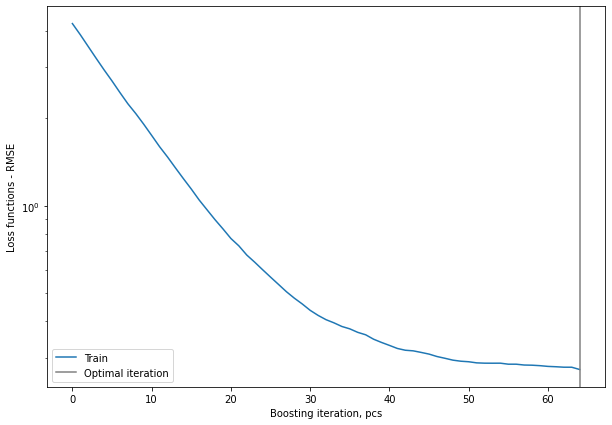

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.06
RMSE: 0.3
Relative RMSE(%):  0.055
MSE: 0.1
R square: 95.7%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.372
a1: 0.926
R^2: 0.958
Uncertainty
a0: 0.37+/-0.10
a1: 0.926+/-0.019


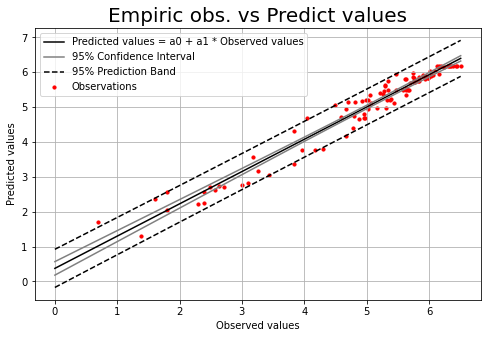

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.001, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

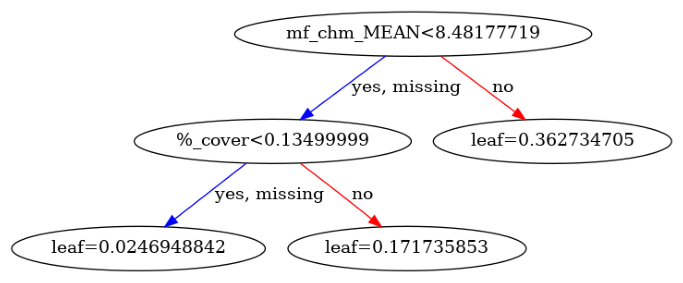

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

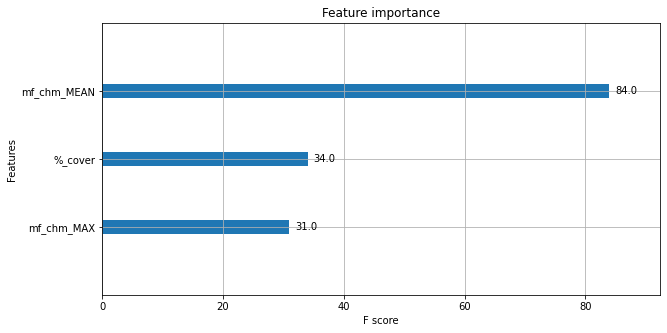

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

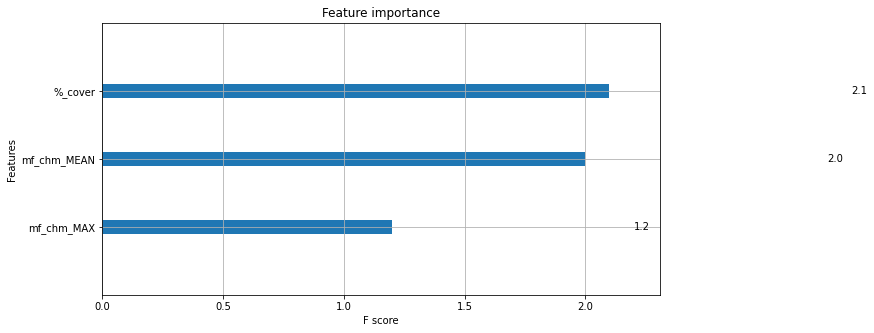

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

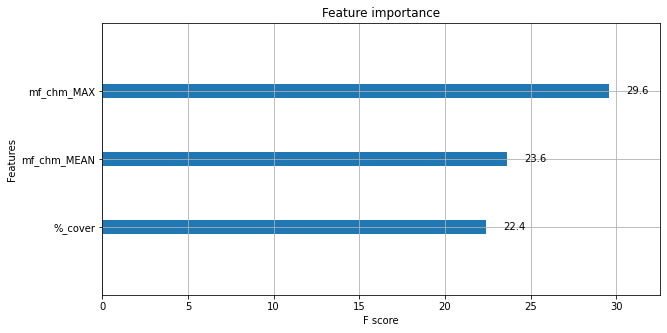

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


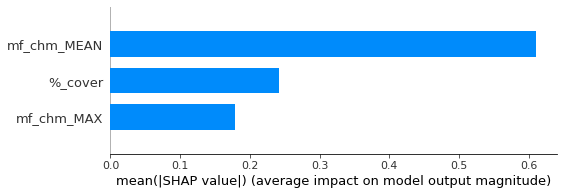

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

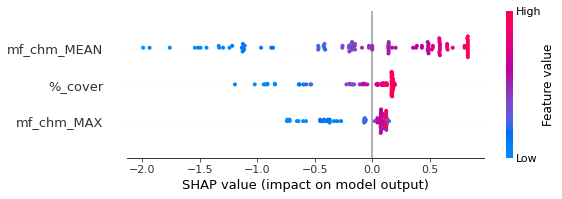

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

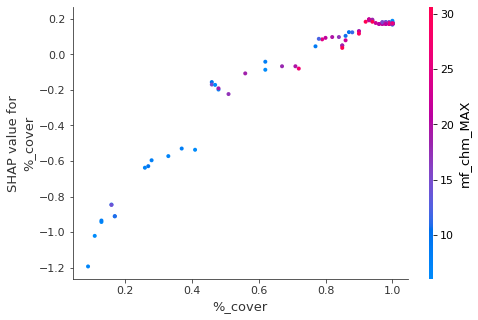

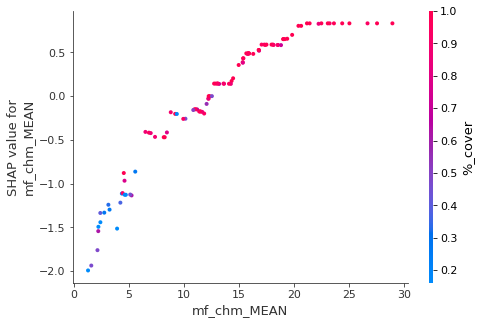

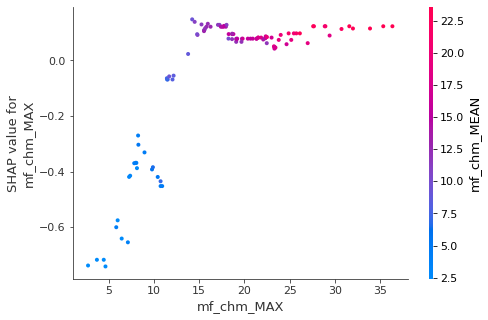

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_GS_XGB_model_without_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_GS_XGB_model_without_texture.txt")